# **Features Dashboard**

Here is where all post-processing of Landscape Analysis results takes place.


# Initialisation & Results Import


In [1]:
%load_ext autoreload
%autoreload 2

from FeaturesDashboard import FeaturesDashboard
import copy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Ensure problem name (dictionary key) matches the name in the selected results folder (dictionary value).
results_dict = {
    "CTP1_d5": ["Feb20_1433"],
    "CTP2_d5": ["Feb20_1433"],
    "CTP3_d5": ["Feb20_1433"],
    "CTP4_d5": ["Feb20_1433"],
    "CTP5_d5": ["Feb20_1433"],
    "CTP6_d5": ["Feb20_1433"],
    "CTP7_d5": ["Feb20_1433"],
    "CTP8_d5": ["Feb20_1433"],
    "MW1_d5": ["Feb15_1352"],
    "MW2_d5": ["Feb15_1352"],
    "MW3_d5": ["Feb15_1352"],
    "MW4_d5": ["Feb15_1352"],
    "MW5_d5": ["Feb15_1352"],
    "MW6_d5": ["Feb15_1352"],
    "MW7_d5": ["Feb15_1352"],
    "MW8_d5": ["Feb15_1352"],
    "MW9_d5": ["Feb15_1352"],
    "MW10_d5": ["Feb15_1352"],
    "MW11_d5": ["Feb15_1352"],
    "MW12_d5": ["Feb15_1352"],
    "MW13_d5": ["Feb15_1352"],
    "MW14_d5": ["Feb15_1352"],
    "DASCMOP1_d5": ["Feb21_1809"],
    "DASCMOP2_d5": ["Feb21_1809"],
    "DASCMOP3_d5": ["Feb21_1809"],
    "DASCMOP4_d5": ["Feb21_1809"],
    "DASCMOP5_d5": ["Feb21_1809"],
    "DASCMOP6_d5": ["Feb21_1809"],
    "DASCMOP7_d5": ["Feb21_1809"],
    "DASCMOP8_d5": ["Feb21_1809"],
    "DASCMOP9_d5": ["Feb21_1809"],
    "LIRCMOP1_d5": ["Mar17_1935"],
    "LIRCMOP2_d5": ["Mar17_1935"],
    "LIRCMOP3_d5": ["Mar17_1935"],
    "LIRCMOP4_d5": ["Mar17_1935"],
    "LIRCMOP5_d5": ["Mar04_1551"],
    "LIRCMOP6_d5": ["Mar04_1551"],
    "LIRCMOP7_d5": ["Mar04_1551"],
    "LIRCMOP8_d5": ["Mar04_1551"],
    "LIRCMOP9_d5": ["Mar04_1551"],
    "LIRCMOP10_d5": ["Mar04_1551"],
    "LIRCMOP11_d5": ["Mar04_1551"],
    "LIRCMOP12_d5": ["Mar04_1551"],
    "LIRCMOP13_d5": ["Mar04_1551"],
    "LIRCMOP14_d5": ["Mar04_1551"],
    "DC1DTLZ1_d5": ["Feb21_1809"],
    "DC1DTLZ3_d5": ["Feb21_1809"],
    "DC2DTLZ1_d5": ["Feb21_1809"],
    "DC2DTLZ3_d5": ["Feb21_1809"],
    "DC3DTLZ1_d5": ["Feb21_1809"],
    "DC3DTLZ3_d5": ["Feb21_1809"],
    "C1DTLZ1_d5": ["Feb21_1809"],
    "C1DTLZ3_d5": ["Feb21_1809"],
    "C2DTLZ2_d5": ["Feb21_1809"],
    "C3DTLZ1_d5": ["Feb21_1809"],
    "C3DTLZ4_d5": ["Feb21_1809"],
    "CTP1_d10": ["Feb21_1809"],
    "CTP2_d10": ["Feb21_1809"],
    "CTP3_d10": ["Feb21_1809"],
    "CTP4_d10": ["Feb21_1809"],
    "CTP5_d10": ["Feb21_1809"],
    "CTP6_d10": ["Feb21_1809"],
    "CTP7_d10": ["Feb21_1809"],
    "CTP8_d10": ["Feb21_1809"],
    "MW1_d10": ["Feb21_1809"],
    "MW2_d10": ["Feb21_1809"],
    "MW3_d10": ["Feb21_1809"],
    "MW4_d10": ["Feb21_1809"],
    "MW5_d10": ["Feb21_1809"],
    "MW6_d10": ["Feb21_1809"],
    "MW7_d10": ["Feb21_1809"],
    "MW8_d10": ["Feb21_1809"],
    "MW9_d10": ["Feb21_1809"],
    "MW10_d10": ["Feb21_1809"],
    "MW11_d10": ["Feb21_1809"],
    "MW12_d10": ["Feb21_1809"],
    "MW13_d10": ["Feb21_1809"],
    "MW14_d10": ["Feb21_1809"],
    "DASCMOP1_d10": ["Feb21_1809"],
    "DASCMOP2_d10": ["Feb21_1809"],
    "DASCMOP3_d10": ["Feb21_1809"],
    "DASCMOP4_d10": ["Feb21_1809"],
    "DASCMOP5_d10": ["Feb21_1809"],
    "DASCMOP6_d10": ["Feb21_1809"],
    "DASCMOP7_d10": ["Feb21_1809"],
    "DASCMOP8_d10": ["Feb21_1809"],
    "DASCMOP9_d10": ["Feb21_1809"],
    "LIRCMOP1_d10": ["Mar04_1551"],
    "LIRCMOP2_d10": ["Mar04_1551"],
    "LIRCMOP3_d10": ["Mar04_1551"],
    "LIRCMOP4_d10": ["Mar04_1551"],
    "LIRCMOP5_d10": ["Mar04_1551"],
    "LIRCMOP6_d10": ["Mar04_1551"],
    "LIRCMOP7_d10": ["Mar04_1551"],
    "LIRCMOP8_d10": ["Mar04_1551"],
    "LIRCMOP9_d10": ["Mar04_1551"],
    "LIRCMOP10_d10": ["Mar04_1551"],
    "LIRCMOP11_d10": ["Mar04_1551"],
    "LIRCMOP12_d10": ["Mar04_1551"],
    "LIRCMOP13_d10": ["Mar05_1149"],
    "LIRCMOP14_d10": ["Mar05_1149"],
    "DC1DTLZ1_d10": ["Feb21_1809"],
    "DC1DTLZ3_d10": ["Feb21_1809"],
    "DC2DTLZ1_d10": ["Feb21_1809"],
    "DC2DTLZ3_d10": ["Feb21_1809"],
    "DC3DTLZ1_d10": ["Feb22_1514"],
    "DC3DTLZ3_d10": ["Feb22_1514"],
    "C1DTLZ1_d10": ["Feb22_1514"],
    "C1DTLZ3_d10": ["Feb22_1514"],
    "C2DTLZ2_d10": ["Feb22_1514"],
    "C3DTLZ1_d10": ["Feb22_1514"],
    "C3DTLZ4_d10": ["Feb22_1514"],
    "CF1_d10": ["Mar14_0935"],
    "CF2_d10": ["Mar14_0935"],
    "CF3_d10": ["Mar14_0935"],
    "CF4_d10": ["Mar14_0935"],
    "CF5_d10": ["Mar14_0935"],
    "CF6_d10": ["Mar14_0935"],
    "CF7_d10": ["Mar14_0935"],
    "CF8_d10": None,
    "CF9_d10": None,
    "CF10_d10": None,
    "CTP1_d20": ["Feb22_1514"],
    "CTP2_d20": ["Feb22_1514"],
    "CTP3_d20": ["Feb22_1514"],
    "CTP4_d20": ["Feb22_1514"],
    "CTP5_d20": ["Feb22_1514"],
    "CTP6_d20": ["Feb22_1514"],
    "CTP7_d20": ["Feb22_1514"],
    "CTP8_d20": ["Feb22_1514"],
    "MW1_d20": ["Feb19_1450"],
    "MW2_d20": ["Feb19_1450"],
    "MW3_d20": ["Feb19_1450"],
    "MW4_d20": ["Feb19_1450"],
    "MW5_d20": ["Feb19_1450"],
    "MW6_d20": ["Feb19_1450"],
    "MW7_d20": ["Feb19_1450"],
    "MW8_d20": ["Feb19_1450"],
    "MW9_d20": ["Feb19_1450"],
    "MW10_d20": ["Feb19_1450"],
    "MW11_d20": ["Feb19_1450"],
    "MW12_d20": ["Feb22_1514"],
    "MW13_d20": ["Feb22_1514"],
    "MW14_d20": ["Feb26_1747"],
    "DASCMOP1_d20": ["Feb22_1514"],
    "DASCMOP2_d20": ["Feb22_1514"],
    "DASCMOP3_d20": ["Feb22_1514"],
    "DASCMOP4_d20": ["Feb22_1514"],
    "DASCMOP5_d20": ["Feb22_1514"],
    "DASCMOP6_d20": ["Feb22_1514"],
    "DASCMOP7_d20": ["Feb26_1747"],
    "DASCMOP8_d20": ["Feb26_1747"],
    "DASCMOP9_d20": ["Feb26_1747"],
    "LIRCMOP1_d20": ["Mar05_1149"],
    "LIRCMOP2_d20": ["Mar05_1149"],
    "LIRCMOP3_d20": ["Mar05_1149"],
    "LIRCMOP4_d20": ["Mar05_1149"],
    "LIRCMOP5_d20": ["Mar05_1149"],
    "LIRCMOP6_d20": ["Mar05_1149"],
    "LIRCMOP7_d20": ["Mar05_1149"],
    "LIRCMOP8_d20": ["Mar05_1149"],
    "LIRCMOP9_d20": ["Mar05_1149"],
    "LIRCMOP10_d20": ["Mar05_1149"],
    "LIRCMOP11_d20": ["Mar05_1149"],
    "LIRCMOP12_d20": ["Mar05_1149"],
    "LIRCMOP13_d20": ["Mar06_1820"],
    "LIRCMOP14_d20": ["Mar06_1820"],
    "DC1DTLZ1_d20": ["Feb22_1514"],
    "DC1DTLZ3_d20": ["Feb22_1514"],
    "DC2DTLZ1_d20": ["Feb22_1514"],
    "DC2DTLZ3_d20": ["Feb22_1514"],
    "DC3DTLZ1_d20": ["Feb22_1514"],
    "DC3DTLZ3_d20": ["Feb22_1514"],
    "C1DTLZ1_d20": ["Feb22_1514"],
    "C1DTLZ3_d20": ["Feb22_1514"],
    "C2DTLZ2_d20": ["Feb22_1514"],
    "C3DTLZ1_d20": ["Feb22_1514"],
    "C3DTLZ4_d20": ["Feb22_1514"],
    "CF1_d20": ["Mar14_0935"],
    "CF2_d20": ["Mar14_0935"],
    "CF3_d20": ["Mar15_1003"],
    "CF4_d20": ["Mar15_1003"],
    "CF5_d20": ["Mar15_1003"],
    "CF6_d20": ["Mar15_1003"],
    "CF7_d20": ["Mar15_1003"],
    "CF8_d20": None,
    "CF9_d20": None,
    "CF10_d20": None,
    "CS1_d20": ["Mar08_1604"],
    "CS2_d20": ["Mar06_1820"],
    "CS3_d20": ["Mar08_1604"],
    "CS4_d20": ["Mar08_1604"],
    "CT1_d20": ["Mar08_1604"],
    "CT2_d20": ["Mar08_1604"],
    "CT3_d20": ["Mar08_1604"],
    "CT4_d20": ["Mar08_1604"],
    "CTSE1_d20": ["Mar08_1604"],
    "CTSE2_d20": ["Mar11_1631"],
    "CTSE3_d20": ["Mar11_1631"],
    "CTSE4_d20": ["Mar11_1631"],
    "CTSEI1_d20": ["Mar11_1631"],
    "CTSEI2_d20": ["Mar11_1631"],
    "CTSEI3_d20": ["Mar11_1631"],
    "CTSEI4_d20": ["Mar12_2241"],
    "CTP1_d30": ["Feb26_1747"],
    "CTP2_d30": ["Feb26_1747"],
    "CTP3_d30": ["Feb26_1747"],
    "CTP4_d30": ["Feb26_1747"],
    "CTP5_d30": ["Feb26_1747"],
    "CTP6_d30": ["Feb26_1747"],
    "CTP7_d30": ["Feb26_1747"],
    "CTP8_d30": ["Feb26_1747"],
    "MW1_d30": ["Feb26_1747"],
    "MW2_d30": ["Feb26_1747"],
    "MW3_d30": ["Feb26_1747"],
    "MW4_d30": ["Feb26_1747"],
    "MW5_d30": ["Feb26_1747"],
    "MW6_d30": ["Feb26_1747"],
    "MW7_d30": ["Feb26_1747"],
    "MW8_d30": ["Feb26_1747"],
    "MW9_d30": ["Feb26_1747"],
    "MW10_d30": ["Feb26_1747"],
    "MW11_d30": ["Feb26_1747"],
    "MW12_d30": ["Feb28_2111"],
    "MW13_d30": ["Feb28_2111"],
    "MW14_d30": ["Feb28_2111"],
    "DASCMOP1_d30": ["Feb28_2111"],
    "DASCMOP2_d30": ["Feb28_2111"],
    "DASCMOP3_d30": ["Feb28_2111"],
    "DASCMOP4_d30": ["Feb28_2111"],
    "DASCMOP5_d30": ["Feb28_2111"],
    "DASCMOP6_d30": ["Feb28_2111"],
    "DASCMOP7_d30": ["Feb28_2111"],
    "DASCMOP8_d30": ["Feb28_2111"],
    "DASCMOP9_d30": ["Feb28_2111"],
    "LIRCMOP1_d30": ["Mar06_1820"],
    "LIRCMOP2_d30": ["Mar06_1820"],
    "LIRCMOP3_d30": ["Mar06_1820"],
    "LIRCMOP4_d30": ["Mar06_1820"],
    "LIRCMOP5_d30": ["Mar06_1820"],
    "LIRCMOP6_d30": ["Mar06_1820"],
    "LIRCMOP7_d30": ["Mar06_1820"],
    "LIRCMOP8_d30": ["Mar06_1820"],
    "LIRCMOP9_d30": ["Mar06_1820"],
    "LIRCMOP10_d30": ["Mar06_1820"],
    "LIRCMOP11_d30": ["Mar06_1820"],
    "LIRCMOP12_d30": ["Mar06_1820"],
    "LIRCMOP13_d30": ["Mar06_1820"],
    "LIRCMOP14_d30": ["Mar06_1820"],
    "DC1DTLZ1_d30": ["Feb28_2111"],
    "DC1DTLZ3_d30": ["Feb28_2111"],
    "DC2DTLZ1_d30": ["Feb28_2111"],
    "DC2DTLZ3_d30": ["Feb28_2111"],
    "DC3DTLZ1_d30": ["Feb28_2111"],
    "DC3DTLZ3_d30": ["Feb28_2111"],
    "C1DTLZ1_d30": ["Feb28_2111"],
    "C1DTLZ3_d30": ["Feb28_2111"],
    "C2DTLZ2_d30": ["Feb28_2111"],
    "C3DTLZ1_d30": ["Feb28_2111"],
    "C3DTLZ4_d30": ["Feb28_2111"],
    "CF1_d30": ["Mar15_1003"],
    "CF2_d30": None,
    "CF3_d30": None,
    "CF4_d30": None,
    "CF5_d30": None,
    "CF6_d30": None,
    "CF7_d30": None,
    "CF8_d30": None,
    "CF9_d30": None,
    "CF10_d30": None,
    "RWMOP1_d4": ["Mar26_1819"],
    "RWMOP2_d5": ["Mar26_1819"],
    "RWMOP3_d3": ["Mar26_1819"],
    "RWMOP4_d4": ["Mar26_1819"],
    "RWMOP5_d4": ["Mar26_1819"],
    "RWMOP6_d7": ["Mar26_1819"],
    "RWMOP7_d4": ["Mar26_1819"],
    "RWMOP8_d7": ["Mar26_1819"],
    "RWMOP9_d4": ["Mar26_1819"],
    "RWMOP10_d2": ["Mar26_1819"],
    "RWMOP11_d3": ["Mar26_1819"],
    "RWMOP12_d4": ["Mar26_1819"],
    "RWMOP13_d7": ["Mar26_1819"],
    "RWMOP14_d5": ["Mar26_1819"],
    "RWMOP15_d3": ["Mar26_1819"],
    "RWMOP16_d2": ["Mar26_1819"],
    "RWMOP17_d6": ["Mar26_1819"],
    "RWMOP18_d3": ["Mar26_1819"],
    "RWMOP19_d10": ["Mar26_1819"],
    "RWMOP20_d4": ["Mar26_1819"],
    "RWMOP21_d6": ["Mar26_1819"],
    "RWMOP22_d9": ["Mar26_1819"],
    "RWMOP23_d6": ["Mar26_1819"],
    "RWMOP24_d9": ["Apr11_1328"],
    "RWMOP25_d2": ["Apr11_1328"],
    "RWMOP26_d3": ["Apr11_1328"],
    "RWMOP27_d3": ["Apr11_1328"],
    "RWMOP28_d7": ["Apr11_1328"],
    "RWMOP29_d7": ["Apr11_1328"],
    "RWMOP30_d25": ["Apr11_1328"],
    "RWMOP31_d25": ["Apr11_1328"],
    "RWMOP32_d25": ["Apr11_1328"],
    "RWMOP33_d30": ["Apr17_1238"],
    "RWMOP34_d30": ["Apr13_2223"],
    "RWMOP35_d30": ["Apr14_2138"],
    "RWMOP36_d28": ["Apr14_2138"],
    "RWMOP37_d28": ["Apr14_2138"],
    "RWMOP38_d28": ["Apr14_2138"],
    "RWMOP39_d28": ["Apr17_1238"],
    "RWMOP40_d34": ["Apr19_1056"],
    "RWMOP41_d34": ["Apr30_1626"],
    "RWMOP42_d34": ["Apr30_1626"],
    "RWMOP43_d34": ["Apr30_1626"],
    "RWMOP44_d34": ["Apr30_1626"],
    "RWMOP45_d34": ["Apr30_1626"],
    "RWMOP46_d34": ["Apr30_1626"],
    "RWMOP47_d18": ["Apr19_1056"],
    "RWMOP48_d18": ["Apr19_1056"],
    "RWMOP49_d18": ["Apr19_1056"],
    "RWMOP50_d6": ["Apr19_1056"],
    "XA2_d15": ["Apr02_1903"],
    "XA3_d10": ["Apr02_1903"],
    "XA4_d10": ["Apr02_1903"],
    "XA5_d10": ["Apr02_1903"],
    "XA6_d10": ["Apr02_1903"],
    "XA7_d10": ["Apr02_1903"],
    "XA8_d10": ["Apr02_1903"],
    "XA2_d25": ["Apr10_0939"],
    "XA3_d20": ["Apr02_1919"],
    "XA4_d20": ["Apr02_1919"],
    "XA5_d20": ["Apr02_1919"],
    "XA6_d20": ["Apr10_0939"],
    "XA7_d20": ["Apr02_1919"],
    "XA8_d20": ["Apr02_1919"],
    "XA2_d35": ["Apr10_0939"],
    "XA3_d30": ["Apr05_1222"],
    "XA4_d30": ["Apr05_1222"],
    "XA5_d30": ["Apr05_1222"],
    "XA6_d30": ["Apr05_1222"],
    "XA7_d30": ["Apr05_1222"],
    "XA8_d30": ["Apr05_1222"],
}

In [3]:
# Set to true for report-compatible rendering.
report_mode = False

# Instantiate FeaturesDashboard.
dashboard = FeaturesDashboard(results_dict, "../features_results", report_mode)

# Collate all results into a single CSV.
dashboard.save_features_collated_csv()

# Map feature names with underscores to mathematical symbols. Plots will only render the mathematical symbols when report_mode is True.
dashboard.create_mapping_from_file(file_path="feature_names.txt")

Copied instance_results\Feb20_1433\CTP1_d5\CTP1_d5_aw_features.csv to ../features_results\CTP1_d5_Feb20_1433\CTP1_d5_aw_features_Feb20_1433.csv
Copied instance_results\Feb20_1433\CTP1_d5\CTP1_d5_aw_norm.csv to ../features_results\CTP1_d5_Feb20_1433\CTP1_d5_aw_norm_Feb20_1433.csv
Copied instance_results\Feb20_1433\CTP1_d5\CTP1_d5_glob_features.csv to ../features_results\CTP1_d5_Feb20_1433\CTP1_d5_glob_features_Feb20_1433.csv
Copied instance_results\Feb20_1433\CTP1_d5\CTP1_d5_glob_norm.csv to ../features_results\CTP1_d5_Feb20_1433\CTP1_d5_glob_norm_Feb20_1433.csv
Copied instance_results\Feb20_1433\CTP1_d5\CTP1_d5_rw_features.csv to ../features_results\CTP1_d5_Feb20_1433\CTP1_d5_rw_features_Feb20_1433.csv
Copied instance_results\Feb20_1433\CTP1_d5\CTP1_d5_rw_norm.csv to ../features_results\CTP1_d5_Feb20_1433\CTP1_d5_rw_norm_Feb20_1433.csv
Copied instance_results\Feb20_1433\CTP2_d5\CTP2_d5_aw_features.csv to ../features_results\CTP2_d5_Feb20_1433\CTP2_d5_aw_features_Feb20_1433.csv
Copied i

Check results importing worked. This will tell us if any of the problem instances (keys in results_dict) have missing data.


In [4]:
dashboard.compare_results_dict_to_df()

Missing data for CF8_d10
Missing data for CF9_d10
Missing data for CF10_d10
Missing data for CF8_d20
Missing data for CF9_d20
Missing data for CF10_d20
Missing data for CF2_d30
Missing data for CF3_d30
Missing data for CF4_d30
Missing data for CF5_d30
Missing data for CF6_d30
Missing data for CF7_d30
Missing data for CF8_d30
Missing data for CF9_d30
Missing data for CF10_d30


In [5]:
# Full dataframe.
dashboard.get_landscape_features_df(give_sd=True)

Name        Date  Suite   D  scr_glob_mean  scr_glob_std  \
0        XA2_d15  Apr02_1903     XA  15       0.932444      0.002351   
1        XA3_d10  Apr02_1903     XA  10       0.629780      0.003302   
2        XA4_d10  Apr02_1903     XA  10       0.860310      0.002104   
3        XA5_d10  Apr02_1903     XA  10       0.611270      0.003535   
4        XA6_d10  Apr02_1903     XA  10       0.868600      0.031903   
..           ...         ...    ...  ..            ...           ...   
321  RWMOP19_d10  Mar26_1819  RWMOP  10       0.000000      0.000000   
322   RWMOP20_d4  Mar26_1819  RWMOP   4       0.000000      0.000000   
323   RWMOP21_d6  Mar26_1819  RWMOP   6       0.000000      0.000000   
324   RWMOP22_d9  Mar26_1819  RWMOP   9       0.000000      0.000000   
325   RWMOP23_d6  Mar26_1819  RWMOP   6       0.000000      0.000000   

     fsr_glob_mean  fsr_glob_std  corr_obj_min_glob_mean  \
0         0.000000      0.000000               -0.273548   
1         0.004512      0.000679                0.439468   
2         0.000217      0.000331                0.211159   
3         0.000180      0.000258               -0.246305   
4         0.001474      0.000876               -0.348616   
..             ...           ...                     ...   
321       0.005900      0.000537               -0.002035   
322       0.000975      0.000596                0.000000   
323       1.000000      0.000000               -0.954831   
324       0.000000      0.000000                0.000000   
325       0.000000      0.000000               -0.003558   

     corr_obj_min_glob_std  ...  hv_ss_avg_aw_mean  hv_ss_avg_aw_std  \
0                 0.020805  ...                NaN               NaN   
1                 0.010096  ...                NaN               NaN   
2                 0.018714  ...                NaN               NaN   
3                 0.011477  ...                NaN               NaN   
4                 0.027840  ...                NaN               NaN   
..                     ...  ...                ...               ...   
321               0.006106  ...           0.543461      4.533265e-02   
322               0.000000  ...           0.037941      1.655317e-12   
323               0.001151  ...           0.334646      3.334655e-03   
324               0.000000  ...                NaN               NaN   
325               0.010675  ...                NaN               NaN   

     nhv_avg_aw_mean  nhv_avg_aw_std  hvd_avg_aw_mean  hvd_avg_aw_std  \
0                NaN             NaN              NaN             NaN   
1                NaN             NaN              NaN             NaN   
2                NaN             NaN              NaN             NaN   
3                NaN             NaN              NaN             NaN   
4                NaN             NaN              NaN             NaN   
..               ...             ...              ...             ...   
321         0.551626    4.385479e-02     8.164955e-03    2.761168e-03   
322         0.037941    1.394971e-12     4.734713e-13    4.038566e-13   
323         0.340113    3.267620e-03     5.467359e-03    1.124786e-04   
324              NaN             NaN              NaN             NaN   
325              NaN             NaN              NaN             NaN   

     bhv_avg_aw_mean  bhv_avg_aw_std  length_avg_aw_mean  length_avg_aw_std  
0                NaN             NaN                 NaN                NaN  
1                NaN             NaN                 NaN                NaN  
2                NaN             NaN                 NaN                NaN  
3                NaN             NaN                 NaN                NaN  
4                NaN             NaN                 NaN                NaN  
..               ...             ...                 ...                ...  
321         0.551601    4.385851e-02          150.440000          15.202858  
322         0.037941    1.395069e-12           49.792500    

# Initial Exploratory Data Analysis (section 4.1 of report)

Includes handling of NaNs, outliers. Some features were chosen for exclusion based on this analysis.


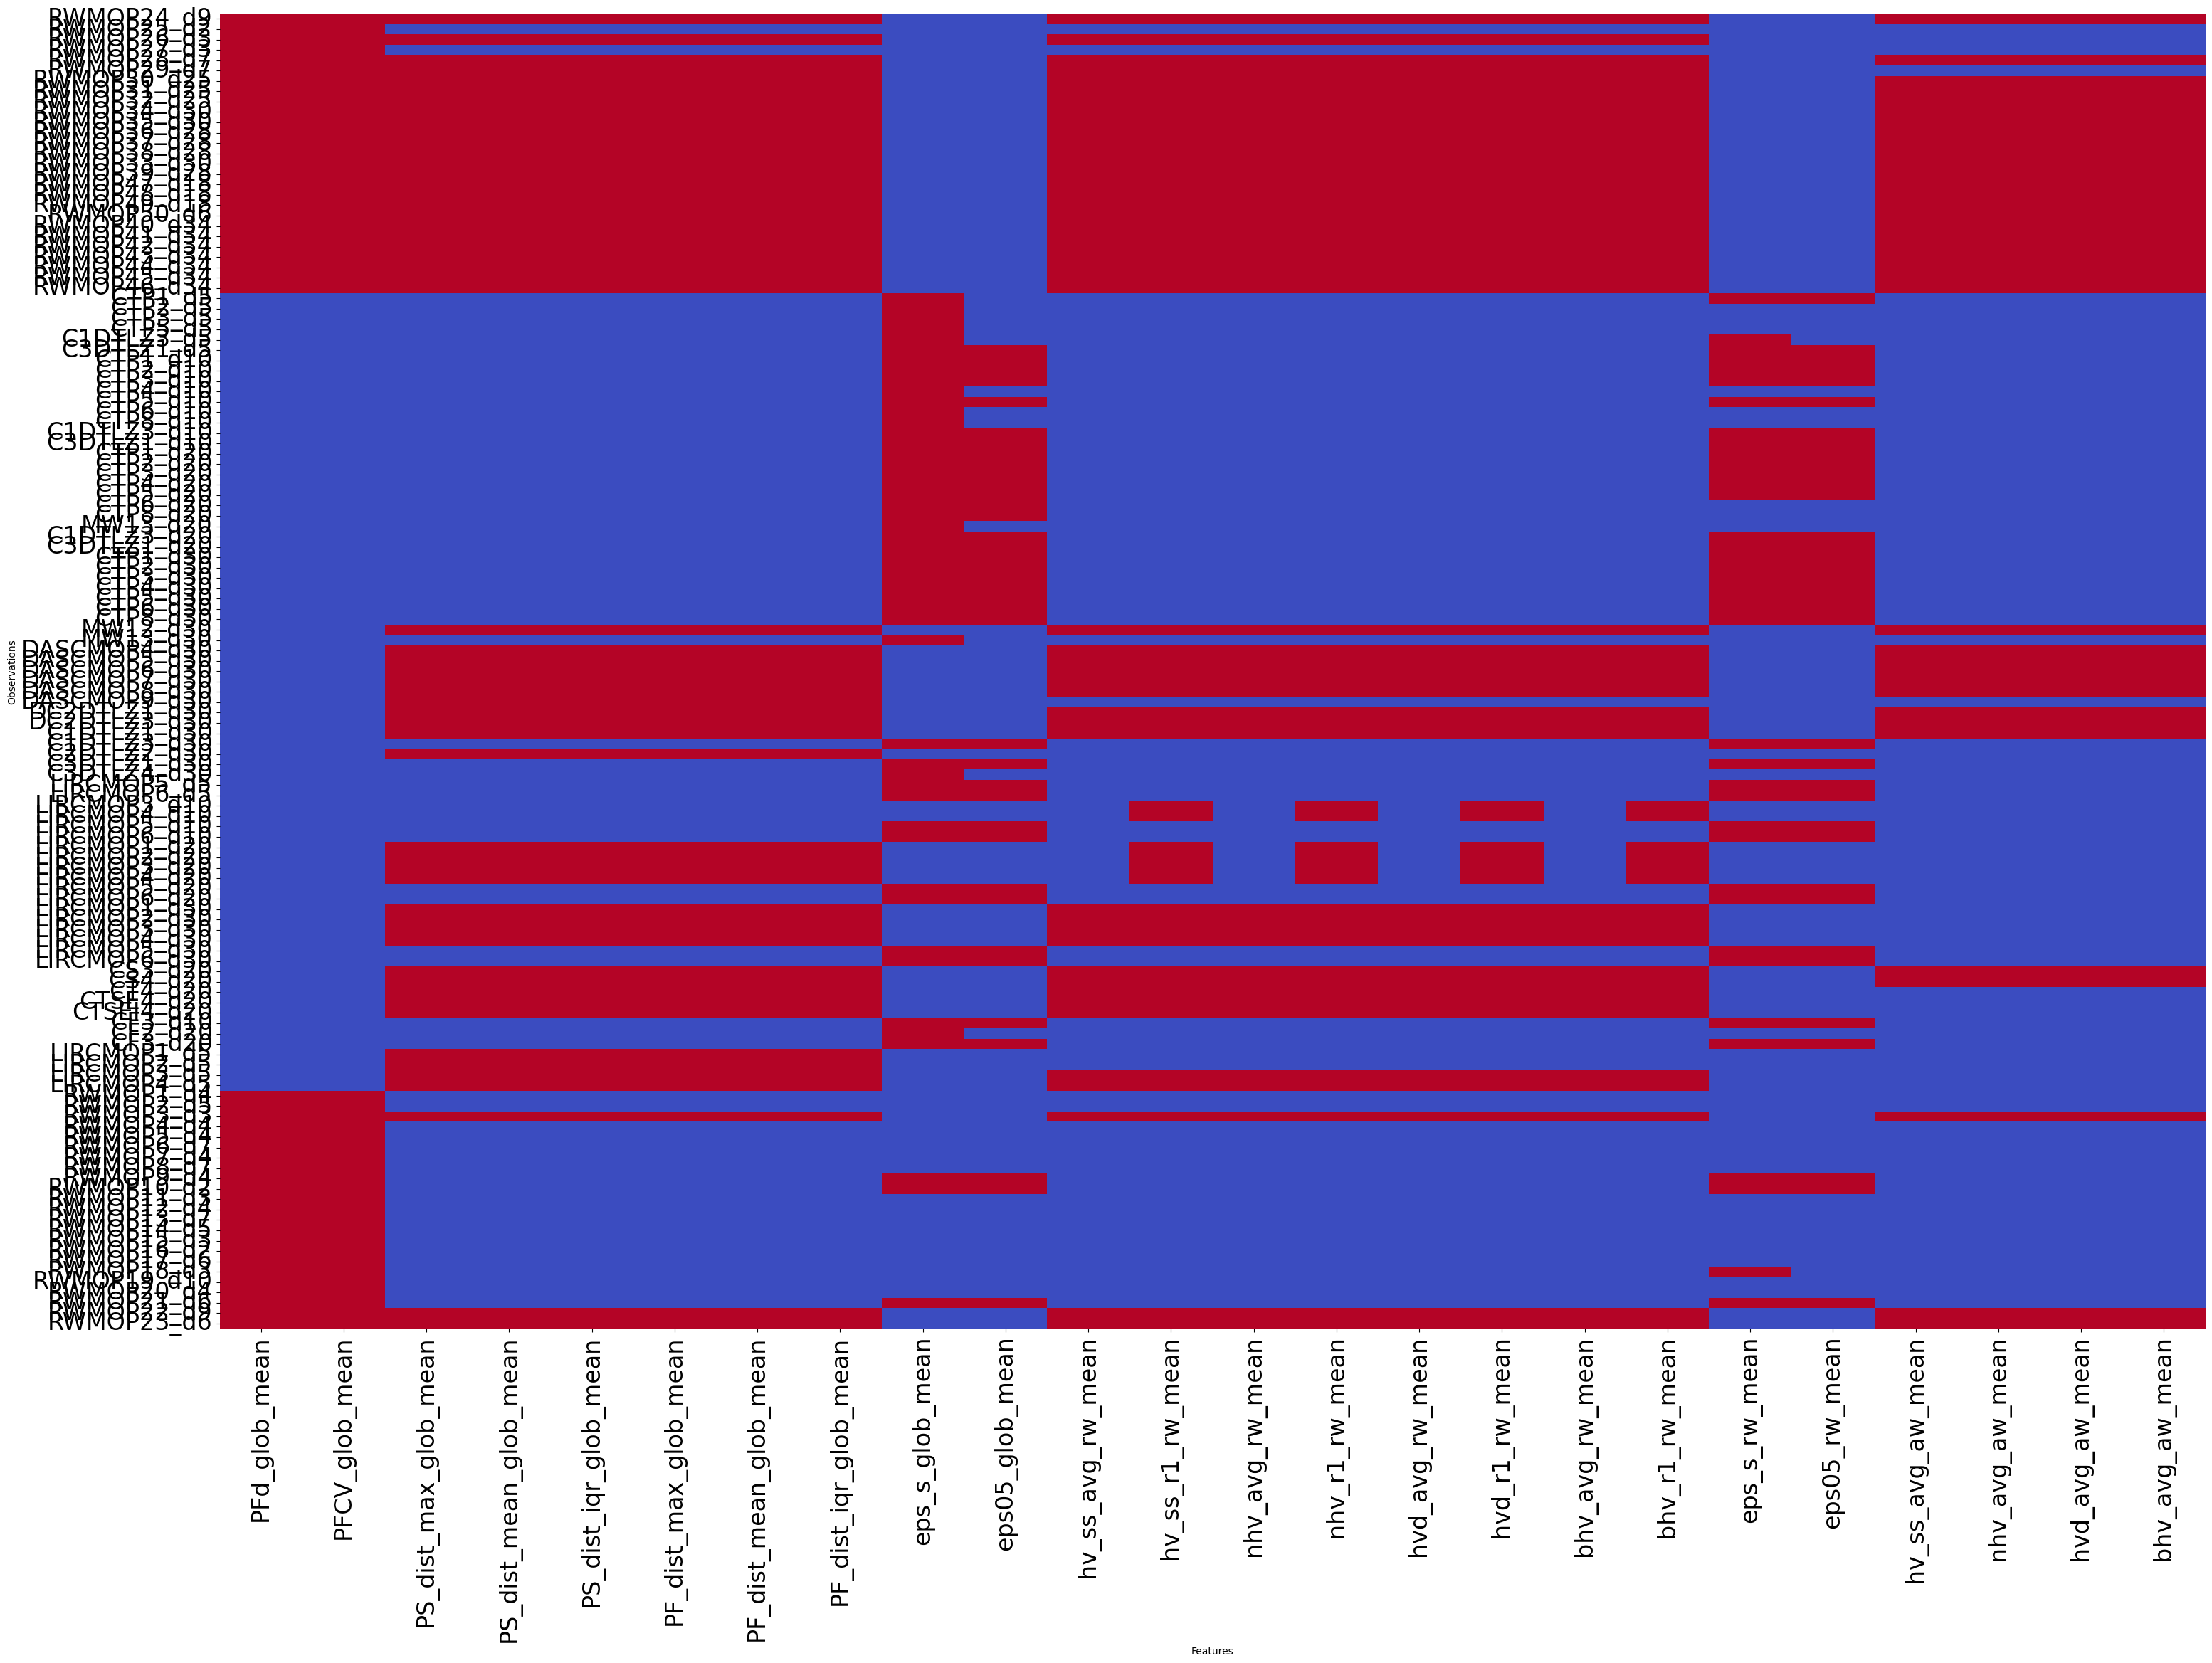

In [6]:
dashboard.plot_missingness(show_only_nans=True, ignore_aerofoils=True)

### Removing large outliers from dataset


In [9]:
# Details available in Section 4.1.2 of thesis report.
dashboard.replace_outliers_with_nan()

Feature: kurt_cv_glob_mean, Problem: CF2_d20, Outlier Value: 7523.447288298041
Feature: dist_c_avg_rw_mean, Problem: CTP2_d5, Outlier Value: 13024653774495.973
Feature: dist_f_c_avg_rw_mean, Problem: CTP2_d5, Outlier Value: 13024653774495.98
Feature: dist_c_dist_x_avg_rw_mean, Problem: CTP2_d5, Outlier Value: 998838391486220.0
Feature: dist_f_c_dist_x_avg_rw_mean, Problem: CTP2_d5, Outlier Value: 998838391486220.4
Feature: nncv_avg_rw_mean, Problem: CTP2_d5, Outlier Value: 13024615984331.564
Feature: ncv_avg_rw_mean, Problem: CTP2_d5, Outlier Value: 37791997.45581357
Feature: skew_cv_glob_mean, Problem: MW13_d10, Outlier Value: 79.46501301779183
Feature: skew_cv_glob_mean, Problem: MW13_d20, Outlier Value: 97.88492332190351
Feature: skew_cv_glob_mean, Problem: MW13_d30, Outlier Value: 102.188766761291
Feature: kurt_cv_glob_mean, Problem: MW13_d5, Outlier Value: 2428.888832782224
Feature: kurt_cv_glob_mean, Problem: MW13_d10, Outlier Value: 6889.563465596746
Feature: kurt_cv_glob_mean, 

### Missing value handling.

Some of these missing feature values can be replaced by appropriate values (see report section 4.1.1).


In [11]:
# Details available in Section 4.1.1 of thesis report.
feasible_hv_features = [
    "hv_ss_avg_rw_mean",
    "hv_ss_r1_rw_mean",
    "nhv_avg_rw_mean",
    "nhv_r1_rw_mean",
    "hvd_avg_rw_mean",
    "hvd_r1_rw_mean",
    "bhv_avg_rw_mean",
    "bhv_r1_rw_mean",
    "hv_ss_avg_aw_mean",
    "nhv_avg_aw_mean",
    "hvd_avg_aw_mean",
    "bhv_avg_aw_mean",
]

for f in feasible_hv_features:
    dashboard.replace_nan_with_value(column=f, value=0)

There are no NaN values in column 'hv_ss_avg_rw_mean'.
There are no NaN values in column 'hv_ss_r1_rw_mean'.
There are no NaN values in column 'nhv_avg_rw_mean'.
There are no NaN values in column 'nhv_r1_rw_mean'.
There are no NaN values in column 'hvd_avg_rw_mean'.
There are no NaN values in column 'hvd_r1_rw_mean'.
There are no NaN values in column 'bhv_avg_rw_mean'.
There are no NaN values in column 'bhv_r1_rw_mean'.
There are no NaN values in column 'hv_ss_avg_aw_mean'.
There are no NaN values in column 'nhv_avg_aw_mean'.
There are no NaN values in column 'hvd_avg_aw_mean'.
There are no NaN values in column 'bhv_avg_aw_mean'.


In [13]:
# Details available in Section 4.1.1 of thesis report.
ic_epsilon_features = [
    "eps_s_glob_mean",
    "eps05_glob_mean",
    "eps_s_rw_mean",
    "eps05_rw_mean",
]


for f in ic_epsilon_features:
    dashboard.replace_nan_with_value(column=f, value=-5)

There are no NaN values in column 'eps_s_glob_mean'.
There are no NaN values in column 'eps05_glob_mean'.
There are no NaN values in column 'eps_s_rw_mean'.
There are no NaN values in column 'eps05_rw_mean'.


As they have many missing values, we will ignore all PS-PF features for this analysis (see section 4.1.1 of report for details)


In [14]:
# Details available in Section 4.1.1 of thesis report.
features_to_ignore = [
    f
    for f in dashboard.features_df.columns
    if f.startswith(("PS", "PF")) and f not in ["Name", "Date", "D", "Suite"]
]

dashboard.append_to_features_to_ignore(features_to_ignore)

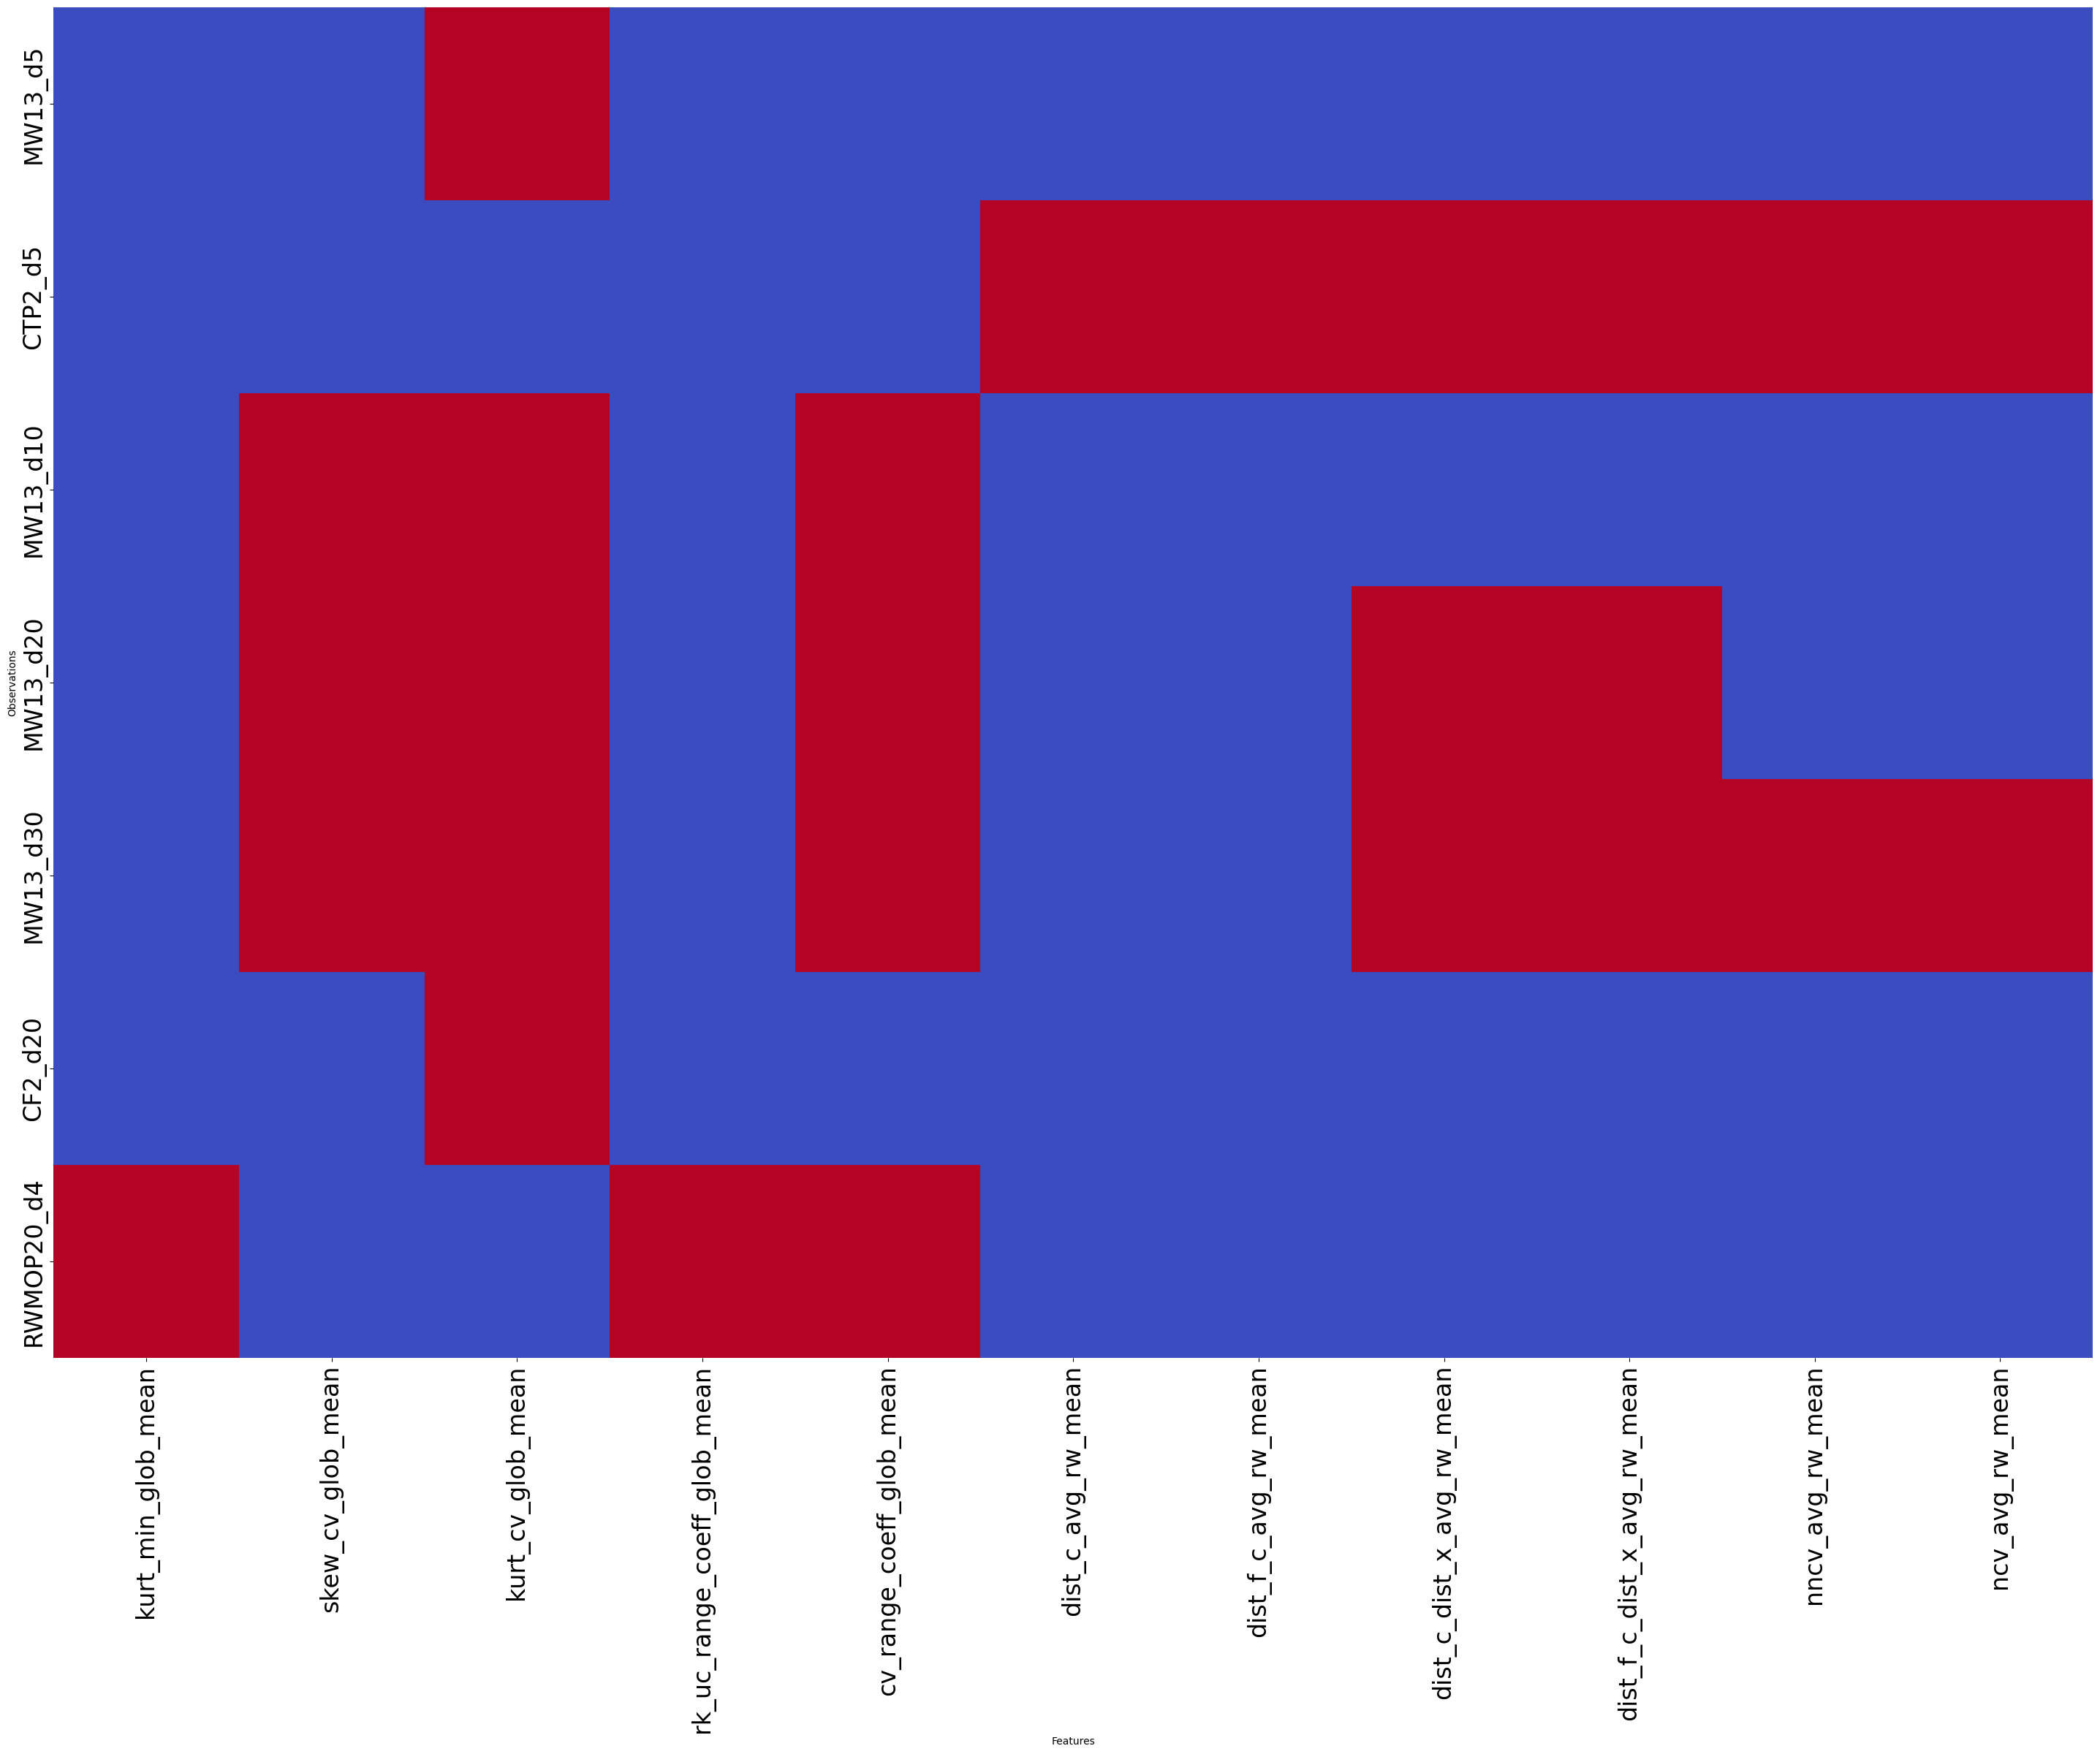

In [15]:
# The problems shown on the y-axis will be ignored for the remainder of the analysis.
dashboard.plot_missingness(show_only_nans=True, show_ignored_features=False)

# Demonstration of some basic methods

While I did not include any of these plots in the final report, some of these functions are useful for data exploration.

Includes violin plots, pairplots and individual simulation results plots.


## Dataframe filtering


In [12]:
# Get features for specific analysis type.
global_overall_features = dashboard.get_features_for_analysis_type(
    dashboard.features_df, "glob"
)
global_overall_features

Name   D  Suite  scr_glob_mean  fsr_glob_mean  \
0        XA2_d15  15     XA       0.932444       0.000000   
1        XA3_d10  10     XA       0.629780       0.004512   
2        XA4_d10  10     XA       0.860310       0.000217   
3        XA5_d10  10     XA       0.611270       0.000180   
4        XA6_d10  10     XA       0.868600       0.001474   
..           ...  ..    ...            ...            ...   
321  RWMOP19_d10  10  RWMOP       0.000000       0.005900   
322   RWMOP20_d4   4  RWMOP       0.000000       0.000975   
323   RWMOP21_d6   6  RWMOP       0.000000       1.000000   
324   RWMOP22_d9   9  RWMOP       0.000000       0.000000   
325   RWMOP23_d6   6  RWMOP       0.000000       0.000000   

     corr_obj_min_glob_mean  corr_obj_max_glob_mean  corr_obj_range_glob_mean  \
0                 -0.273548               -0.273548                  0.000000   
1                  0.439468                0.439468                  0.000000   
2                  0.211159                0.211159                  0.000000   
3                 -0.246305               -0.130537                 -0.115768   
4                 -0.348616                0.008714                 -0.357330   
..                      ...                     ...                       ...   
321               -0.002035                0.903347                 -0.905383   
322                0.000000                0.000000                  0.000000   
323               -0.954831               -0.954831                  0.000000   
324                0.000000                0.000000                  0.000000   
325               -0.003558               -0.003558                  0.000000   

     skew_avg_glob_mean  skew_min_glob_mean  ...  \
0              0.010989           -0.960975  ...   
1              3.218448            0.085564  ...   
2              1.454597           -0.001728  ...   
3              0.916550            0.342698  ...   
4              0.521872           -0.017597  ...   
..                  ...                 ...  ...   
321            1.882262            0.321895  ...   
322            7.343830           -8.891586  ...   
323           -0.000202           -0.017420  ...   
324           -0.000982           -0.009915  ...   
325           -0.207809           -0.415613  ...   

     corr_obj_uc_rk_max_glob_mean  corr_cv_ranks_glob_mean  \
0                        0.636560                 0.976936   
1                        0.835098                 0.997904   
2                        0.763481                 0.995317   
3                        0.547411                 0.957514   
4                        0.571431                 0.983422   
..                            ...                      ...   
321                      0.792355                 0.986328   
322                      0.786716                 0.948576   
323                      0.159079                 0.000000   
324                      0.675102                 0.998030   
325                      0.681965                 0.999317   

     rk_uc_mdl_r2_glob_mean  rk_uc_range_coeff_glob_mean  cv_mdl_r2_glob_mean  \
0                  0.251174                    23.220467             0.382750   
1                  0.714736                  -349.276677             0.456776   
2                  0.713957                  -300.478878             0.517573   
3                  0.393164                   -41.705993             0.484072   
4                  0.410557                   -60.666179             0.458239   
..                      ...                          ...                  ...   
321                0.771222                     3.958374             0.080383   
322                0.617167                          NaN             0.002012   
323                0.768312                   -14.483188             1.000000   
324                0.902162                     0.285141             0.893203   
325                0.886430                  

In [13]:
# Get features for specific benchmark suite and/or dimensionality.
mw_features = dashboard.filter_df_by_suite_and_dim(
    dashboard.features_df, suite_names=["MW"], dims=[20], ignore_aerofoils=False
)
mw_features

Name        Date Suite   D  scr_glob_mean  fsr_glob_mean  \
62    MW1_d20  Feb19_1450    MW  20            0.0       0.000000   
63    MW2_d20  Feb19_1450    MW  20            0.0       0.000000   
64    MW3_d20  Feb19_1450    MW  20            0.0       0.000000   
65    MW4_d20  Feb19_1450    MW  20            0.0       0.000000   
66    MW5_d20  Feb19_1450    MW  20            0.0       0.000000   
67    MW6_d20  Feb19_1450    MW  20            0.0       0.000000   
68    MW7_d20  Feb19_1450    MW  20            0.0       0.000000   
69    MW8_d20  Feb19_1450    MW  20            0.0       0.000000   
70    MW9_d20  Feb19_1450    MW  20            0.0       0.000000   
71   MW10_d20  Feb19_1450    MW  20            0.0       0.000000   
72   MW11_d20  Feb19_1450    MW  20            0.0       0.000000   
151  MW12_d20  Feb22_1514    MW  20            0.0       0.000000   
152  MW13_d20  Feb22_1514    MW  20            0.0       0.000213   
170  MW14_d20  Feb26_1747    MW  20            0.0       0.000112   

     corr_obj_min_glob_mean  corr_obj_max_glob_mean  corr_obj_range_glob_mean  \
62                -0.359180               -0.359180                  0.000000   
63                -0.060510               -0.060510                  0.000000   
64                -0.129963               -0.129963                  0.000000   
65                -0.664553                0.006978                 -0.671531   
66                -0.951011               -0.951011                  0.000000   
67                -0.410883               -0.410883                  0.000000   
68                -0.516714               -0.516714                  0.000000   
69                -0.403672                0.127266                 -0.530937   
70                -0.993795               -0.993795                  0.000000   
71                -0.106031               -0.106031                  0.000000   
72                -0.444147               -0.444147                  0.000000   
151               -0.987294               -0.987294                  0.000000   
152               -0.516770               -0.516770                  0.000000   
170               -0.295998                0.000852                 -0.296850   

     skew_avg_glob_mean  ...  inc_avg_aw_mean  lnd_avg_aw_mean  \
62            -0.436507  ...         0.024390          0.02439   
63             0.084637  ...         0.024390          0.02439   
64             0.016885  ...         0.024393          0.02439   
65             0.659125  ...         0.024390          0.02439   
66            -0.542959  ...         0.024390          0.02439   
67             0.237562  ...         0.025173          0.02439   
68             0.000001  ...         0.035191          0.02439   
69             0.523879  ...         0.025734          0.02439   
70             0.223614  ...         0.024390          0.02439   
71             2.111958  ...         0.024421          0.02439   
72             0.275656  ...         0.027019          0.02439   
151            0.043729  ...         0.024390          0.02439   
152            0.464414  ...         0.028961          0.02439   
170            0.217085  ...         0.028264          0.02439   

     uhv_ss_avg_aw_mean  nuhv_avg_aw_mean  uhvd_avg_aw_mean  \
62             0.100526          0.107254          0.006729   
63             0.485315          0.500858          0.015543   
64             0.479597          0.489099          0.009502   
65             0.392560          0.410669          0.018109   
66             0.191298          0.201468          0.010170   
67             0.840332          0.856627          0.016294   
68             0.864643          0.871636          0.006993   
69             0.987923          1.003277          0.015354   
70             0.453396          0.469044          0.015648   
71             0.972566          0.982729          0.010163   
72             0.954984          0.961343          0.006359   
151       

In [14]:
# Look features for specific problem.
problem_features = dashboard.get_problem_features_samples_df("RWMOP20", "4", "glob")
problem_features

scr      fsr  corr_obj_min  corr_obj_max  corr_obj_range   skew_avg  \
0  0.0  0.00100           0.0           0.0             0.0  63.156986   
1  0.0  0.00125           0.0           0.0             0.0  43.732894   
2  0.0  0.00125           0.0           0.0             0.0 -62.120469   
3  0.0  0.00225           0.0           0.0             0.0 -34.412856   
4  0.0  0.00025           0.0           0.0             0.0  53.505236   
5  0.0  0.00025           0.0           0.0             0.0 -62.395111   
6  0.0  0.00150           0.0           0.0             0.0 -21.785179   
7  0.0  0.00100           0.0           0.0             0.0  15.587383   
8  0.0  0.00050           0.0           0.0             0.0  37.211568   
9  0.0  0.00050           0.0           0.0             0.0  40.957847   

    skew_min   skew_max  skew_rnge     kurt_avg  ...  corr_obj_uc_rk_max  \
0  63.095277  63.218695   0.123418  3989.586212  ...            0.783433   
1  42.024909  45.440879   3.415970  2799.112188  ...            0.750540   
2 -63.119668 -61.121269   1.998399  3897.432420  ...            0.828504   
3 -63.221828  -5.603884  57.617944  3002.282609  ...            0.805990   
4  44.053617  62.956854  18.903237  3117.225877  ...            0.780924   
5 -63.191428 -61.598793   1.592635  3929.391983  ...            0.782729   
6 -56.674841  13.104482  69.779323  2545.224135  ...            0.779750   
7 -22.727349  53.902116  76.629465  1908.956362  ...            0.798472   
8  11.215372  63.207764  51.992392  3016.259053  ...            0.778249   
9  19.630081  62.285614  42.655533  2547.918831  ...            0.778567   

   corr_cv_ranks  rk_uc_mdl_r2  rk_uc_range_coeff  cv_mdl_r2  cv_range_coeff  \
0       0.947374      0.618493      -5.994362e+06   0.002253   -4.150021e+17   
1       0.953530      0.585207      -6.049032e+06   0.002690   -3.786966e+17   
2       0.944750      0.663547      -6.913435e+06   0.000824   -4.540060e+19   
3       0.950622      0.624332      -6.536641e+06   0.001368   -3.023901e+20   
4       0.952574      0.605965      -6.129048e+06   0.002906   -7.409245e+16   
5       0.944954      0.599289      -6.571265e+06   0.000612   -4.692075e+16   
6       0.954547      0.627787      -6.227085e+06   0.002327   -6.069480e+17   
7       0.943212      0.645708      -6.851337e+06   0.005571   -1.626014e+16   
8       0.953625      0.600244      -6.495432e+06  -0.000239   -1.874497e+17   
9       0.940571      0.601097      -6.237141e+06   0.001805   -5.007296e+16   

      H_max      eps_s        m0     eps05  
0  0.689902  10.235235  0.656078  4.449449  
1  0.677441  10.195195  0.661581  4.429429  
2  0.684822   9.834835  0.662081  4.449449  
3  0.688376  10.435435  0.665583  4.469469  
4  0.674922  10.875876  0.663582  4.409409  
5  0.681484  10.755756  0.649575  4.429429  
6  0.676792  10.755756  0.663832  4.429429  
7  0.675009  10.135135  0.653827  4.409409  
8  0.687214  10.275275  0.673587  4.409409  
9  0.677551  10.195195  0.662581  4.449449  

[10 rows x 58 columns]

## Violin plots

Violin plots with suites in the horizontal axis, markers for dimension.


Aerofoils are being ignored for analysis type: all.


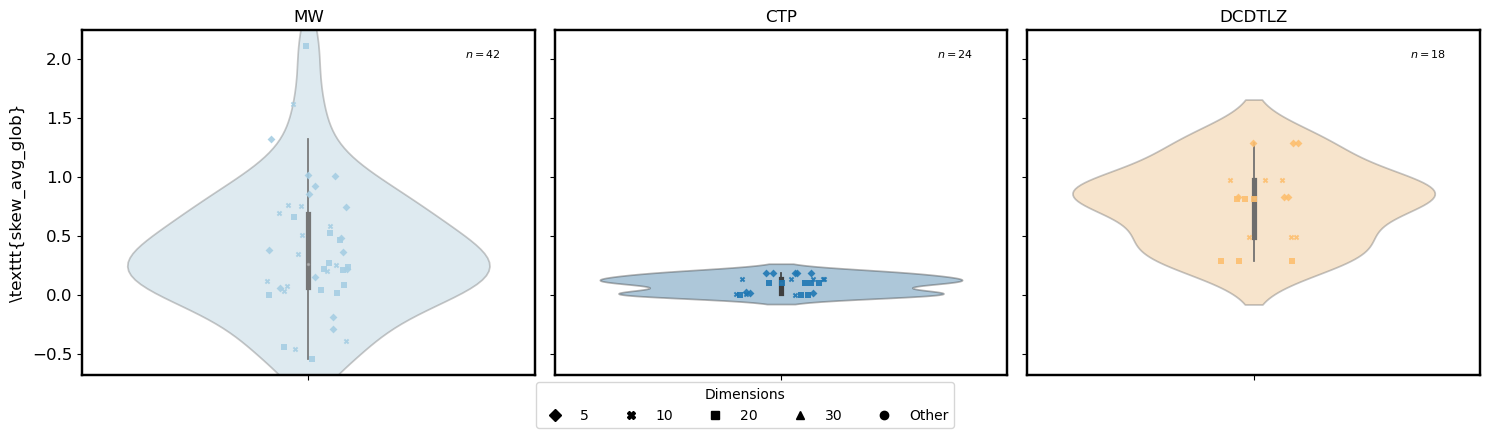

In [15]:
# Specify the feature name and the suites you're interested in
feature_name = "skew_avg_glob"  # Replace with your actual feature name (can have "_mean" included or not)
suite_names = ["MW", "CTP", "DCDTLZ"]  # Example suite names
dims = [5, 10, 20]

# Create the plots for these specific cases.
dashboard.plot_feature_across_suites(feature_name, suite_names=suite_names, dims=dims)

Aerofoils have been specified for consideration, but the dataset for all samples is being considered. Restrict to global features only.


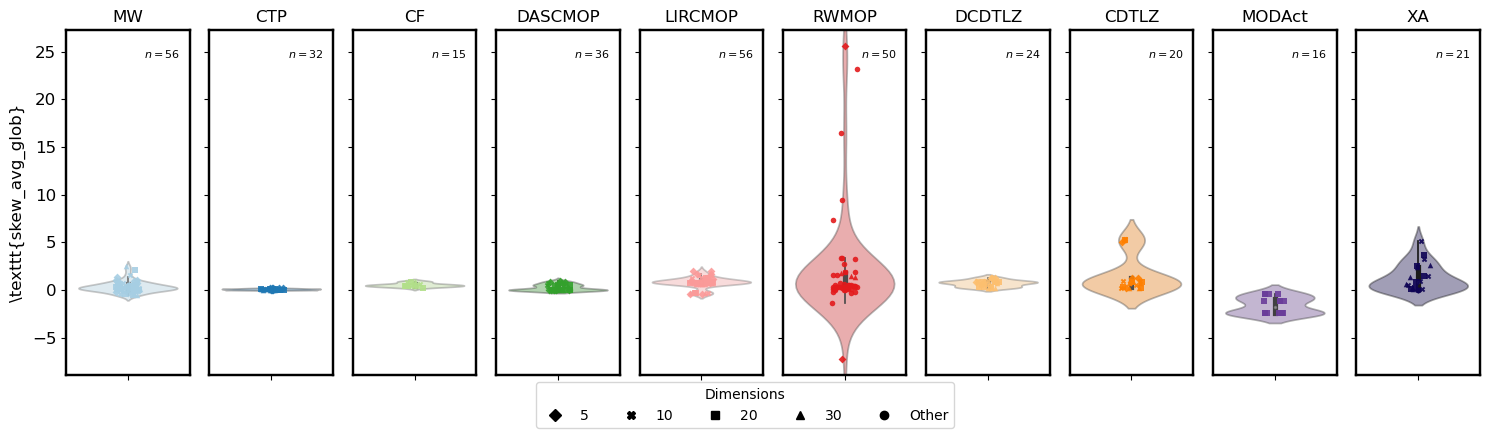

In [16]:
# Same as above but for all suites/dimensions
dashboard.plot_feature_across_suites(
    feature_name, suite_names=None, dims=None, ignore_aerofoils=False
)

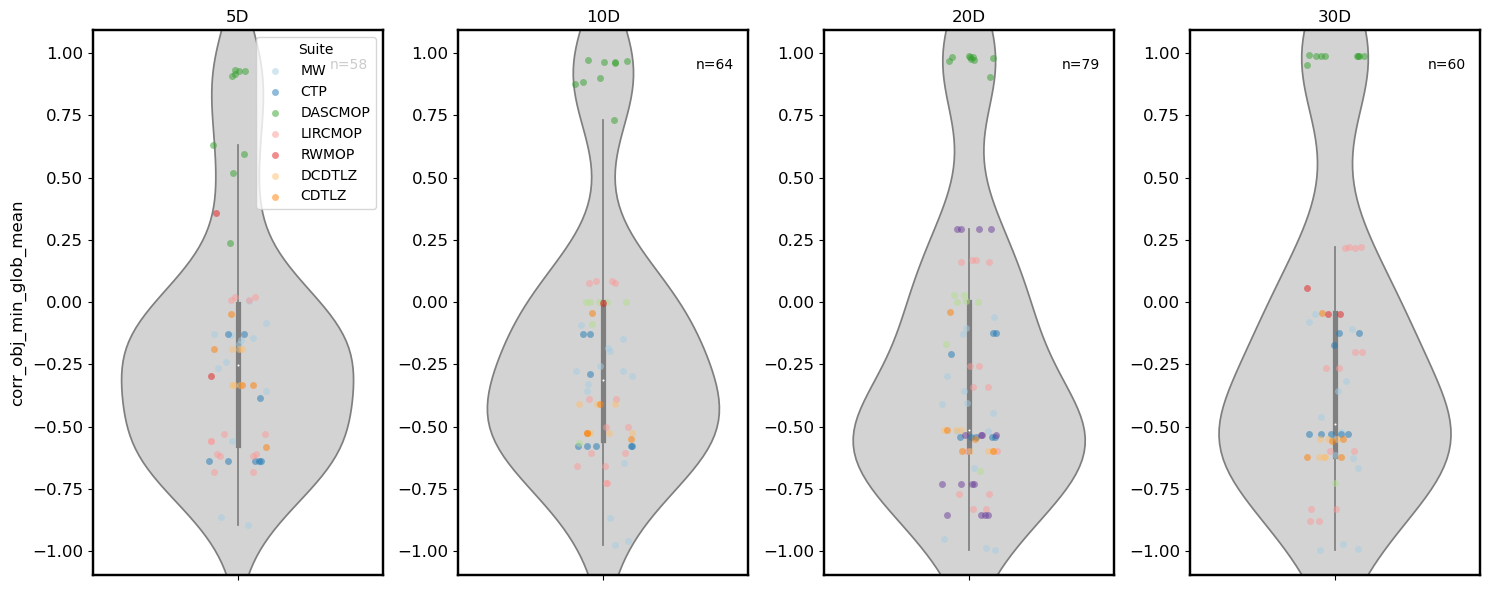

In [17]:
# Specify the feature name and the suites you're interested in
feature_name = "corr_obj_min_glob"  # Replace with your actual feature name
dims = [5, 10]  # Example dims names
suites = ["MW"]

# Create the plots
dashboard.plot_feature_across_dims(feature_name, dims=None, suite_names=None)

In [18]:
# Can create a PDF file of the features violin plots for every feature. Don't recommend running unless specifically interested.
# dashboard.generate_features_results_pdf_across_suites()

## 2D plot of feature 1 vs feature 2


Aerofoils have been specified for consideration, but the dataset for all samples is being considered. Restrict to global features only.
This dataframe contains 2 features.


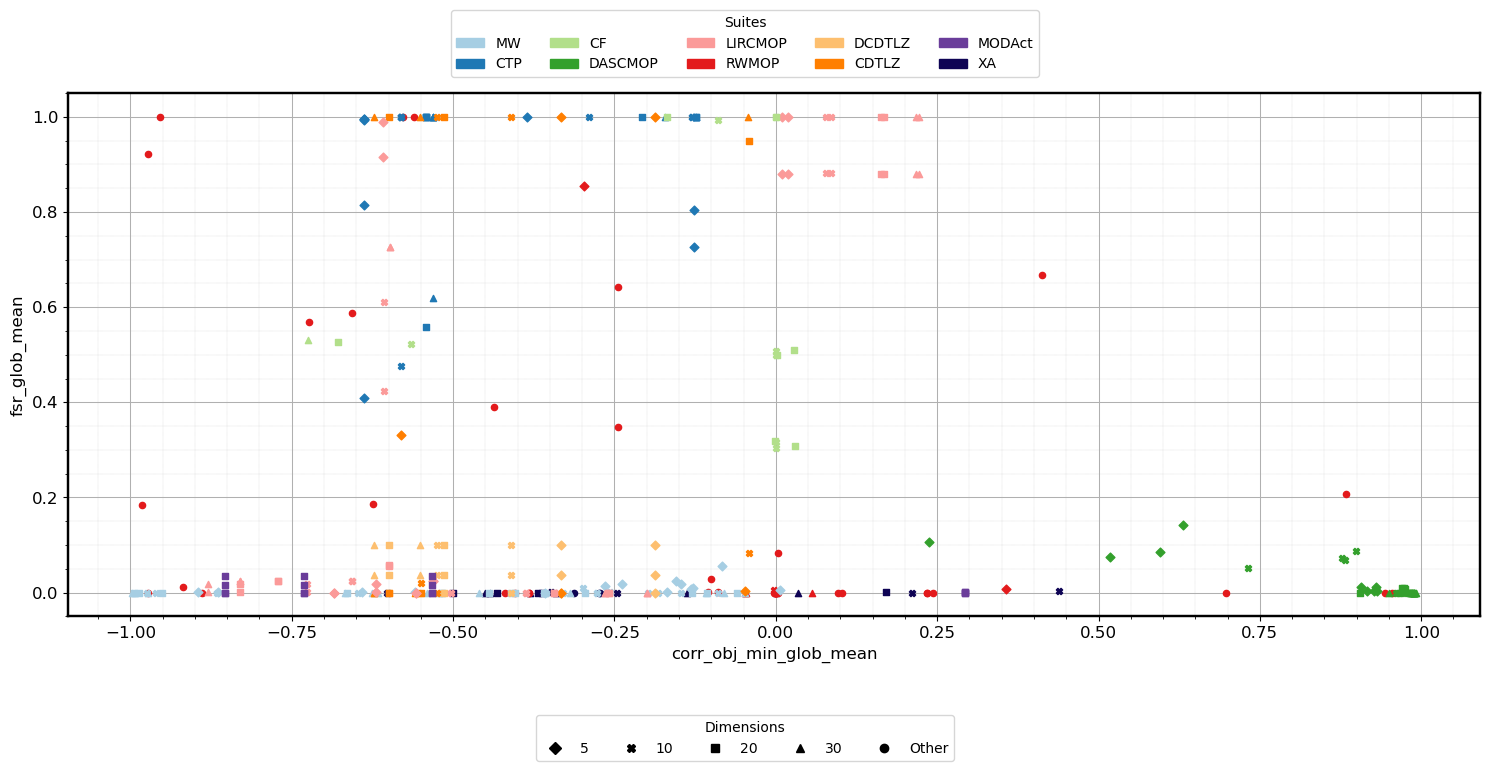

In [19]:
# Showing all suites (including aerofoils)
dashboard.plot_features_comparison(
    "corr_obj_min_glob", "fsr_glob", ignore_aerofoils=False
)

Aerofoils have been specified for consideration, but the dataset for all samples is being considered. Restrict to global features only.
This dataframe contains 2 features.


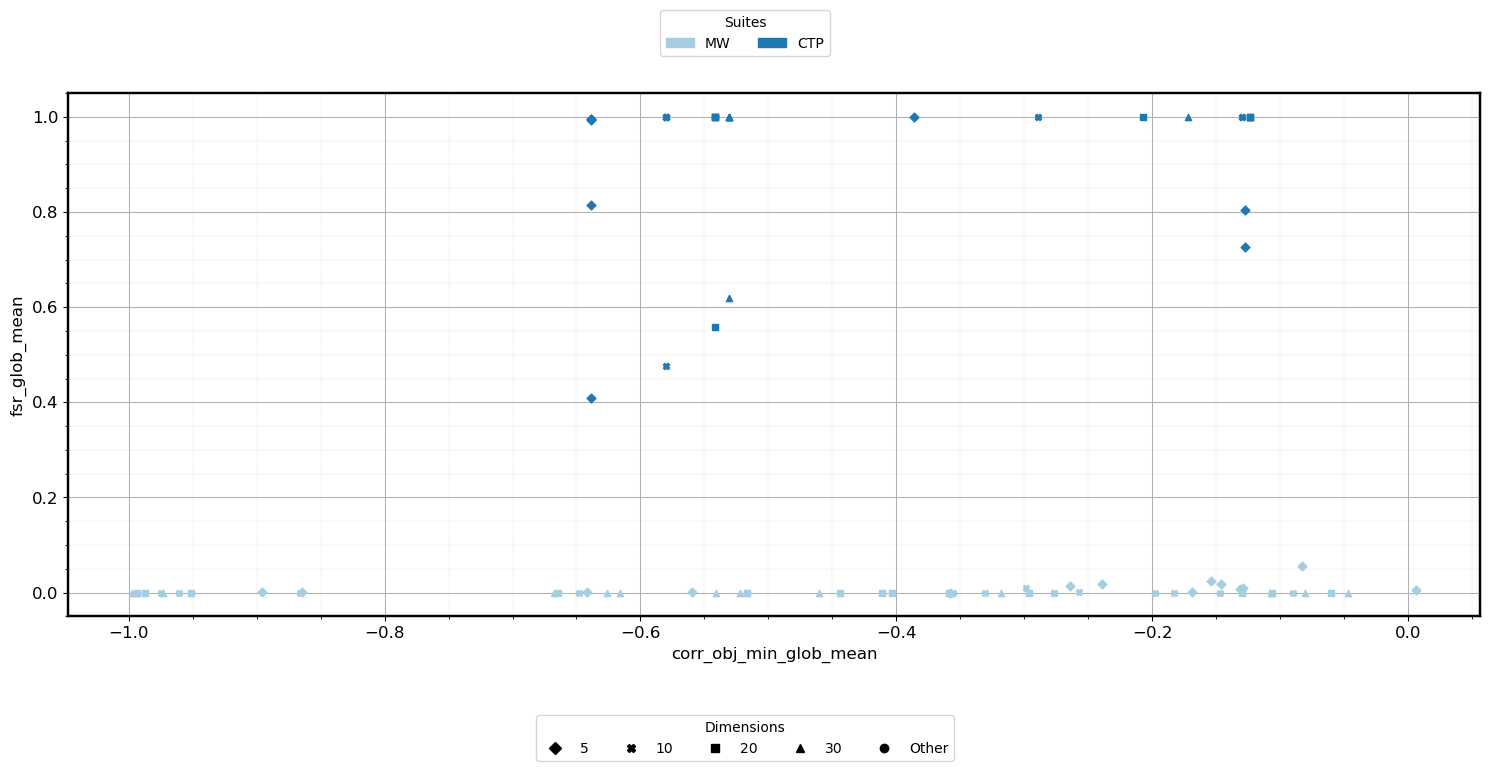

In [20]:
# Showing specific suites (excluding aerofoils)
dashboard.plot_features_comparison(
    "corr_obj_min_glob", "fsr_glob", suite_names=["MW", "CTP"], ignore_aerofoils=False
)

## Plot all features across the $n$ runs for a specific problem.


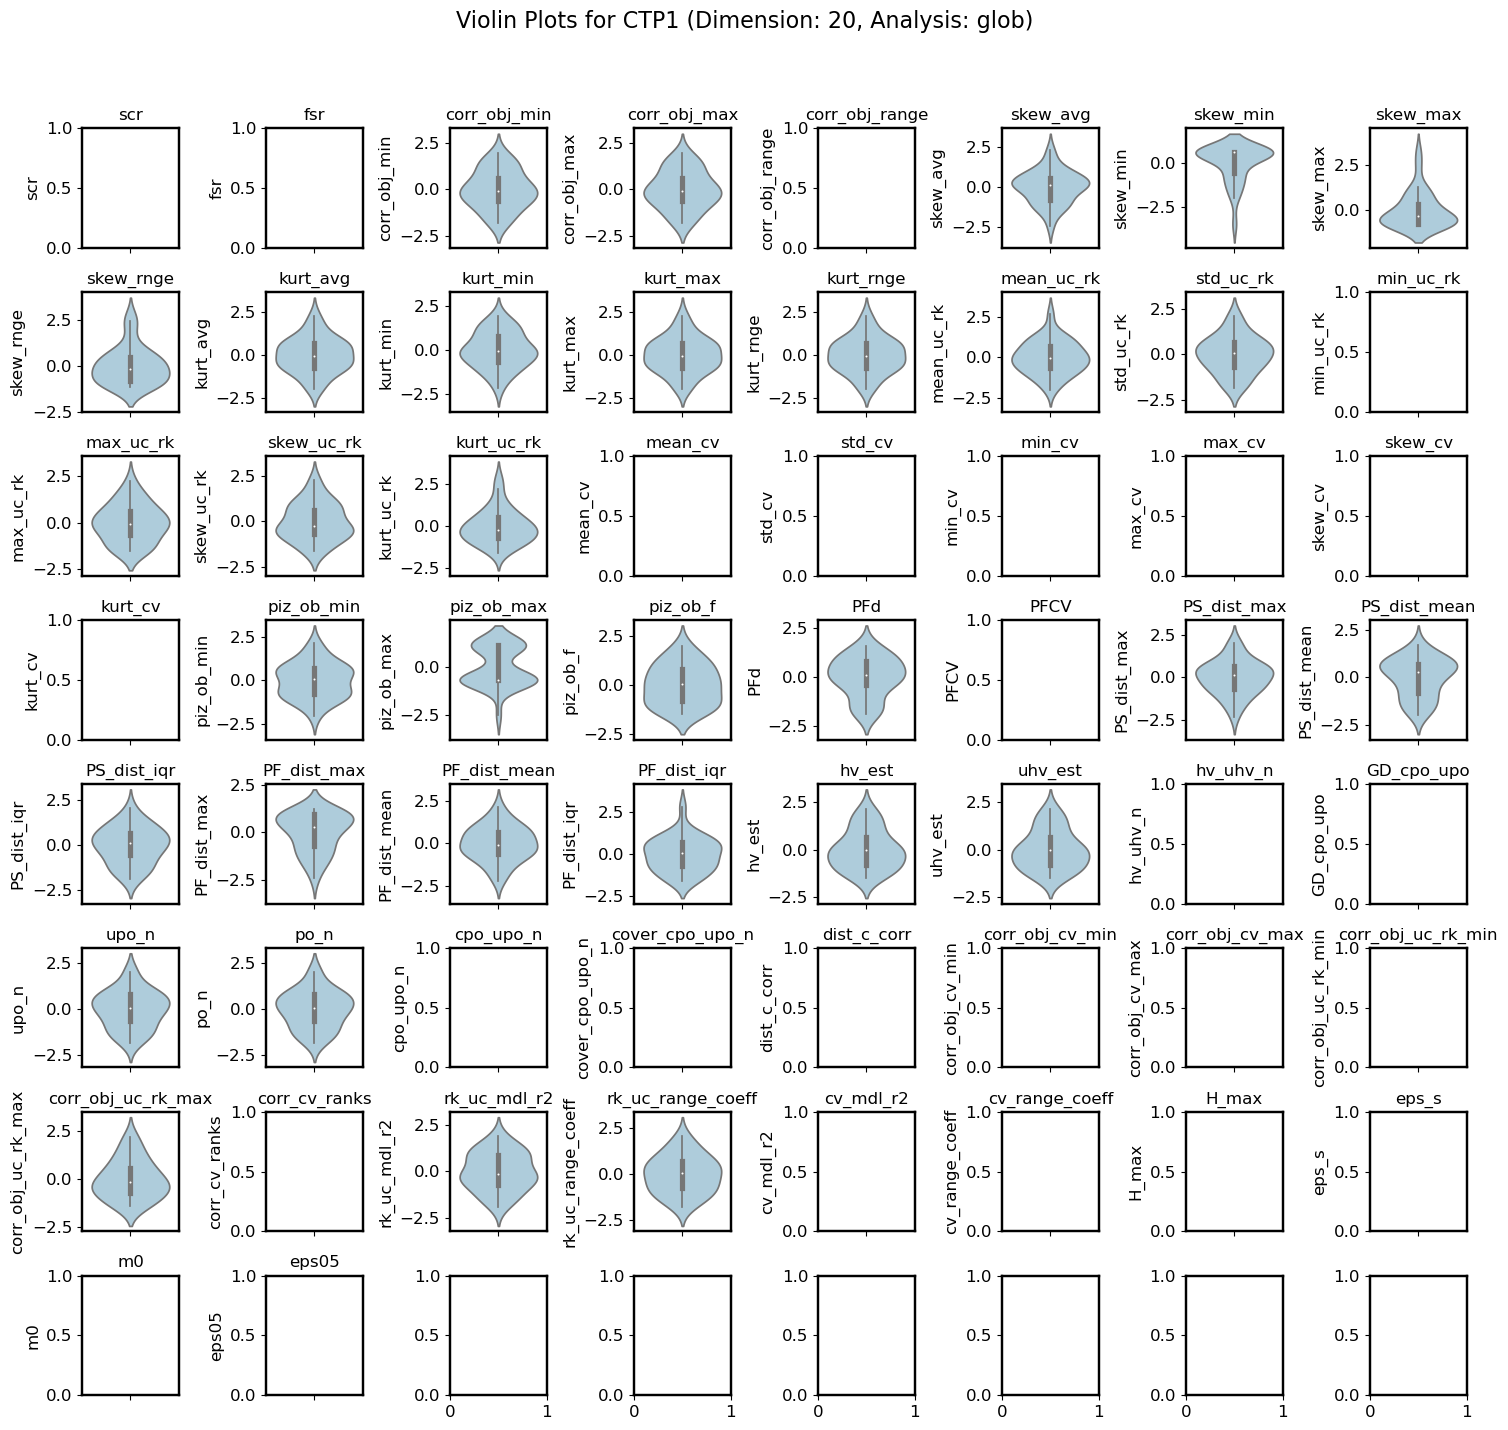

In [21]:
dashboard.plot_problem_features("CTP1", 20, "glob")

# Correlation Analysis (section 4.3 of report)

This code relates to the removal of redundant (highly-correlated) features in report section 4.1.3


Dropped instances:
['MW13_d5', 'CTP2_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20', 'RWMOP20_d4']
Initial length of the dataframe: 305
Total number of dropped instances: 7


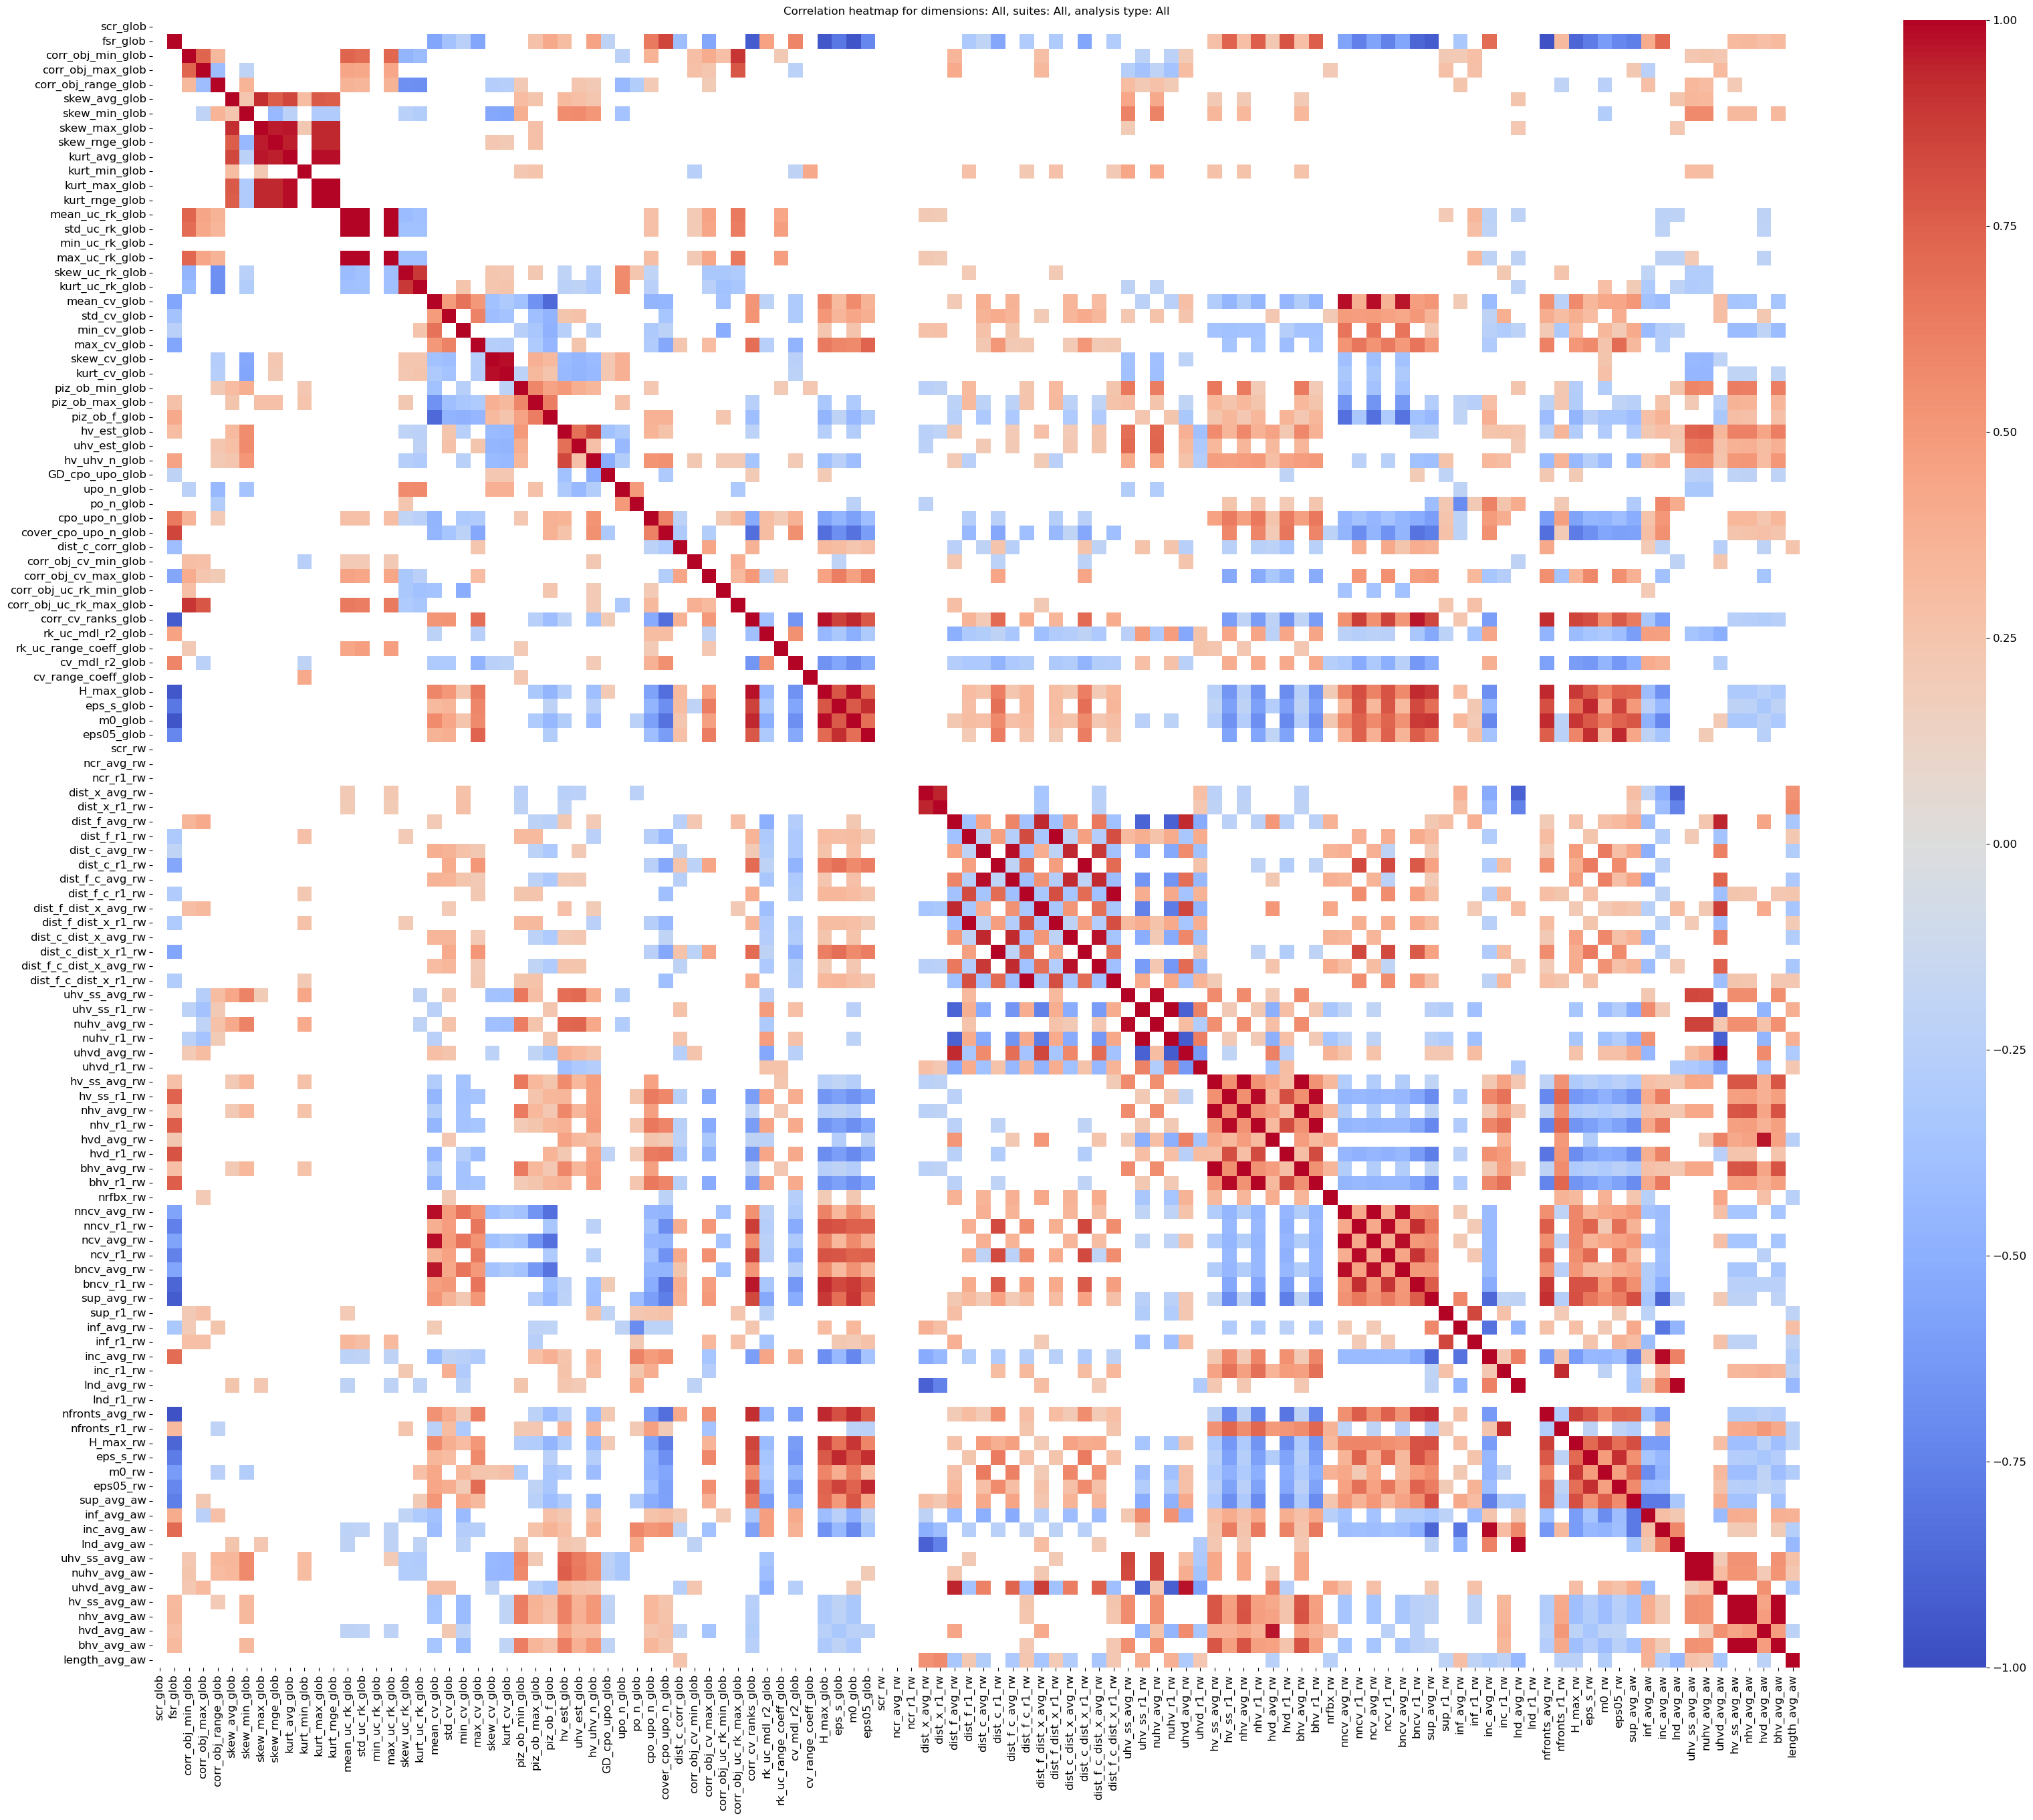

In [22]:
# This plot is hard to read.
dashboard.plot_correlation_heatmap(ignore_features=True, min_corr_magnitude=0.2)

In [23]:
corr_pairs_df = dashboard.get_top_correlation_pairs(
    min_corr_magnitude=0.98, ignore_features=True, filtered_err_pct=25
)
corr_pairs_df

Aerofoils are being ignored for analysis type: all.
Dropped instances:
['MW13_d5', 'CTP2_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20', 'RWMOP20_d4']
Initial length of the dataframe: 305
Total number of dropped instances: 7
Dropped instances:
['MW13_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30']
Initial length of the dataframe: 56
Total number of dropped instances: 4
Dropped instances:
['CTP2_d5']
Initial length of the dataframe: 32
Total number of dropped instances: 1
Dropped instances:
['CF2_d20']
Initial length of the dataframe: 15
Total number of dropped instances: 1
Dropped instances:
[]
Initial length of the dataframe: 36
Total number of dropped instances: 0
Dropped instances:
[]
Initial length of the dataframe: 56
Total number of dropped instances: 0
Dropped instances:
['RWMOP20_d4']
Initial length of the dataframe: 50
Total number of dropped instances: 1
Dropped instances:
[]
Initial length of the dataframe: 24
Total number of dropped instances: 0
Dropped instances:
[]
Initial l

Variable 1             Variable 2   Overall        MW       CTP  \
0         nhv_r1_rw              bhv_r1_rw  1.000000  1.000000  1.000000   
1        nhv_avg_rw             bhv_avg_rw  1.000000  1.000000  1.000000   
3       nncv_avg_rw             ncv_avg_rw  1.000000  1.000000  1.000000   
4     kurt_max_glob         kurt_rnge_glob  0.999993  0.996879  1.000000   
5      dist_c_r1_rw    dist_c_dist_x_r1_rw  0.999897  0.999849  1.000000   
6        nhv_avg_aw             bhv_avg_aw  0.999255  1.000000  1.000000   
7      hv_ss_avg_aw             nhv_avg_aw  0.999161  0.999985  0.999724   
8      hv_ss_avg_aw             bhv_avg_aw  0.998326  0.999985  0.999723   
9    dist_f_c_r1_rw  dist_f_c_dist_x_r1_rw  0.997872  0.996968  0.999629   
10     hv_ss_avg_rw             nhv_avg_rw  0.997845  0.999993  0.999843   
11     hv_ss_avg_rw             bhv_avg_rw  0.997845  0.999993  0.999843   
12   std_uc_rk_glob         max_uc_rk_glob  0.997407  0.997268  0.998667   
13     dist_f_r1_rw    dist_f_dist_x_r1_rw  0.997167  0.995692  0.999011   
15    uhv_ss_avg_aw            nuhv_avg_aw  0.994978  0.999687  0.999800   
16     uhv_ss_r1_rw             nuhv_r1_rw  0.994521  0.913375  0.953487   
17  mean_uc_rk_glob         std_uc_rk_glob  0.992749  0.997668  0.999920   
18      hv_ss_r1_rw              nhv_r1_rw  0.990882  0.942228  0.998272   
19      hv_ss_r1_rw              bhv_r1_rw  0.990882  0.942228  0.998272   
20    uhv_ss_avg_rw            nuhv_avg_rw  0.989910  0.999520  0.999861   
22       inc_avg_rw             inc_avg_aw  0.987010  0.990392  0.975324   
24     mean_cv_glob            nncv_avg_rw  0.983037  0.995169  0.997785   
25     mean_cv_glob             ncv_avg_rw  0.983016  0.995170  0.997794   
28    kurt_avg_glob          kurt_max_glob  0.980802  0.994883  1.000000   

          CF   DASCMOP   LIRCMOP     RWMOP    DCDTLZ     CDTLZ    MODAct  
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
3   1.000000  1.000000  1.000000  1.000000  0.999995  1.000000  1.000000  
4   0.803577  0.839068  0.862757  0.999998  0.979460  0.999580  1.000000  
5   0.999997  0.999798  0.999952  0.999692  0.999911  0.999948  0.999388  
6   1.000000  0.996245  1.000000  1.000000  0.999773  0.999994  0.999997  
7   0.994203  0.999788  0.999891  0.999972  0.999773  0.998784  0.999881  
8   0.994222  0.994651  0.999890  0.999971  0.999534  0.998693  0.999846  
9   0.999610  0.999842  0.994671  0.986778  0.999533  0.999613  0.990464  
10  0.991573  0.999121  0.999872  0.999952  0.998546  0.992986  0.999536  
11  0.991573  0.999121  0.999872  0.999952  0.998546  0.992986  0.999536  
12  0.998280  0.997928  0.998157  0.995365  0.948363  0.984525  0.999247  
13  0.999706  0.999550  0.998391  0.983943  0.999258  0.996962  0.993244  
15  0.991373  0.944509  0.999956  0.999806  0.983687  0.997879  0.999952  
16  0.943685  0.998307  0.892955  0.923484  0.935841  0.995471  0.994899  
17  0.996423  0.982578  0.993889  0.992622  0.917661  0.964120  0.998868  
18  0.991225  0.999046  0.993235  0.998954  0.999189  0.983861  0.835496  
19  0.991225  0.999046  0.993235  0.998954  0.999189  0.983861  0.835496  
20  0.963080  0.980257  0.999950  0.999340  0.990295  0.972739  0.999842  
22  0.975265  0.968534  0.982683  0.998904  0.894862  0.929543  0.947071  
24  0.965511  0.967980  0.983199  0.922367  0.999889  0.985130  0.999937  
25  0.965569  0.967921  0.983197  0.922251  0.999893  0.985083  0.999937  
28  0.841432  0.979401  0.972626  0.979526  0.998209  0.999929  0.930836

In [24]:
# This table was used to generate Table 4 on page 52. I just picked the 'least-intuitive' feature out of each column.

# Preserve the first two columns and select only numeric columns from the rest
numeric_df = corr_pairs_df.iloc[:, 2:].select_dtypes(include=[np.number])


# Combine the first two columns with the row minima
result_df = corr_pairs_df[["Variable 1", "Variable 2"]].copy()
result_df["MinCorr"] = round(numeric_df.min(axis=1), 3)
result_df["MaxCorr"] = round(numeric_df.max(axis=1), 3)
result_df["Overall"] = round(numeric_df["Overall"], 3)


result_df[["Variable 1", "Variable 2", "Overall", "MinCorr", "MaxCorr"]]

Variable 1             Variable 2  Overall  MinCorr  MaxCorr
0         nhv_r1_rw              bhv_r1_rw    1.000    1.000    1.000
1        nhv_avg_rw             bhv_avg_rw    1.000    1.000    1.000
3       nncv_avg_rw             ncv_avg_rw    1.000    1.000    1.000
4     kurt_max_glob         kurt_rnge_glob    1.000    0.804    1.000
5      dist_c_r1_rw    dist_c_dist_x_r1_rw    1.000    0.999    1.000
6        nhv_avg_aw             bhv_avg_aw    0.999    0.996    1.000
7      hv_ss_avg_aw             nhv_avg_aw    0.999    0.994    1.000
8      hv_ss_avg_aw             bhv_avg_aw    0.998    0.994    1.000
9    dist_f_c_r1_rw  dist_f_c_dist_x_r1_rw    0.998    0.987    1.000
10     hv_ss_avg_rw             nhv_avg_rw    0.998    0.992    1.000
11     hv_ss_avg_rw             bhv_avg_rw    0.998    0.992    1.000
12   std_uc_rk_glob         max_uc_rk_glob    0.997    0.948    0.999
13     dist_f_r1_rw    dist_f_dist_x_r1_rw    0.997    0.984    1.000
15    uhv_ss_avg_aw            nuhv_avg_aw    0.995    0.945    1.000
16     uhv_ss_r1_rw             nuhv_r1_rw    0.995    0.893    0.998
17  mean_uc_rk_glob         std_uc_rk_glob    0.993    0.918    1.000
18      hv_ss_r1_rw              nhv_r1_rw    0.991    0.835    0.999
19      hv_ss_r1_rw              bhv_r1_rw    0.991    0.835    0.999
20    uhv_ss_avg_rw            nuhv_avg_rw    0.990    0.963    1.000
22       inc_avg_rw             inc_avg_aw    0.987    0.895    0.999
24     mean_cv_glob            nncv_avg_rw    0.983    0.922    1.000
25     mean_cv_glob             ncv_avg_rw    0.983    0.922    1.000
28    kurt_avg_glob          kurt_max_glob    0.981    0.841    1.000

Aerofoils are being ignored for analysis type: all.
Dropped instances:
['MW13_d5', 'CTP2_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20', 'RWMOP20_d4']
Initial length of the dataframe: 305
Total number of dropped instances: 7
Dropped instances:
['MW13_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30']
Initial length of the dataframe: 56
Total number of dropped instances: 4
Dropped instances:
['CTP2_d5']
Initial length of the dataframe: 32
Total number of dropped instances: 1
Dropped instances:
['CF2_d20']
Initial length of the dataframe: 15
Total number of dropped instances: 1
Dropped instances:
[]
Initial length of the dataframe: 36
Total number of dropped instances: 0
Dropped instances:
[]
Initial length of the dataframe: 56
Total number of dropped instances: 0
Dropped instances:
['RWMOP20_d4']
Initial length of the dataframe: 50
Total number of dropped instances: 1
Dropped instances:
[]
Initial length of the dataframe: 24
Total number of dropped instances: 0
Dropped instances:
[]
Initial l

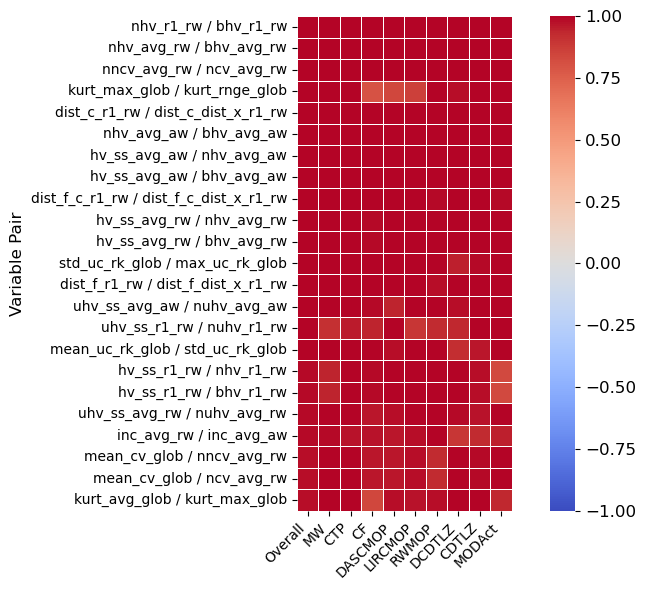

In [25]:
# Heatmap of corr_pairs_df
dashboard.plot_top_correlation_heatmap(min_corr_magnitude=0.95, filtered_err_pct=25)

Will use this analysis to remove features that are highly-correlated to maintain most orthogonal information


In [26]:
redundant_features = [
    "nncv_avg_rw",
    "ncv_avg_rw",
    "bhv_avg_rw",
    "nhv_avg_rw",
    "bhv_r1_rw",
    "nhv_r1_rw",
    "nuhv_avg_rw",
    "dist_c_dist_x_r1_rw",
    "dist_f_c_dist_x_r1_rw",
    "bhv_avg_aw",
    "nhv_avg_aw",
    "nuhv_avg_aw",
    "inc_avg_aw",
    "kurt_max_glob",
    "kurt_rnge_glob",
    "std_uc_rk_glob",
    "lnd_r1_rw",
    "min_uc_rk_glob",
]
redundant_features = [r + "_mean" for r in redundant_features]
dashboard.append_to_features_to_ignore(redundant_features)
dashboard.features_to_ignore

['PFd_glob_mean',
 'PFCV_glob_mean',
 'PS_dist_max_glob_mean',
 'PS_dist_mean_glob_mean',
 'PS_dist_iqr_glob_mean',
 'PF_dist_max_glob_mean',
 'PF_dist_mean_glob_mean',
 'PF_dist_iqr_glob_mean',
 'nncv_avg_rw_mean',
 'ncv_avg_rw_mean',
 'bhv_avg_rw_mean',
 'nhv_avg_rw_mean',
 'bhv_r1_rw_mean',
 'nhv_r1_rw_mean',
 'nuhv_avg_rw_mean',
 'dist_c_dist_x_r1_rw_mean',
 'dist_f_c_dist_x_r1_rw_mean',
 'bhv_avg_aw_mean',
 'nhv_avg_aw_mean',
 'nuhv_avg_aw_mean',
 'inc_avg_aw_mean',
 'kurt_max_glob_mean',
 'kurt_rnge_glob_mean',
 'std_uc_rk_glob_mean',
 'lnd_r1_rw_mean',
 'min_uc_rk_glob_mean']

# High-Dimensional Visualisation (section 4.2 of report)


## Hyperparameter selection (Appendix C.3)

Default hyperparameters for tSNE and UMAP were selected using silhouette score as the performance metric.


In [27]:
run_hyperparam_selection = False

if run_hyperparam_selection:
    # Finding optimal hyperparameter values using silhouette score.
    min_dists = [0.05, 0.2, 0.5, 0.8]
    sil_list = []

    for d in min_dists:
        silhouette_results = dashboard.grid_search_low_dim_hyperparameter(
            method="umap", umap_min_dist=d
        )
        sil_list.append(silhouette_results)
        
    # Run hyperparameter selection to get best trustworthiness score.
    tsne_silhouette_results = dashboard.grid_search_low_dim_hyperparameter(method="tsne")
    
    # Then append t-SNE results.
    sil_list.append(tsne_silhouette_results)
    
    # Figure 36 in report.
    dashboard.plot_dimreduction_perf_score(
        perf_results_list=sil_list,
        filepath="Results/SilhouetteScores_HyperparamSelection",
    )

## UMAP


Aerofoils are being ignored for analysis type: all.
Dropped instances:
['MW13_d5', 'CTP2_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20', 'RWMOP20_d4']
Initial length of the dataframe: 305
Total number of dropped instances: 7
This dataframe contains 92 features.


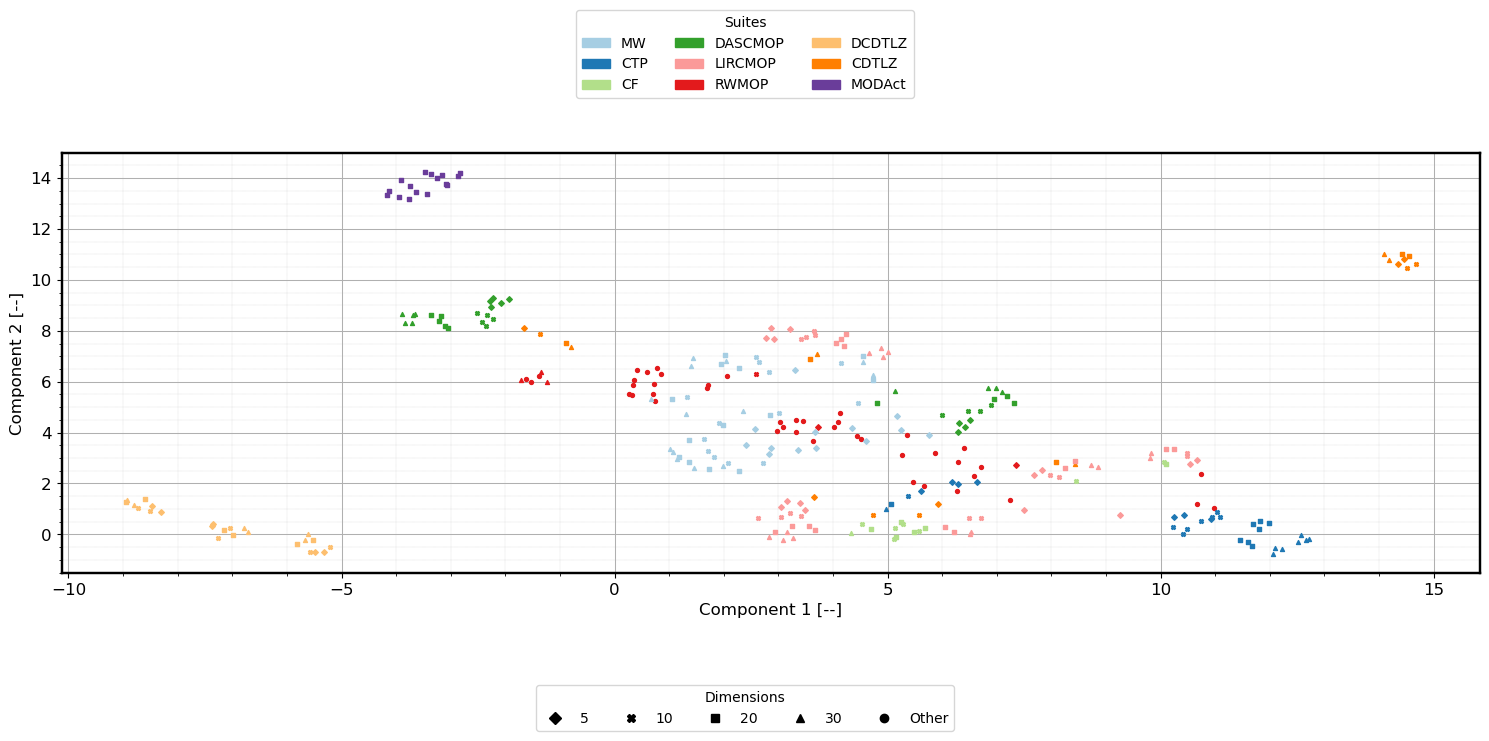

In [28]:
# Figure 16 in report.
dashboard.plot_UMAP(n_neighbors=[10], filepath="Results/UMAPOverall", random_state=45)

## $t$-SNE


Aerofoils are being ignored for analysis type: all.
Dropped instances:
['MW13_d5', 'CTP2_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20', 'RWMOP20_d4']
Initial length of the dataframe: 305
Total number of dropped instances: 7
This dataframe contains 92 features.


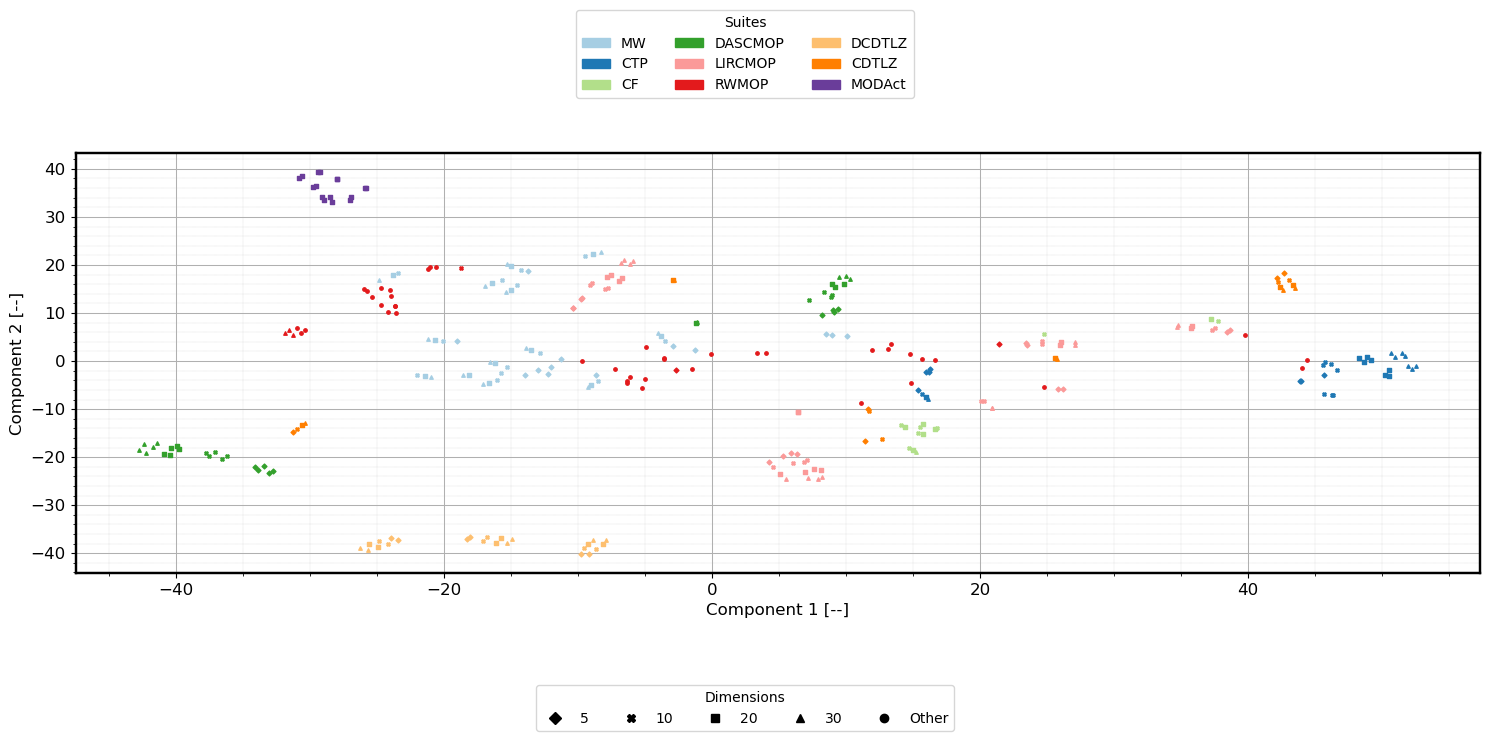

In [29]:
# Figure 17 in report.
dashboard.plot_tSNE(
    analysis_type=None,
    use_analytical_problems=False,
    random_state=100,
    filepath="Results/tSNEOverall",
)

# Feature Extraction Process (section 4.3 of report)

We combined scores from random forest classification models (use landscape features to distinguish suites) and coverage. First we show how the individual methods are run, then we update.


## Random Forest Classification Model

Classifies suite from the feature set. Need to run over multiple runs to get more robust feature importances.


In [30]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Suppress the specific UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [31]:
# Train many random forests and extract feature importances from each.
rfs = []
reports = []
accs = []
num_forests = 100

for n in range(num_forests):

    rf, report, acc = dashboard.train_random_forest(
        test_size=0.2,
        suite_in_focus=None,
        random_seed=n,
        return_report=True,
        show_output=False
    )
    rfs.append(rf)
    accs.append(acc)
    reports.append(report)
    print(f"Forest {n+1}/{num_forests} done", end='\r')

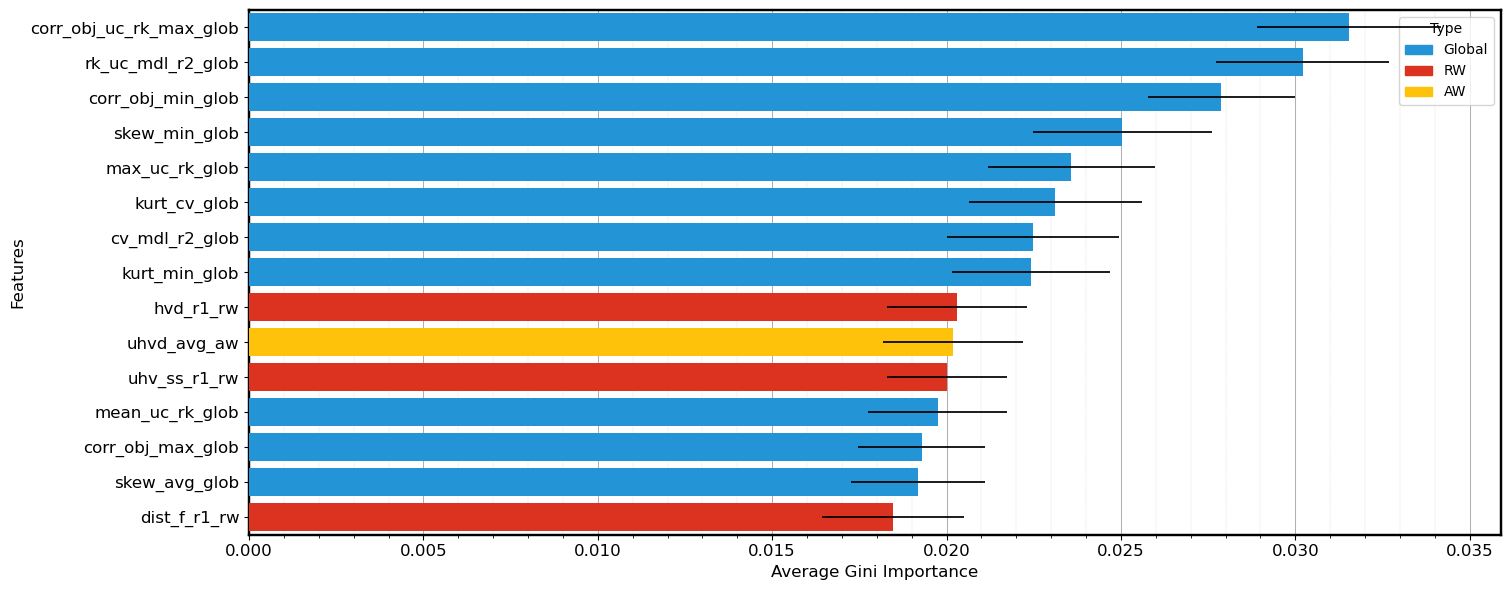

In [32]:
feature_imps = dashboard.get_feature_importances(classifiers=rfs, top_features=15)

# Figure 18 in report.
dashboard.plot_feature_importances(
    feature_importances_df=feature_imps, filepath="Results/RFFeatureImportance_Overall"
)

In [33]:
feature_imps

Importance        SD
corr_obj_uc_rk_max_glob    0.031543  0.005268
rk_uc_mdl_r2_glob          0.030212  0.004960
corr_obj_min_glob          0.027876  0.004207
skew_min_glob              0.025041  0.005127
max_uc_rk_glob             0.023578  0.004782
kurt_cv_glob               0.023113  0.004960
cv_mdl_r2_glob             0.022470  0.004929
kurt_min_glob              0.022414  0.004523
hvd_r1_rw                  0.020299  0.004000
uhvd_avg_aw                0.020177  0.004008
uhv_ss_r1_rw               0.020014  0.003421
mean_uc_rk_glob            0.019747  0.003985
corr_obj_max_glob          0.019292  0.003636
skew_avg_glob              0.019175  0.003834
dist_f_r1_rw               0.018469  0.004087

In [34]:
# Table 11 in report.
feature_imps = dashboard.get_feature_importances(classifiers=rfs, top_features=None)


dashboard.convert_to_latex(feature_imps, filename="OverallGiniImportances")

LaTeX table has been successfully written to ../../rrut_thesis_report/Tables/OverallGiniImportances.txt


In [35]:
# Model performance metrics. Feeds into Table 10 in report. Did not automate export to Latex.
dashboard.aggregate_reports(reports)

precision         recall       f1-score         support  \
Suite                                                                       
CDTLZ         0.940 (0.154)  0.874 (0.204)  0.888 (0.167)   3.939 (1.791)   
CF            0.980 (0.104)  0.973 (0.127)  0.966 (0.120)   2.899 (1.374)   
CTP           0.975 (0.067)  1.000 (0.000)  0.986 (0.038)   5.870 (2.448)   
DASCMOP       0.960 (0.077)  0.983 (0.044)  0.969 (0.052)   7.590 (2.510)   
DCDTLZ        0.991 (0.044)  1.000 (0.000)  0.995 (0.026)   5.120 (1.862)   
LIRCMOP       0.962 (0.060)  1.000 (0.000)  0.980 (0.033)  11.570 (2.523)   
MODAct        0.985 (0.069)  1.000 (0.000)  0.991 (0.043)   3.378 (1.626)   
MW            0.944 (0.078)  0.992 (0.027)  0.965 (0.046)   9.690 (2.734)   
RWMOP         0.961 (0.066)  0.874 (0.111)  0.910 (0.069)  10.080 (2.667)   
accuracy                NaN            NaN            NaN             NaN   
macro avg     0.967 (0.029)  0.966 (0.030)  0.961 (0.034)  60.000 (0.000)   
weighted avg  0.968 (0.022)  0.963 (0.027)  0.962 (0.029)  60.000 (0.000)   

                      value  
Suite                        
CDTLZ                   NaN  
CF                      NaN  
CTP                     NaN  
DASCMOP                 NaN  
DCDTLZ                  NaN  
LIRCMOP                 NaN  
MODAct                  NaN  
MW                      NaN  
RWMOP                   NaN  
accuracy      0.963 (0.027)  
macro avg               NaN  
weighted avg            NaN

## Coverage


Aerofoils are being ignored for analysis type: all.
Dropped instances:
['MW13_d5', 'CTP2_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20', 'RWMOP20_d4']
Initial length of the dataframe: 305
Total number of dropped instances: 7
This dataframe contains 92 features.


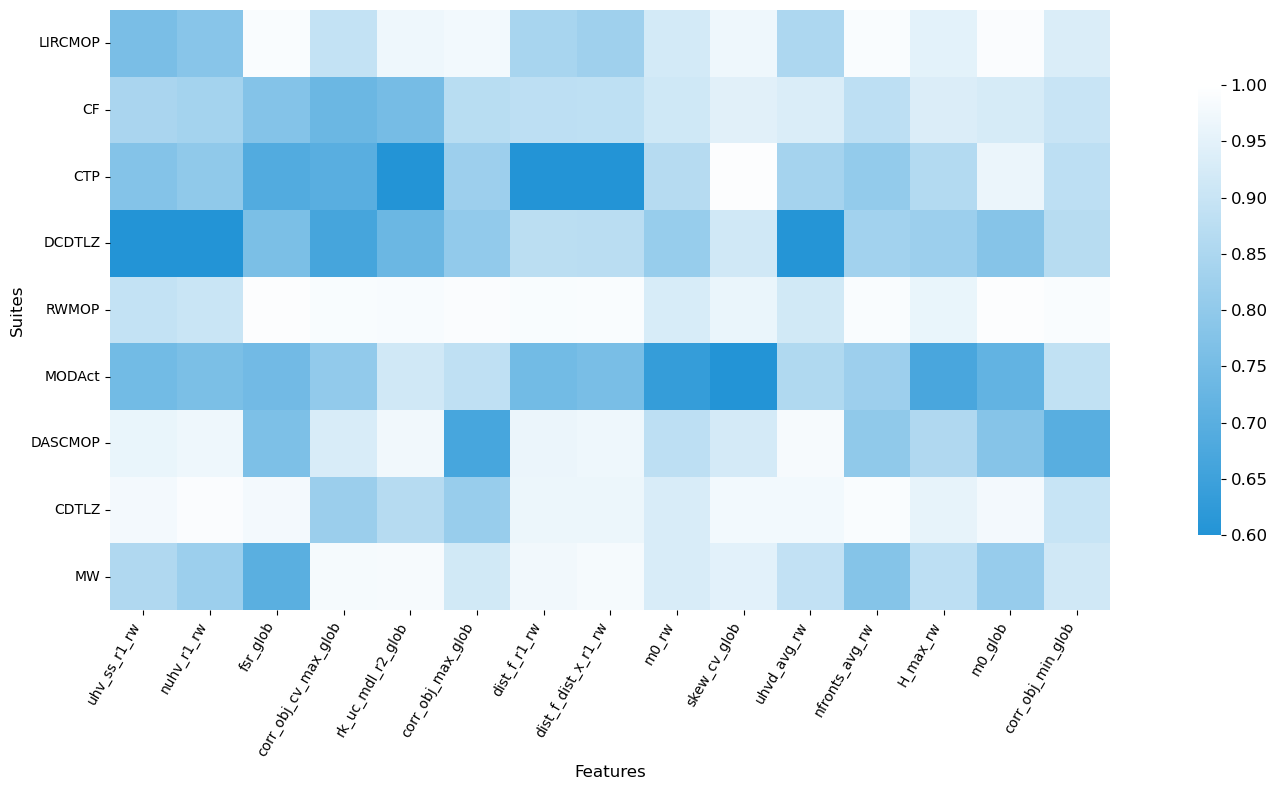

In [36]:
# Figure 19 in the report.
dashboard.plot_coverage_heatmap(
    target_suite=None, top_features=15, filepath="Results/CovFeatureImportance_Overall"
)

In [37]:
# Table 12 in report.
cov = dashboard.get_feature_coverage(target_suite=None, run_sensitivity_analysis=False)
cov = dashboard.get_top_coverage_features(coverage_values=cov, aslist=False)
cov.rename(columns={"mean_coverage": "Overall"}, inplace=True)
dashboard.convert_to_latex(
    cov, filename="OverallCoverage", include_columns=False, significant_figures=3
)

Aerofoils are being ignored for analysis type: all.
Dropped instances:
['MW13_d5', 'CTP2_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20', 'RWMOP20_d4']
Initial length of the dataframe: 305
Total number of dropped instances: 7
This dataframe contains 92 features.
LaTeX table has been successfully written to ../../rrut_thesis_report/Tables/OverallCoverage.txt


## Extracting the top features

Will now rank each of the features according to:

- Coverage
- RF Suite Classification Model Feature Importance


In [38]:
# Try running with and without PCA to see how rankings are mostly unaffected by their inclusion.
feature_ranks = dashboard.rank_each_feature(run_pca=False, show_output=False)

In [39]:
feature_ranks

Type  Coverage        RF  CoverageMean    RFMean  \
rk_uc_mdl_r2_glob        Global  0.805541  0.956943      0.805541  0.956943   
uhv_ss_r1_rw                 RW  1.000000  0.626991      1.000000  0.626991   
corr_obj_uc_rk_max_glob  Global  0.593640  1.000000      0.593640  1.000000   
nuhv_r1_rw                   RW  0.954873  0.526328      0.954873  0.526328   
corr_obj_min_glob        Global  0.595568  0.881345      0.595568  0.881345   
...                         ...       ...       ...           ...       ...   
lnd_avg_aw                   AW  0.191323  0.047745      0.191323  0.047745   
min_cv_glob              Global  0.198613  0.038333      0.198613  0.038333   
po_n_glob                Global  0.047115  0.138883      0.047115  0.138883   
corr_obj_uc_rk_min_glob  Global  0.113018  0.000880      0.113018  0.000880   
cv_range_coeff_glob      Global  0.000000  0.000000      0.000000  0.000000   

                         MeanScore  OverallRank  
rk_uc_mdl_r2_glob         0.881242          1.0  
uhv_ss_r1_rw              0.813495          2.0  
corr_obj_uc_rk_max_glob   0.796820          3.0  
nuhv_r1_rw                0.740600          4.0  
corr_obj_min_glob         0.738456          5.0  
...                            ...          ...  
lnd_avg_aw                0.119534         88.0  
min_cv_glob               0.118473         89.0  
po_n_glob                 0.092999         90.0  
corr_obj_uc_rk_min_glob   0.056949         91.0  
cv_range_coeff_glob       0.000000         92.0  

[92 rows x 7 columns]

In [40]:
if "MeanScore" in feature_ranks.columns:
    feat_ranks_cleaned = feature_ranks.rename(columns={"MeanScore": "Overall Score"})


# Table 13 in report.
dashboard.convert_to_latex(
    feat_ranks_cleaned[["RF", "Coverage", "Overall Score", "OverallRank"]],
    filename="OverallFeatureScores",
    significant_figures=3,
)

LaTeX table has been successfully written to ../../rrut_thesis_report/Tables/OverallFeatureScores.txt


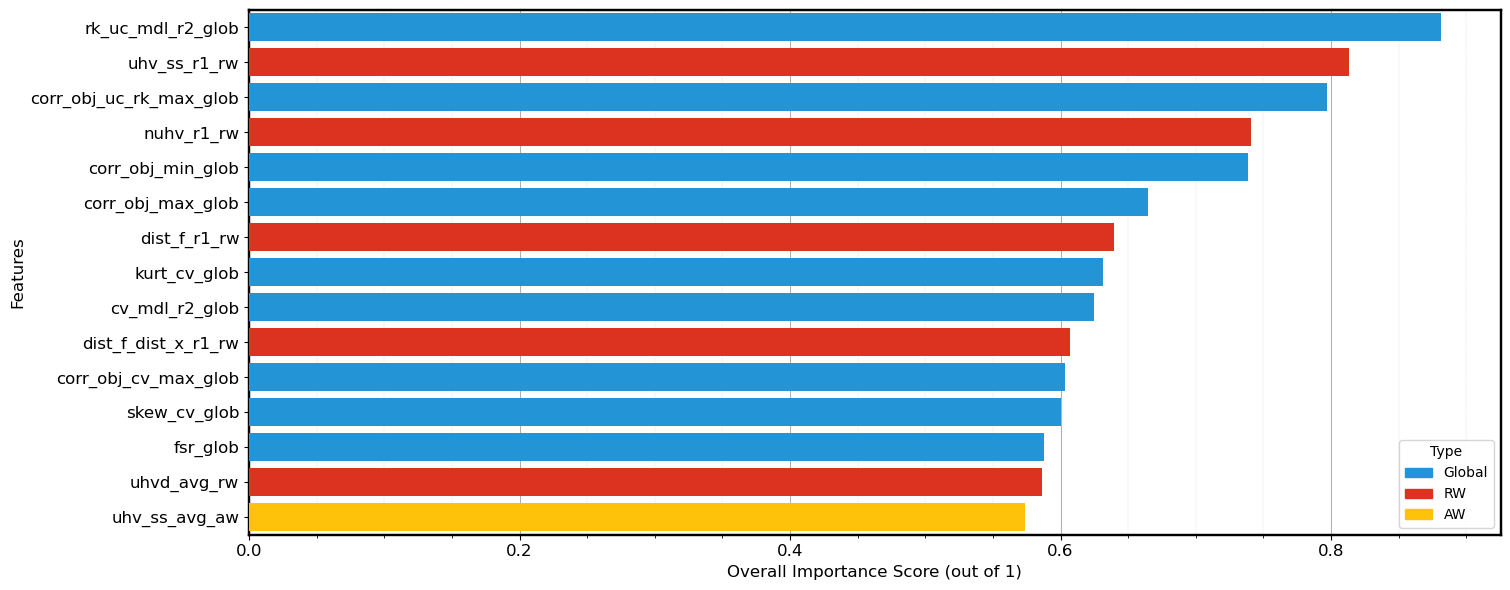

In [41]:
# Figure 20 in the report.
dashboard.plot_feature_importances(
    feature_importances_df=feat_ranks_cleaned.head(15),
    filepath="Results/FeatureScores_Overall",
    variable_name="Overall Score",
    xlabel="Overall Importance Score (out of 1)",
)

Investigating if ranks are correlated between importance determination methods.


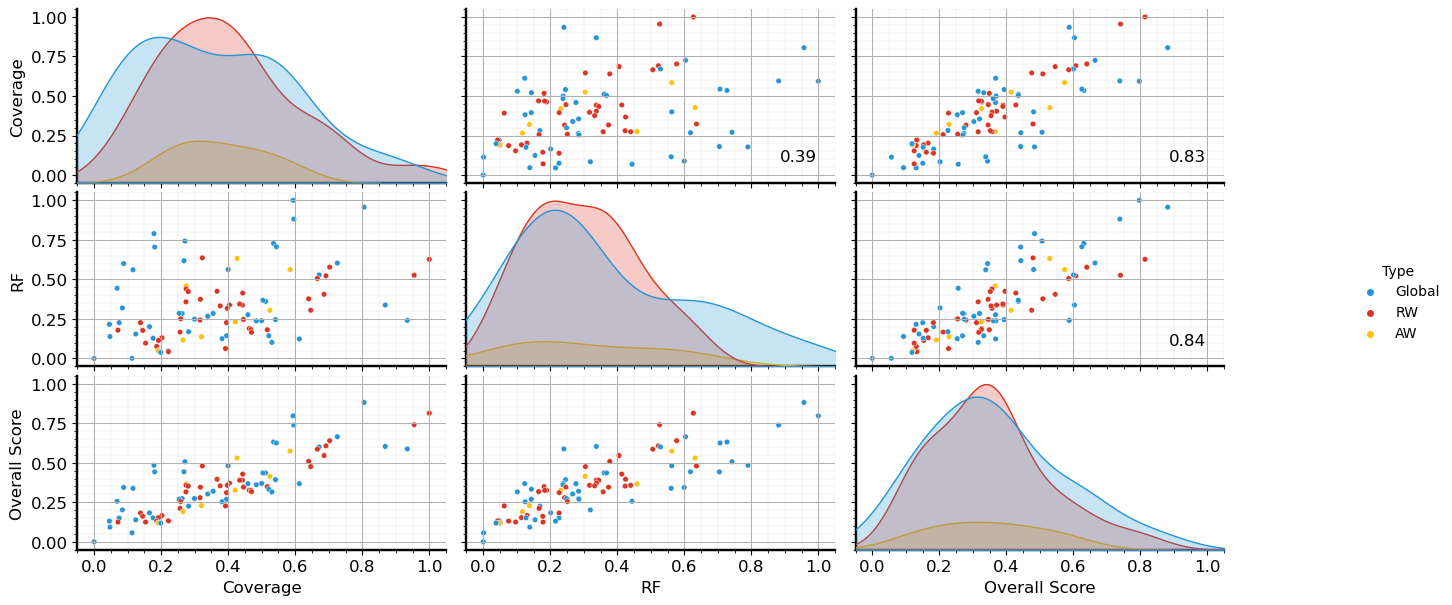

In [42]:
# Figure 21 in report.
feature_ranks.rename(
    columns={"MeanScore": "Overall Score"},
    inplace=True,
)


g = dashboard.generate_scatterplot_matrix(
    feature_ranks,
    columns=["Type", "Coverage", "RF", "Overall Score"],
    color_by="Type",
    filepath="Results/CombinedScores_Overall",
    limits=(-0.05, 1.05),
)

In [43]:
# Extract top n features in terms of mean rank.
n_features = 15
top_features = feature_ranks.head(n_features)
top_features

Type  Coverage        RF  CoverageMean    RFMean  \
rk_uc_mdl_r2_glob        Global  0.805541  0.956943      0.805541  0.956943   
uhv_ss_r1_rw                 RW  1.000000  0.626991      1.000000  0.626991   
corr_obj_uc_rk_max_glob  Global  0.593640  1.000000      0.593640  1.000000   
nuhv_r1_rw                   RW  0.954873  0.526328      0.954873  0.526328   
corr_obj_min_glob        Global  0.595568  0.881345      0.595568  0.881345   
corr_obj_max_glob        Global  0.725603  0.603607      0.725603  0.603607   
dist_f_r1_rw                 RW  0.702635  0.576995      0.702635  0.576995   
kurt_cv_glob             Global  0.535334  0.727236      0.535334  0.727236   
cv_mdl_r2_glob           Global  0.543712  0.706440      0.543712  0.706440   
dist_f_dist_x_r1_rw          RW  0.691570  0.522662      0.691570  0.522662   
corr_obj_cv_max_glob     Global  0.868686  0.337505      0.868686  0.337505   
skew_cv_glob             Global  0.671450  0.528862      0.671450  0.528862   
fsr_glob                 Global  0.934517  0.240569      0.934517  0.240569   
uhvd_avg_rw                  RW  0.666061  0.505776      0.666061  0.505776   
uhv_ss_avg_aw                AW  0.584872  0.562402      0.584872  0.562402   

                         Overall Score  OverallRank  
rk_uc_mdl_r2_glob             0.881242          1.0  
uhv_ss_r1_rw                  0.813495          2.0  
corr_obj_uc_rk_max_glob       0.796820          3.0  
nuhv_r1_rw                    0.740600          4.0  
corr_obj_min_glob             0.738456          5.0  
corr_obj_max_glob             0.664605          6.0  
dist_f_r1_rw                  0.639815          7.0  
kurt_cv_glob                  0.631285          8.0  
cv_mdl_r2_glob                0.625076          9.0  
dist_f_dist_x_r1_rw           0.607116         10.0  
corr_obj_cv_max_glob          0.603096         11.0  
skew_cv_glob                  0.600156         12.0  
fsr_glob                      0.587543         13.0  
uhvd_avg_rw                   0.585919         14.0  
uhv_ss_avg_aw                 0.573637         15.0

In [44]:
# Create new features dashboard with reduced feature set.
top_features_list = top_features.index.to_list()

dash_reduced = copy.deepcopy(dashboard)
dash_reduced.use_these_features_only(top_features_list)

All specified features have been considered


Aerofoils are being ignored for analysis type: all.
Dropped instances:
['MW13_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20']
Initial length of the dataframe: 305
Total number of dropped instances: 5
This dataframe contains 15 features.


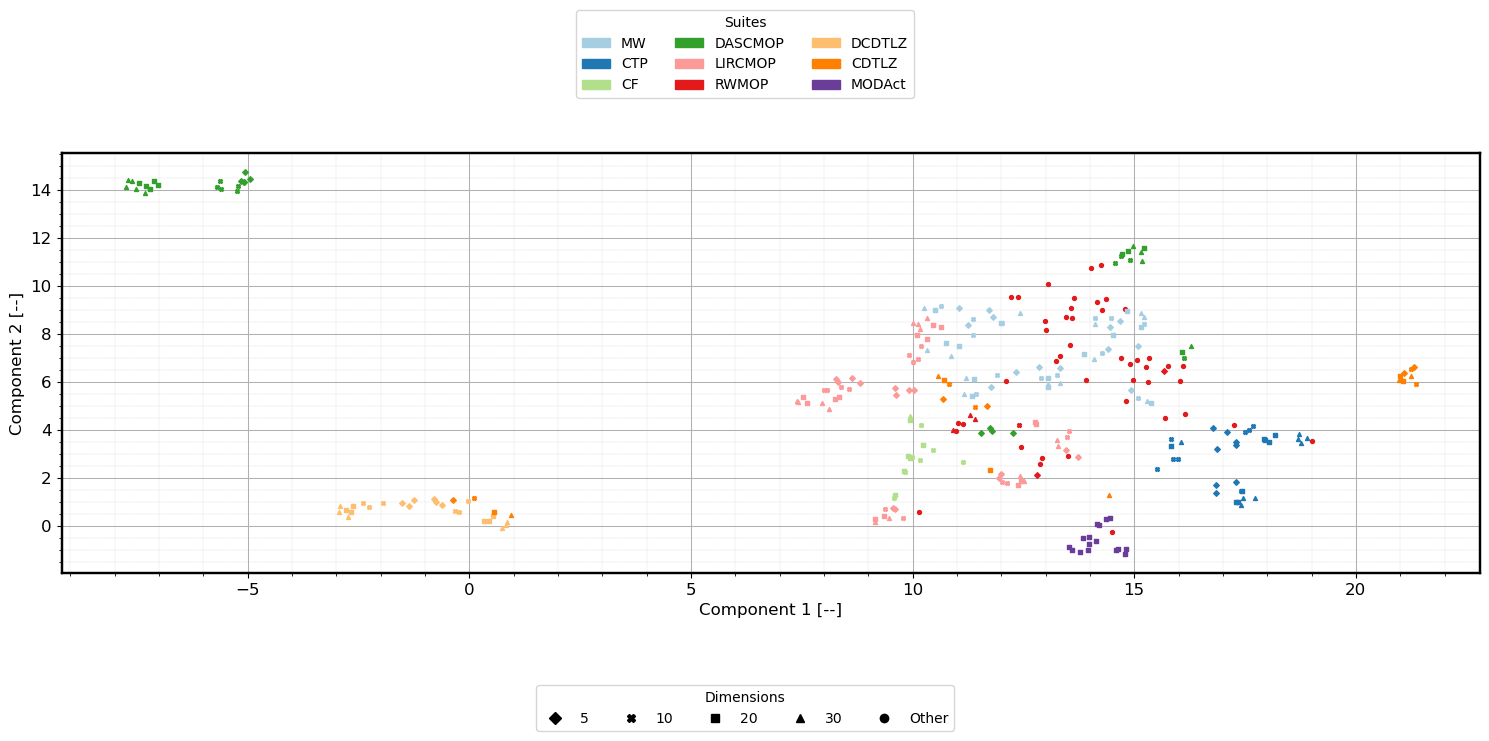

In [45]:
# Figure 22 in the report.
dash_reduced.plot_UMAP(filepath="Results/UMAPOverall_Reduced", random_state=15)

Aerofoils are being ignored for analysis type: all.
Dropped instances:
['MW13_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20']
Initial length of the dataframe: 305
Total number of dropped instances: 5
This dataframe contains 15 features.


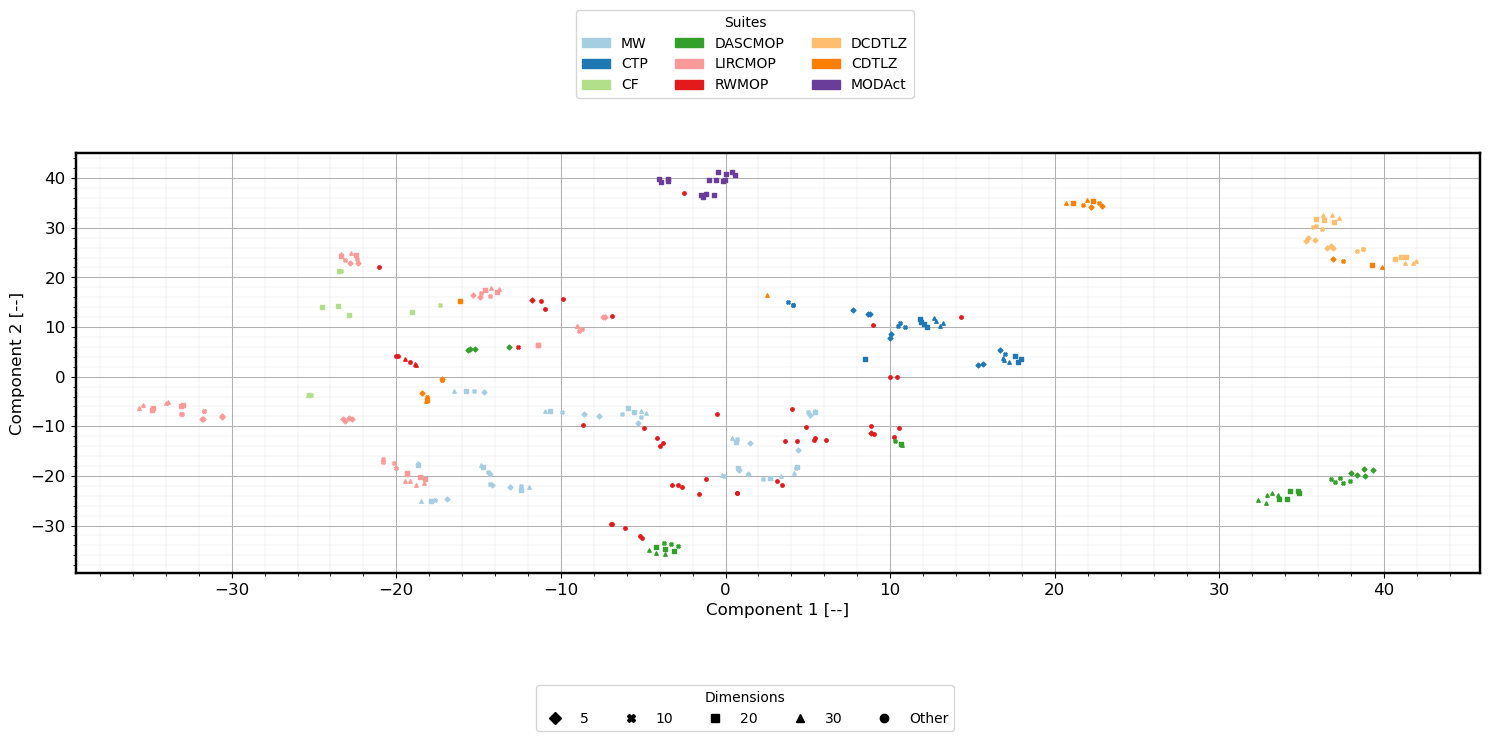

In [46]:
# Figure 40 in report.
dash_reduced.plot_tSNE(filepath="Results/tSNEOverall_Reduced", random_state=25)

## Investigating whether top features are independent of dimension.

This is not documented super well as I did not include it in the report.


In [47]:
# # Initialise dataframe.
# ranks_across_dims = pd.DataFrame(
#     index=dashboard.get_feature_names(ignore_features=True)
# )


# # Make a new dashboard each time and update the dataframe.


# dims = [
#     None,
#     [i for i in np.arange(1, 10 + 1)],
#     [i for i in np.arange(11, 20 + 1)],
#     [i for i in np.arange(21, 30 + 1)],
# ]


# for ctr, d in enumerate(dims):

#     if ctr == 0:

#         dim_str = "All"

#     elif ctr == 1:

#         dim_str = "1-10"

#     elif ctr == 2:

#         dim_str = "11-20"

#     elif ctr == 3:

#         dim_str = "21-30"

#     dash_d = copy.deepcopy(dashboard)

#     print(f"---------- Running for {dim_str} ----------")

#     if d is not None:

#         dash_d.set_dashboard_dimensionality(d=d)

#     feature_ranks = dash_d.rank_each_feature()

#     ranks_across_dims[f"MeanScore{dim_str}D"] = feature_ranks["MeanScore"]

#     ranks_across_dims[f"Rank{dim_str}D"] = feature_ranks["OverallRank"]

In [48]:
# ranks_across_dims["Type"] = feature_ranks.index.to_series().apply(
#     lambda x: (
#         "Global"
#         if "_glob" in x
#         else ("RW" if "_rw" in x else ("AW" if "_aw" in x else "Other"))
#     )
# )
# ranks_across_dims

In [49]:
# # Mean rank plot
# mean_rank_cols = [c for c in ranks_across_dims.columns if "MeanScore" not in c]

# g = dashboard.generate_scatterplot_matrix(
#     ranks_across_dims, columns=mean_rank_cols, color_by="Type"
# )
# # for ax in g.axes.flatten():
# #     if ax:
# #         ax.set_xlim(0, len(ranks_across_dims))
# #         ax.set_ylim(0, len(ranks_across_dims))

In [50]:
# # Rank of rank plot
# rank_rank_cols = [c for c in ranks_across_dims.columns if "Rank" not in c]

# g = dashboard.generate_scatterplot_matrix(
#     ranks_across_dims, columns=rank_rank_cols, color_by="Type"
# )
# # for ax in g.axes.flatten():
# #     if ax:
# #         ax.set_xlim(0, len(ranks_across_dims))
# #         ax.set_ylim(0, len(ranks_across_dims))

# Global Only Analysis (section 4.5 of report)

This also feeds into the impact of dimension reduction method.


In [51]:
# Consider global features only.
global_dashboard = copy.deepcopy(dashboard)
global_dashboard.set_dashboard_analysis_type("glob")

### Coverage (for Appendix D.6)


Aerofoils are being ignored for analysis type: glob.
Dropped instances:
['MW13_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20', 'RWMOP20_d4']
Initial length of the dataframe: 305
Total number of dropped instances: 6
This dataframe contains 45 features.


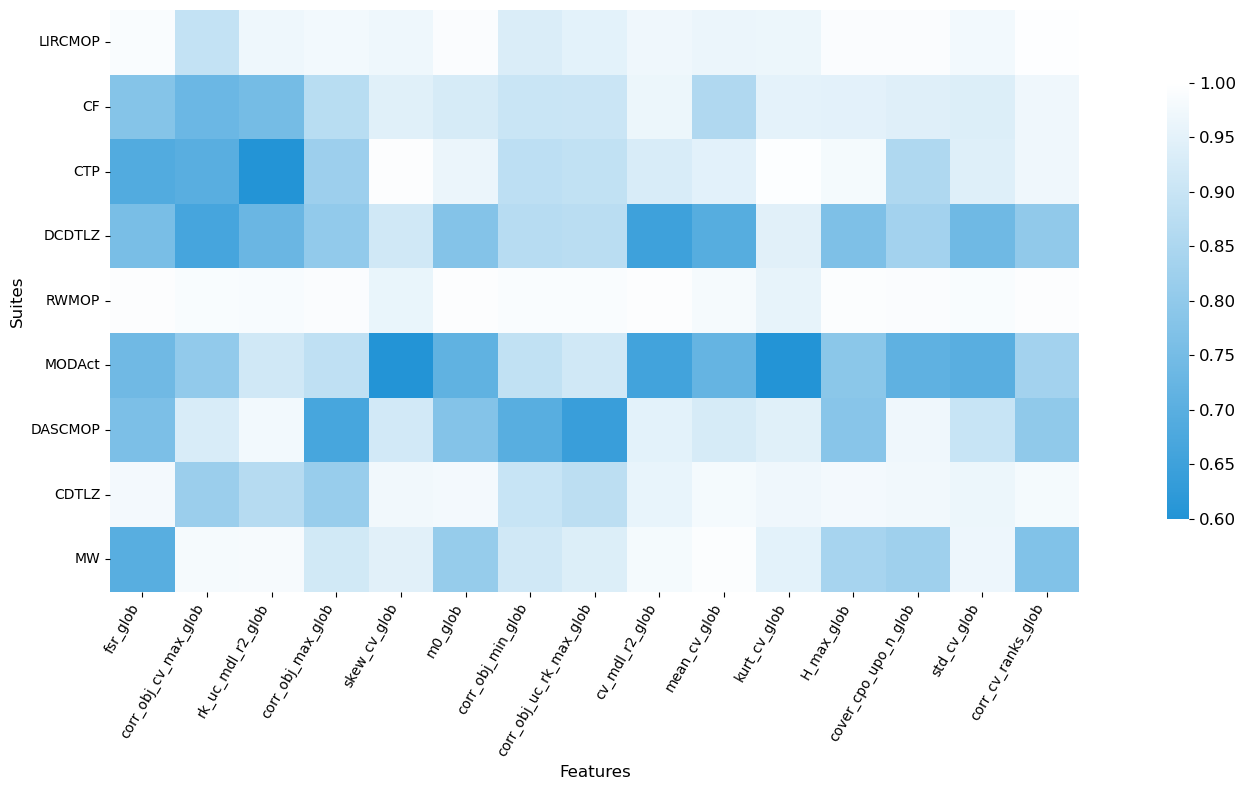

In [52]:
# Figure 43 in report.
global_dashboard.plot_coverage_heatmap(
    target_suite=None,
    top_features=15,
    filepath="Results/CovFeatureImportance_Global",
)

### Gini importance

Here we outline how a few tables (Appendix D.3.2) and figures (for Appendix D.6) were generated.


In [53]:
rfs = []
reports = []
accs = []


for n in range(100):

    rf, report, acc = global_dashboard.train_random_forest(
        test_size=0.2,
        suite_in_focus=None,
        random_seed=n,
        scaler_type="MinMaxScaler",
        return_report=True,
    )
    rfs.append(rf)
    accs.append(acc)
    reports.append(report)

In [54]:
glob_feature_imps = global_dashboard.get_feature_importances(
    classifiers=rfs, top_features=None
)

# Table 14 in report.
dashboard.convert_to_latex(glob_feature_imps, filename="GlobalGiniImportances")

LaTeX table has been successfully written to ../../rrut_thesis_report/Tables/GlobalGiniImportances.txt


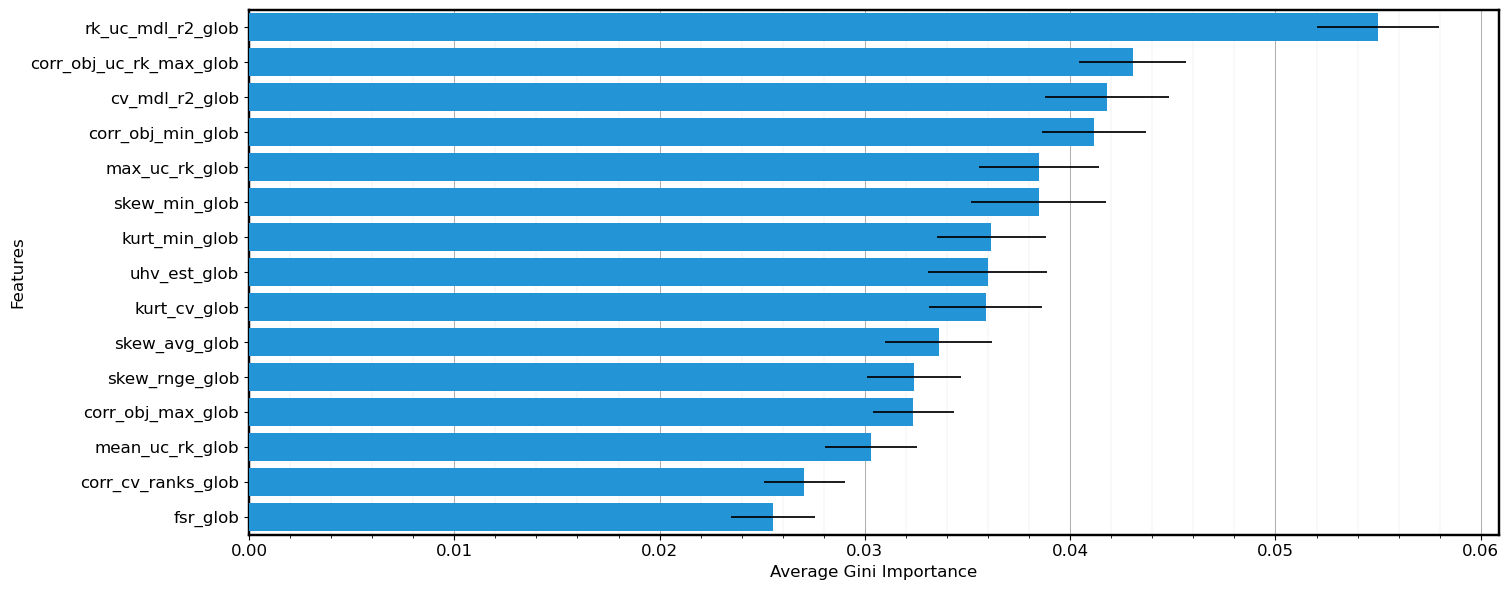

In [55]:
# Figure 42 in report.
glob_feature_imps = global_dashboard.get_feature_importances(
    classifiers=rfs, top_features=15
)


global_dashboard.plot_feature_importances(
    feature_importances_df=glob_feature_imps,

    filepath="Results/RFFeatureImportance_Global",
    show_legend=False,
)

Aerofoils are being considered for this global only feature set.
Dropped instances:
['MW13_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20', 'RWMOP20_d4']
Initial length of the dataframe: 326
Total number of dropped instances: 6
This dataframe contains 45 features.


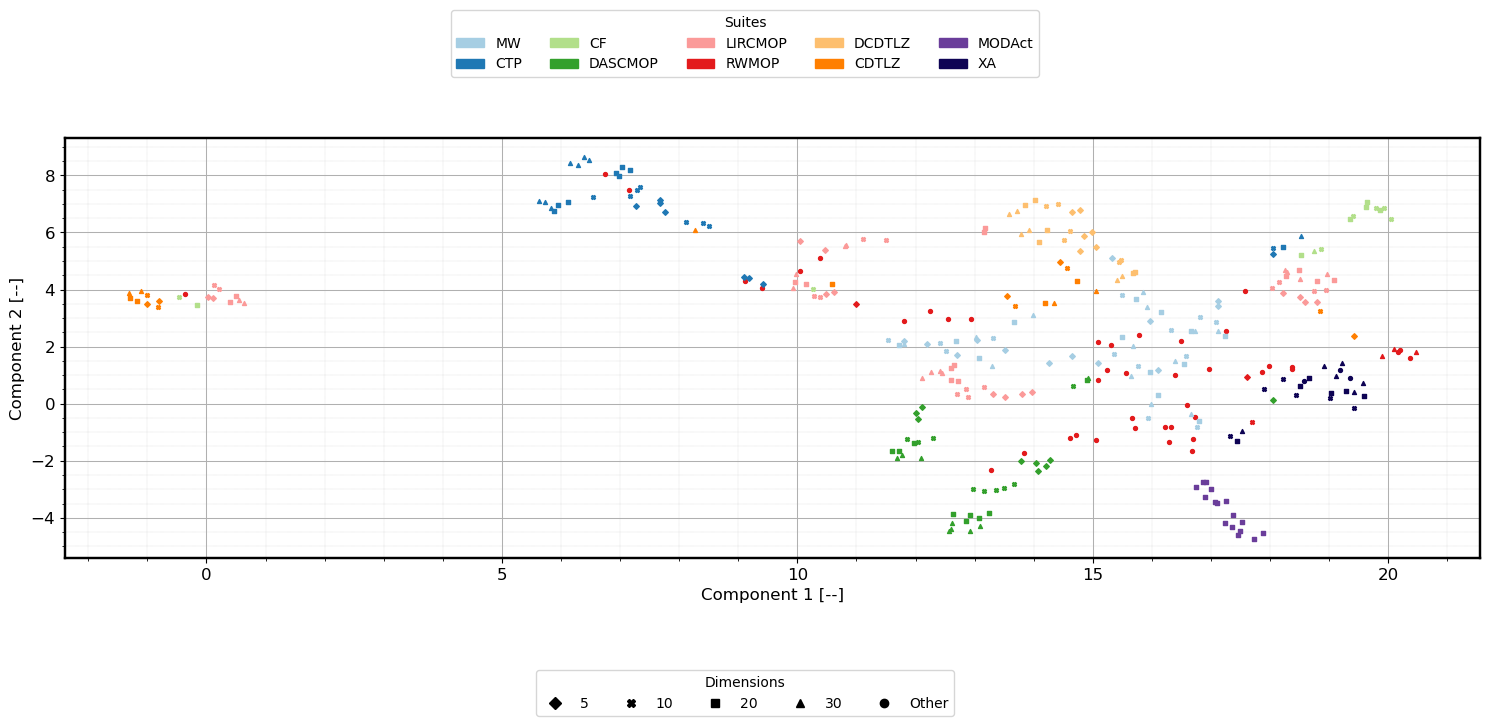

Aerofoils are being considered for this global only feature set.
Dropped instances:
['MW13_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20', 'RWMOP20_d4']
Initial length of the dataframe: 326
Total number of dropped instances: 6
This dataframe contains 45 features.


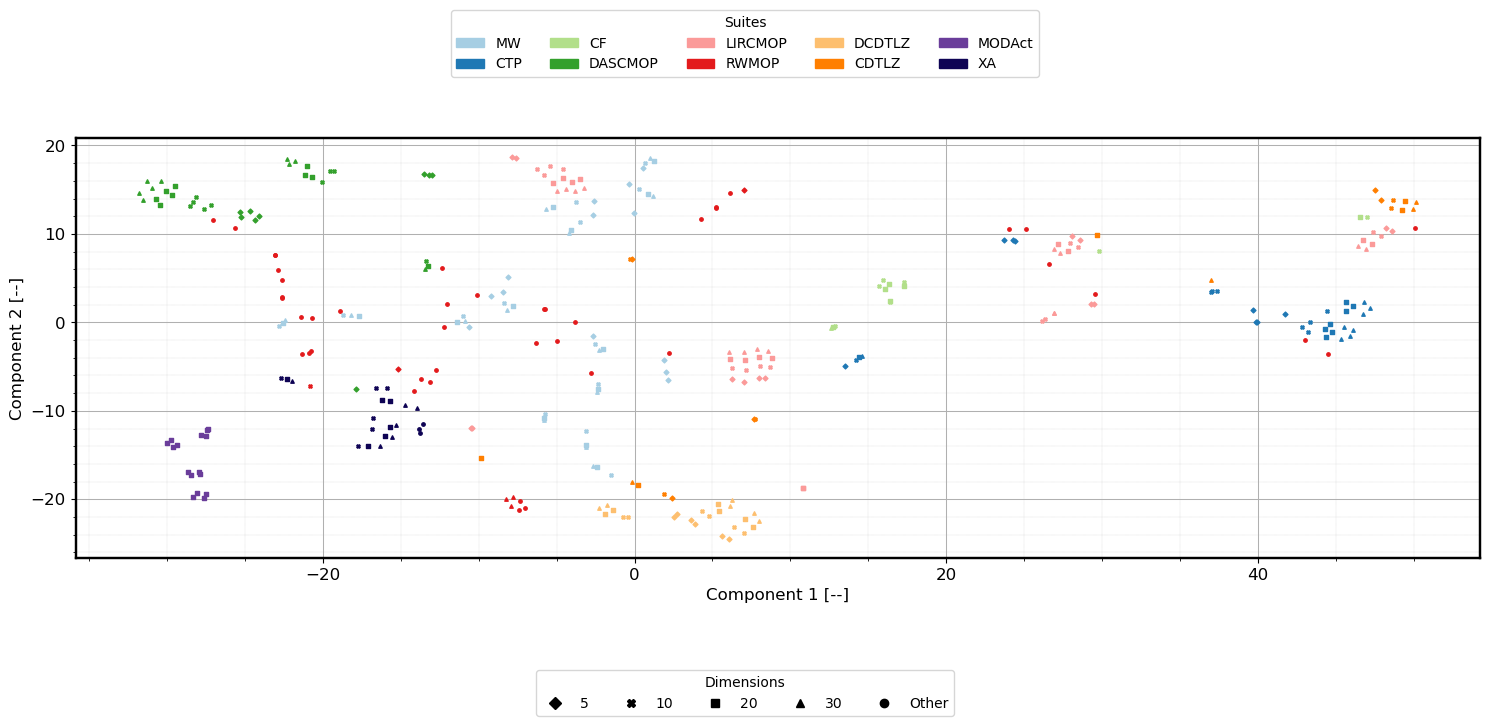

In [56]:
# The UMAP and t-SNE plots of all 45 global-only features did not make it into the report.
global_dashboard.plot_UMAP(
    ignore_aerofoils=False,
    train_with_aerofoils=True,
    filepath="Results/UMAPGlobalOnly_Aerofoils",
    random_state=30,
)

global_dashboard.plot_tSNE(
    ignore_aerofoils=False,
    filepath="Results/tSNEGlobalOnly_Aerofoils",
    perplexities=[15],
)

### Extracting top features

Now going to isolate the top global features from the set of global. We don't want to use the previous analysis since the RW/AW features may affect things.


In [57]:
global_feature_ranks = global_dashboard.rank_each_feature(drop_these_probs=None)

Completed coverage calculation.
Completed RF training.


In [58]:
global_feature_ranks.head(15)

Type  Coverage        RF  CoverageMean    RFMean  \
rk_uc_mdl_r2_glob        Global  0.859940  1.000000      0.859940  1.000000   
fsr_glob                 Global  1.000000  0.452973      1.000000  0.452973   
corr_obj_uc_rk_max_glob  Global  0.631049  0.778248      0.631049  0.778248   
corr_obj_min_glob        Global  0.632837  0.743082      0.632837  0.743082   
corr_obj_max_glob        Global  0.772635  0.579931      0.772635  0.579931   
corr_obj_cv_max_glob     Global  0.921834  0.426005      0.921834  0.426005   
cv_mdl_r2_glob           Global  0.581283  0.755470      0.581283  0.755470   
kurt_cv_glob             Global  0.574946  0.645350      0.574946  0.645350   
skew_cv_glob             Global  0.720530  0.431035      0.720530  0.431035   
uhv_est_glob             Global  0.424906  0.647074      0.424906  0.647074   
corr_cv_ranks_glob       Global  0.541855  0.481363      0.541855  0.481363   
max_uc_rk_glob           Global  0.287258  0.693402      0.287258  0.693402   
std_cv_glob              Global  0.543505  0.425096      0.543505  0.425096   
mean_cv_glob             Global  0.575040  0.348352      0.575040  0.348352   
m0_glob                  Global  0.656822  0.247611      0.656822  0.247611   

                         MeanScore  OverallRank  
rk_uc_mdl_r2_glob         0.929970          1.0  
fsr_glob                  0.726486          2.0  
corr_obj_uc_rk_max_glob   0.704648          3.0  
corr_obj_min_glob         0.687959          4.0  
corr_obj_max_glob         0.676283          5.0  
corr_obj_cv_max_glob      0.673920          6.0  
cv_mdl_r2_glob            0.668376          7.0  
kurt_cv_glob              0.610148          8.0  
skew_cv_glob              0.575783          9.0  
uhv_est_glob              0.535990         10.0  
corr_cv_ranks_glob        0.511609         11.0  
max_uc_rk_glob            0.490330         12.0  
std_cv_glob               0.484301         13.0  
mean_cv_glob              0.461696         14.0  
m0_glob                   0.452216         15.0

In [59]:
# Table 17 in report.
dashboard.convert_to_latex(

    global_feature_ranks[["RF", "Coverage", "MeanScore", "OverallRank"]],
    filename="GlobalFeatureScores",
)

LaTeX table has been successfully written to ../../rrut_thesis_report/Tables/GlobalFeatureScores.txt


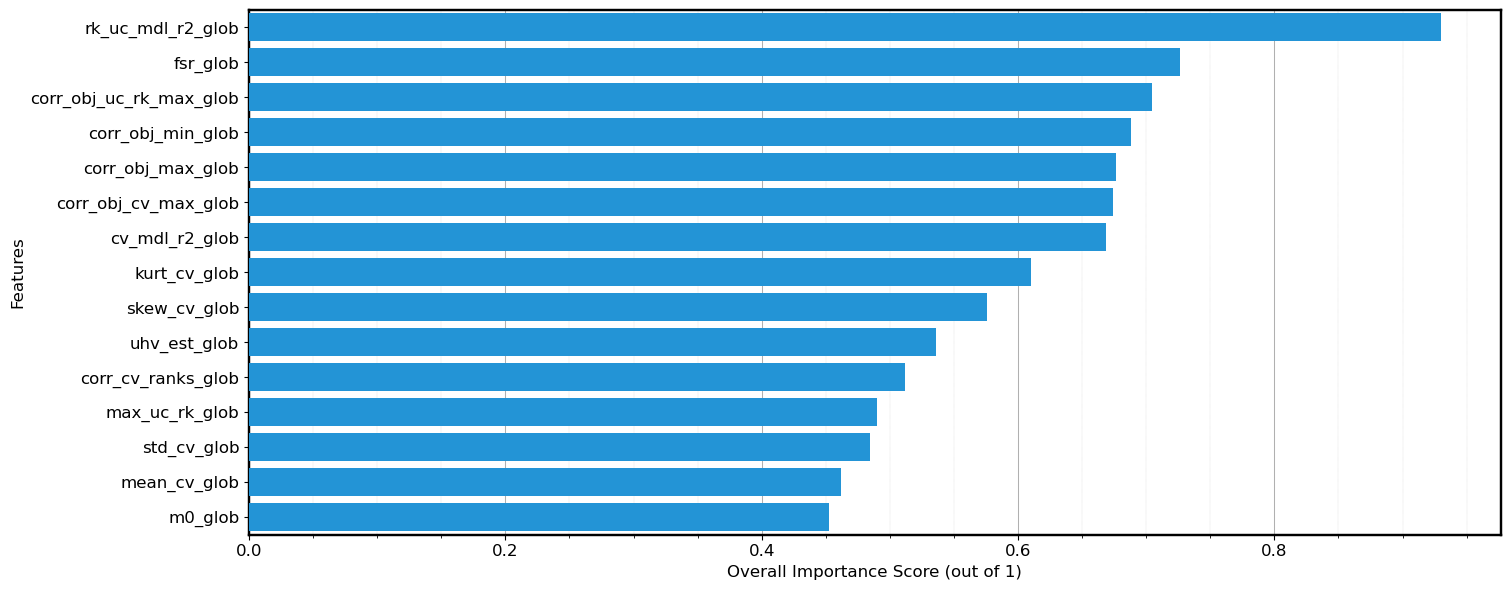

In [60]:
if "MeanScore" in global_feature_ranks.columns:
    global_feature_ranks_cleaned = global_feature_ranks.rename(
        columns={"MeanScore": "Overall Score"}
    )

# Figure 24 in report.
dashboard.plot_feature_importances(
    feature_importances_df=global_feature_ranks_cleaned.head(15),
    filepath="Results/FeatureScores_Global",
    variable_name="Overall Score",
    xlabel="Overall Importance Score (out of 1)",
    show_legend=False,
)

In [61]:
# Run sensitivity analysis
# glob_sens = global_dashboard.run_feature_selection_sensitivity_analysis(
#     non_noisy_feature_scores=global_feature_ranks,
#     run_pca=False,
#     num_samples=3,
#     noise_levels=[0.05, 0.1, 0.2, 0.5],
# )

In [62]:
# glob_sens_cleaned = glob_sens.rename(
#     index={"MeanScore": "Overall Score", "OverallRank": "Overall Rank"}
# )
# glob_sens_cleaned = glob_sens_cleaned.loc[
#     ["Coverage", "RF", "Overall Score", "Overall Rank"]
# ]

# dashboard.convert_to_latex(
#     glob_sens_cleaned,
#     filename="GlobalFeatureScores_Sens",
#     custom_format_index=False,
#     significant_figures=1,
# )

In [63]:
n_glob_features = 15
top_glob_features = global_feature_ranks.head(n_glob_features)
top_glob_features

Type  Coverage        RF  CoverageMean    RFMean  \
rk_uc_mdl_r2_glob        Global  0.859940  1.000000      0.859940  1.000000   
fsr_glob                 Global  1.000000  0.452973      1.000000  0.452973   
corr_obj_uc_rk_max_glob  Global  0.631049  0.778248      0.631049  0.778248   
corr_obj_min_glob        Global  0.632837  0.743082      0.632837  0.743082   
corr_obj_max_glob        Global  0.772635  0.579931      0.772635  0.579931   
corr_obj_cv_max_glob     Global  0.921834  0.426005      0.921834  0.426005   
cv_mdl_r2_glob           Global  0.581283  0.755470      0.581283  0.755470   
kurt_cv_glob             Global  0.574946  0.645350      0.574946  0.645350   
skew_cv_glob             Global  0.720530  0.431035      0.720530  0.431035   
uhv_est_glob             Global  0.424906  0.647074      0.424906  0.647074   
corr_cv_ranks_glob       Global  0.541855  0.481363      0.541855  0.481363   
max_uc_rk_glob           Global  0.287258  0.693402      0.287258  0.693402   
std_cv_glob              Global  0.543505  0.425096      0.543505  0.425096   
mean_cv_glob             Global  0.575040  0.348352      0.575040  0.348352   
m0_glob                  Global  0.656822  0.247611      0.656822  0.247611   

                         MeanScore  OverallRank  
rk_uc_mdl_r2_glob         0.929970          1.0  
fsr_glob                  0.726486          2.0  
corr_obj_uc_rk_max_glob   0.704648          3.0  
corr_obj_min_glob         0.687959          4.0  
corr_obj_max_glob         0.676283          5.0  
corr_obj_cv_max_glob      0.673920          6.0  
cv_mdl_r2_glob            0.668376          7.0  
kurt_cv_glob              0.610148          8.0  
skew_cv_glob              0.575783          9.0  
uhv_est_glob              0.535990         10.0  
corr_cv_ranks_glob        0.511609         11.0  
max_uc_rk_glob            0.490330         12.0  
std_cv_glob               0.484301         13.0  
mean_cv_glob              0.461696         14.0  
m0_glob                   0.452216         15.0

In [64]:
top_glob_features_list = top_glob_features.index.to_list()

glob_reduced_dash = copy.deepcopy(global_dashboard)
glob_reduced_dash.use_these_features_only(top_glob_features_list)

All specified features have been considered


Aerofoils are being considered for this global only feature set.
Dropped instances:
['MW13_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20']
Initial length of the dataframe: 326
Total number of dropped instances: 5
This dataframe contains 15 features.


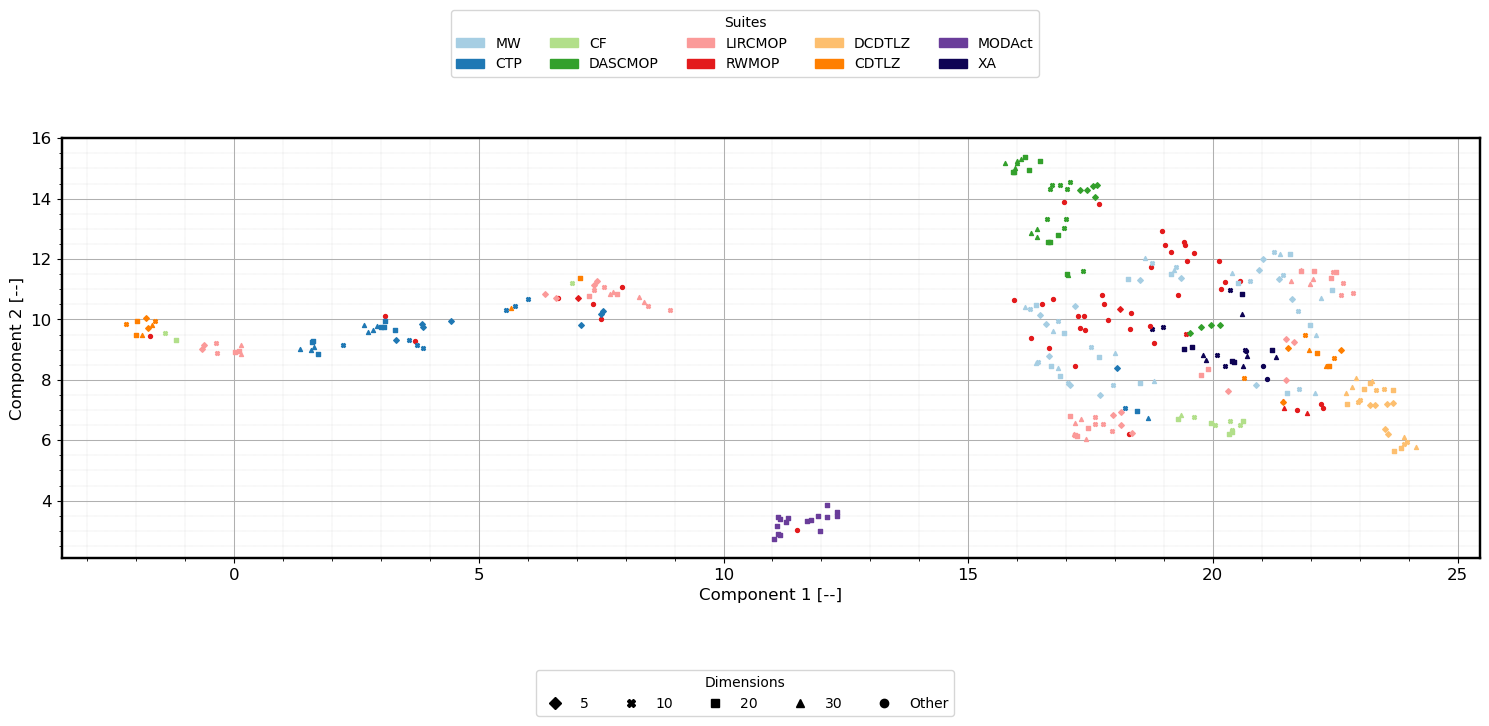

In [65]:
# Figure 25 in report.
glob_reduced_dash.plot_UMAP(
    ignore_aerofoils=False,
    train_with_aerofoils=True,
    random_state=10,
    n_neighbors=[15],

    filepath="Results/UMAPGlobal_Reduced",
)

Aerofoils are being considered for this global only feature set.
Dropped instances:
['MW13_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20']
Initial length of the dataframe: 326
Total number of dropped instances: 5
This dataframe contains 15 features.


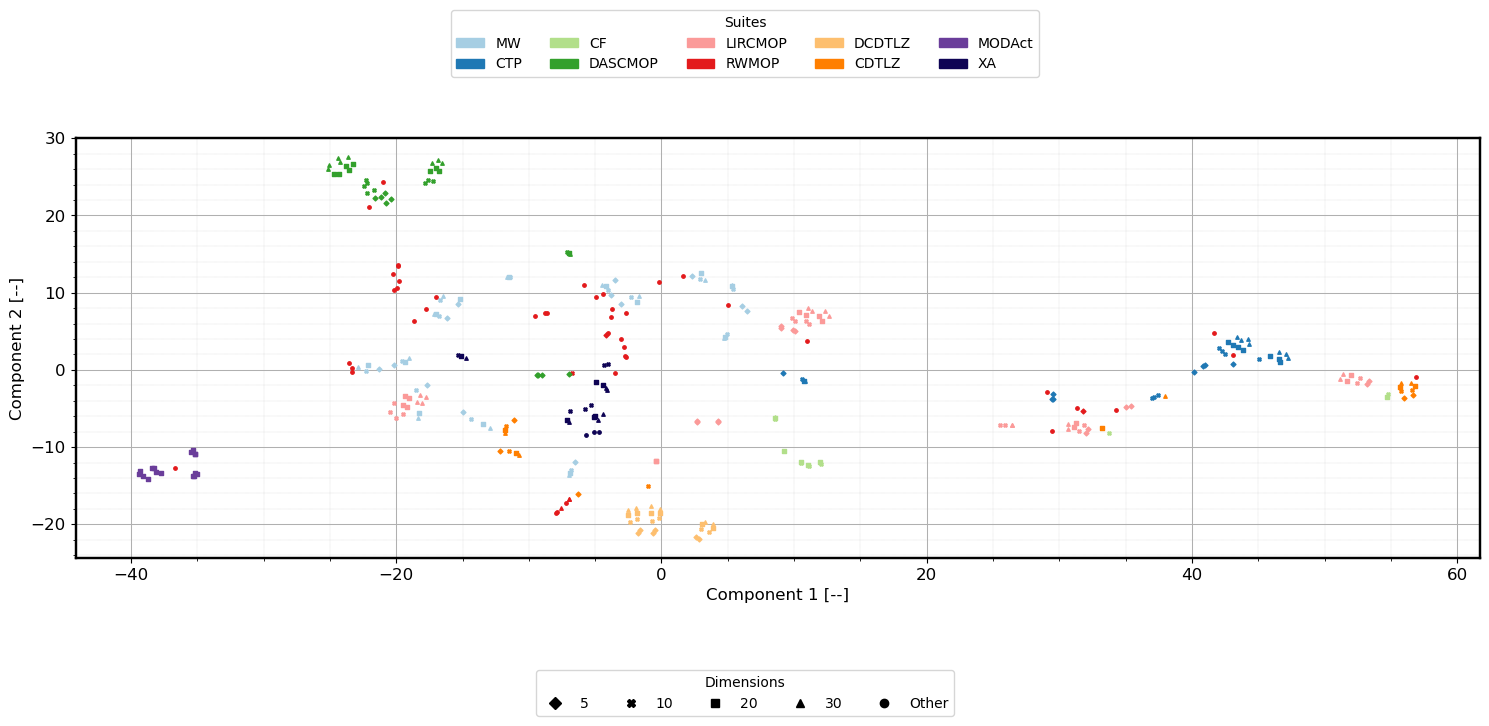

In [66]:
# Figure 41 in report.
glob_reduced_dash.plot_tSNE(
    filepath="Results/tSNEGlobal_Reduced",
    random_state=25,
    perplexities=[15],
    ignore_aerofoils=False,
)

## Random Walk Only Analysis

Steps are identical to global-only analysis. We are not interested in plotting coverage/Gini importance values though.


In [67]:
# Consider global features only.
walk_dashboard = copy.deepcopy(dashboard)
walk_dashboard.set_dashboard_analysis_type("rw")

In [68]:
top_rw_features = walk_dashboard.rank_each_feature()

Completed coverage calculation.
Completed RF training.


In [69]:
top_rw_features_list = top_rw_features.index.to_list()

rw_reduced_dash = copy.deepcopy(dashboard)
rw_reduced_dash.use_these_features_only(top_rw_features_list)

All specified features have been considered


In [70]:
top_rw_features

Type  Coverage        RF  CoverageMean    RFMean  \
uhv_ss_r1_rw             RW  1.000000  1.000000      1.000000  1.000000   
nuhv_r1_rw               RW  0.950551  0.848296      0.950551  0.848296   
dist_f_r1_rw             RW  0.681275  0.892794      0.681275  0.892794   
dist_f_dist_x_r1_rw      RW  0.669445  0.828488      0.669445  0.828488   
m0_rw                    RW  0.663125  0.828860      0.663125  0.828860   
uhvd_avg_rw              RW  0.636110  0.854092      0.636110  0.854092   
H_max_rw                 RW  0.614455  0.678241      0.614455  0.678241   
uhv_ss_avg_rw            RW  0.399335  0.865540      0.399335  0.865540   
eps05_rw                 RW  0.394222  0.729157      0.394222  0.729157   
nfronts_avg_rw           RW  0.624353  0.409920      0.624353  0.409920   
hv_ss_r1_rw              RW  0.374773  0.646989      0.374773  0.646989   
hvd_r1_rw                RW  0.245847  0.768712      0.245847  0.768712   
dist_f_avg_rw            RW  0.304032  0.674483      0.304032  0.674483   
bncv_avg_rw              RW  0.421884  0.451960      0.421884  0.451960   
sup_avg_rw               RW  0.329678  0.538492      0.329678  0.538492   
hv_ss_avg_rw             RW  0.351047  0.501911      0.351047  0.501911   
sup_r1_rw                RW  0.264640  0.584741      0.264640  0.584741   
hvd_avg_rw               RW  0.206707  0.636438      0.206707  0.636438   
nfronts_r1_rw            RW  0.353744  0.467751      0.353744  0.467751   
eps_s_rw                 RW  0.277337  0.541787      0.277337  0.541787   
nncv_r1_rw               RW  0.481365  0.315103      0.481365  0.315103   
dist_f_c_r1_rw           RW  0.345194  0.440267      0.345194  0.440267   
dist_c_avg_rw            RW  0.196416  0.578634      0.196416  0.578634   
uhvd_r1_rw               RW  0.404708  0.357495      0.404708  0.357495   
bncv_r1_rw               RW  0.432145  0.276018      0.432145  0.276018   
dist_f_c_avg_rw          RW  0.197197  0.510075      0.197197  0.510075   
ncv_r1_rw                RW  0.431495  0.263094      0.431495  0.263094   
inf_r1_rw                RW  0.200827  0.456513      0.200827  0.456513   
dist_c_r1_rw             RW  0.344577  0.203426      0.344577  0.203426   
dist_c_dist_x_avg_rw     RW  0.071046  0.364501      0.071046  0.364501   
inc_r1_rw                RW  0.198179  0.186481      0.198179  0.186481   
nrfbx_rw                 RW  0.133748  0.209198      0.133748  0.209198   
dist_f_dist_x_avg_rw     RW  0.137640  0.196823      0.137640  0.196823   
dist_f_c_dist_x_avg_rw   RW  0.073252  0.207495      0.073252  0.207495   
inf_avg_rw               RW  0.000000  0.253990      0.000000  0.253990   
inc_avg_rw               RW  0.088229  0.126726      0.088229  0.126726   
dist_x_avg_rw            RW  0.126757  0.075926      0.126757  0.075926   
dist_x_r1_rw             RW  0.163253  0.005437      0.163253  0.005437   
lnd_avg_rw               RW  0.133096  0.000000      0.133096  0.000000   

                        MeanScore  OverallRank  
uhv_ss_r1_rw             1.000000          1.0  
nuhv_r1_rw               0.899424          2.0  
dist_f_r1_rw             0.787034          3.0  
dist_f_dist_x_r1_rw      0.748967          4.0  
m0_rw                    0.745992          5.0  
uhvd_avg_rw              0.745101          6.0  
H_max_rw                 0.646348          7.0  
uhv_ss_avg_rw            0.632438          8.0  
eps05_rw                 0.561690          9.0  
nfronts_avg_rw           0.517137         10.0  
hv_ss_r1_rw              0.510881         11.0  
hvd_r1_rw                0.507279         12.0  
dist_f_avg_rw            0.489257         13.0  
bncv_avg_rw              0.436922         14.0  
sup_avg_rw               0.434085         15.0  
hv_ss_avg_rw             0.426479         16.0  
sup_r1_rw                0.424691         17.0  
hvd_avg_rw               0.421572         18.0  
nfronts_r1_rw            0.410748         19.0  
eps_s_rw                 0.409562         

# Impact of Dimension Reduction Method (section 4.4 of report)

Generate results for number of features versus trustworthiness. Recall that trustworthiness of a low-dimensional dataset is measured relative to an original high-dimensional dataset.


In [71]:
# Get reference dataset to evaluate low-dimensional embedding performance. This is the high-dimensional dataset that all low-dimensional approximations are compared to.
trust_orig_data = dashboard.get_comparison_data_for_trustworthiness()

Dropped instances:
['MW13_d5', 'CTP2_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20', 'RWMOP20_d4']
Initial length of the dataframe: 305
Total number of dropped instances: 7
This dataframe contains 92 features.


In [72]:
_, _ = dashboard.get_filtered_df_for_dimension_reduced_plot()

Dropped instances:
['MW13_d5', 'CTP2_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20', 'RWMOP20_d4']
Initial length of the dataframe: 305
Total number of dropped instances: 7
This dataframe contains 92 features.


In [73]:
# These were copied from the output of the above. Need to make sure that each analysis methods considers the same set of problems.
drop_these_probs = [
    "MW13_d5",
    "CTP2_d5",
    "MW13_d10",
    "MW13_d20",
    "MW13_d30",
    "CF2_d20",
    "RWMOP20_d4",
]

Note that the following code can take up to 2.5 minutes to run. Use less seeds to speed things up for debugging.

In [74]:
# Number of features analysis.
max_overall_features = 92
max_global_features = 45
max_rw_features = 39
num_features = [
    5,
    10,
    15,
    20,
    30,
    max_rw_features,
    max_global_features,
    70,
    max_overall_features,
]
trust_list_dimred = []
dashboards = [
    dashboard,
    global_dashboard,
    dashboard,
    global_dashboard,
    walk_dashboard,
]
names = [
    "Overall Best",
    "Global Best",
    "Overall Worst",
    "Global Worst",
    "RW Best",
]

num_seeds = 5

# Use less seeds for debugging
# num_seeds = 1

for ctr, d in enumerate(dashboards):
    
    print(f"Running UMAP for {names[ctr]} case.")

    # Assuming we alternate between overall and global only.
    if ctr in [0, 2]:
        feat_ranks = feature_ranks
    elif ctr in [4]:
        feat_ranks = top_rw_features
    else:
        feat_ranks = global_feature_ranks

    results = []

    for n in num_features:

        if n > max_global_features and ctr in [1, 3, 4]:
            continue
        elif n > max_rw_features and ctr in [4]:
            continue

        scores = []
        if ctr in [0, 1, 4]:
            # Use best features
            topfeatures = feat_ranks.head(n)
        elif ctr in [2, 3]:
            # Use worst features
            topfeatures = feat_ranks.tail(n)

        top_features_list = topfeatures.index.to_list()

        for random_state in range(num_seeds):
            dash_copy = copy.deepcopy(d)
            dash_copy.use_these_features_only(top_features_list, show_output=False)
            emb, labels = dash_copy.plot_UMAP(
                return_embedding=True,
                random_state=random_state,
                run_plotting=False,
                drop_these_probs=drop_these_probs,
                show_output=False
            )

            score = dash_copy.get_trustworthiness_score(
                embedding_results=emb, original_data=trust_orig_data
            )
            scores.append(score)

            # Store the mean and standard deviation of scores for this perplexitu

        res_dict = {
            "Number of Features": n,
            "Mean Trustworthiness Score": np.mean(scores),
            "SD": np.std(scores),
        }

        results.append(res_dict)
    trust_list_dimred.append(pd.DataFrame(results))

Running UMAP for Overall Best case.
Running UMAP for Global Best case.
Running UMAP for Overall Worst case.
Running UMAP for Global Worst case.
Running UMAP for RW Best case.


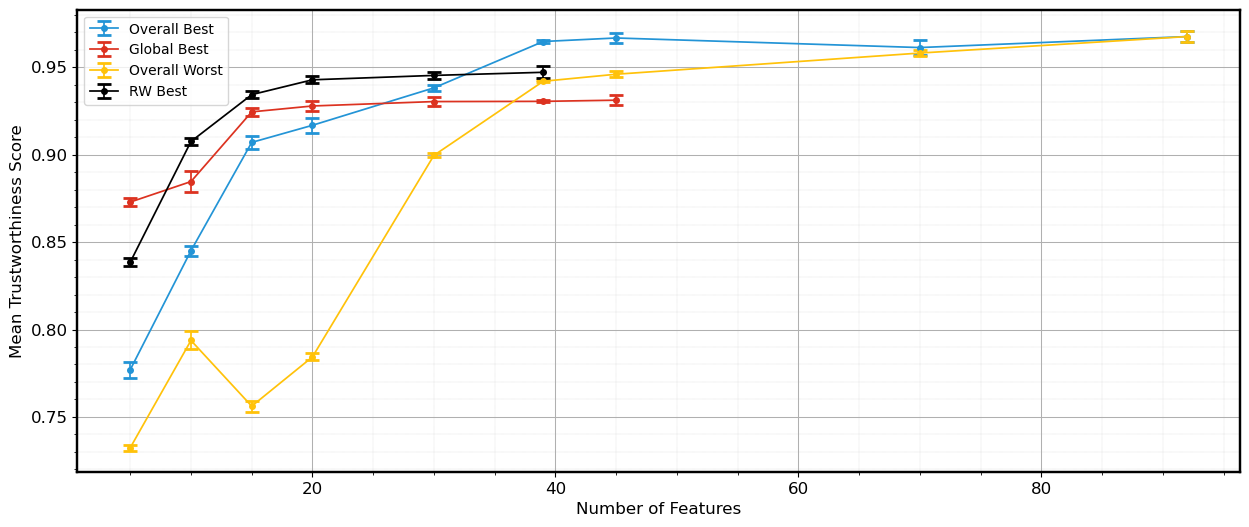

In [75]:
idx = [0, 1, 2, 4] # do not need to show global worst
results_to_plot = [trust_list_dimred[i] for i in idx]
labels = [names[i] for i in idx]

dashboard.plot_dimreduction_perf_score(
    perf_results_list=results_to_plot,
    xlabel="Number of Features",
    labels=labels,
    join_points=True,
    filepath="Results/ImpactOfDimRed_Trustworthiness",
) # Figure 23 in report.

# Sensitivity Analysis of UMAP results (section 4.6 of report)

In [76]:
# Get reference dataset to evaluate low-dimensional embedding performance. This is the high-dimensional dataset that all low-dimensional approximations are compared to.
trust_orig_data = dashboard.get_comparison_data_for_trustworthiness()

Dropped instances:
['MW13_d5', 'CTP2_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20', 'RWMOP20_d4']
Initial length of the dataframe: 305
Total number of dropped instances: 7
This dataframe contains 92 features.


## Trustworthiness as a function of noise

Show trustworthiness score versus noise scale factor for the following sets: overall, reduced overall, global, reduced global.



In [77]:
_, _ = dashboard.get_filtered_df_for_dimension_reduced_plot()

Dropped instances:
['MW13_d5', 'CTP2_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20', 'RWMOP20_d4']
Initial length of the dataframe: 305
Total number of dropped instances: 7
This dataframe contains 92 features.


In [78]:
# These were copied from the output of the above. Need to make sure that each analysis methods considers the same set of problems.
drop_these_probs = [
    "MW13_d5",
    "CTP2_d5",
    "MW13_d10",
    "MW13_d20",
    "MW13_d30",
    "CF2_d20",
    "RWMOP20_d4",
]

In [79]:
# Sensitivity analysis

# Values for full experiment.
noise_levels = [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1]
num_seeds_sens = 5

# Run simpler case for debugging.
# noise_levels = [0, 0.05]
# num_seeds_sens = 1

trust_list_sens = []
dashboards = [dashboard, dash_reduced, global_dashboard, glob_reduced_dash]

for ctr, d in enumerate(dashboards):
    print(f"Starting sensitivity analysis of dashboard {ctr+1} out of {len(dashboards)}")
    trust_results = d.run_dimreduced_sensitivity(
        method="umap",
        noise_levels=noise_levels,
        num_seeds=num_seeds_sens,
        metric="trustworthiness",
        drop_these_probs=drop_these_probs,
        orig_data=trust_orig_data,
    )
    trust_list_sens.append(trust_results)
    print(f"Completed sensitivity analysis of dashboard {ctr+1} out of {len(dashboards)}\n")

Starting sensitivity analysis of dashboard 1 out of 4
Completed feature ranking for noise level 1 out of 8
Completed feature ranking for noise level 2 out of 8
Completed feature ranking for noise level 3 out of 8
Completed feature ranking for noise level 4 out of 8
Completed feature ranking for noise level 5 out of 8
Completed feature ranking for noise level 6 out of 8
Completed feature ranking for noise level 7 out of 8
Completed feature ranking for noise level 8 out of 8
Completed sensitivity analysis of dashboard 1 out of 4

Starting sensitivity analysis of dashboard 2 out of 4
Completed feature ranking for noise level 1 out of 8
Completed feature ranking for noise level 2 out of 8
Completed feature ranking for noise level 3 out of 8
Completed feature ranking for noise level 4 out of 8
Completed feature ranking for noise level 5 out of 8
Completed feature ranking for noise level 6 out of 8
Completed feature ranking for noise level 7 out of 8
Completed feature ranking for noise level

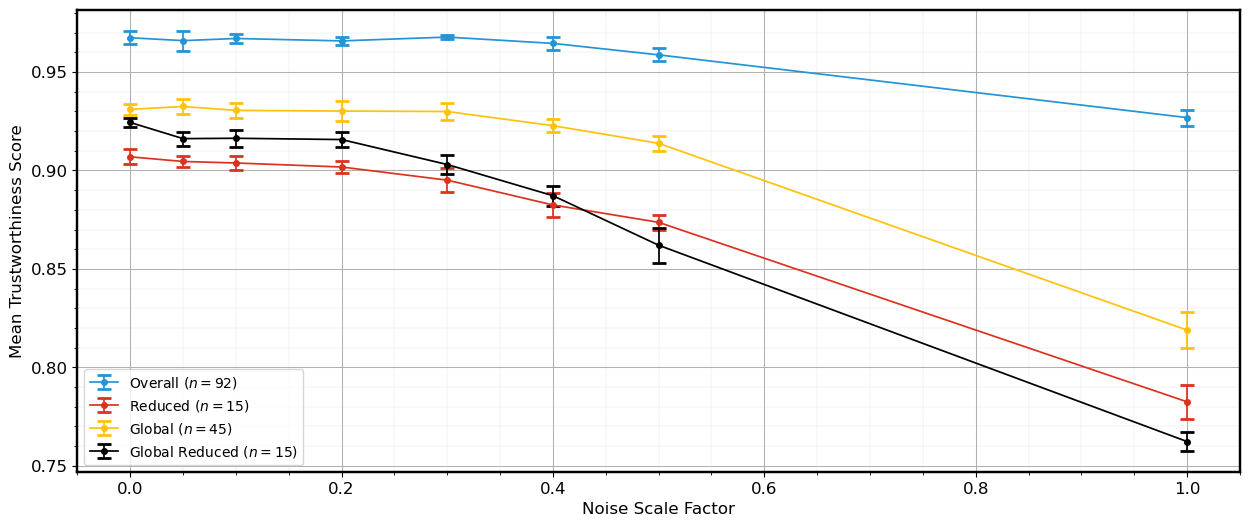

In [80]:
dashboard.plot_dimreduction_perf_score(
    perf_results_list=trust_list_sens,
    xlabel="Noise Scale Factor",
    labels=[
        r"Overall ($n=92$)",
        r"Reduced ($n=15$)",
        r"Global ($n=45$)",
        r"Global Reduced ($n=15$)",
    ],
    filepath="Results/UMAPSensitivity_TrustworthinessScore",
    join_points=True,
)  # Figure 26 in report.

Aerofoils are being ignored for analysis type: all.
Dropped instances:
['MW13_d5', 'CTP2_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20', 'RWMOP20_d4']
Initial length of the dataframe: 305
Total number of dropped instances: 7
This dataframe contains 92 features.


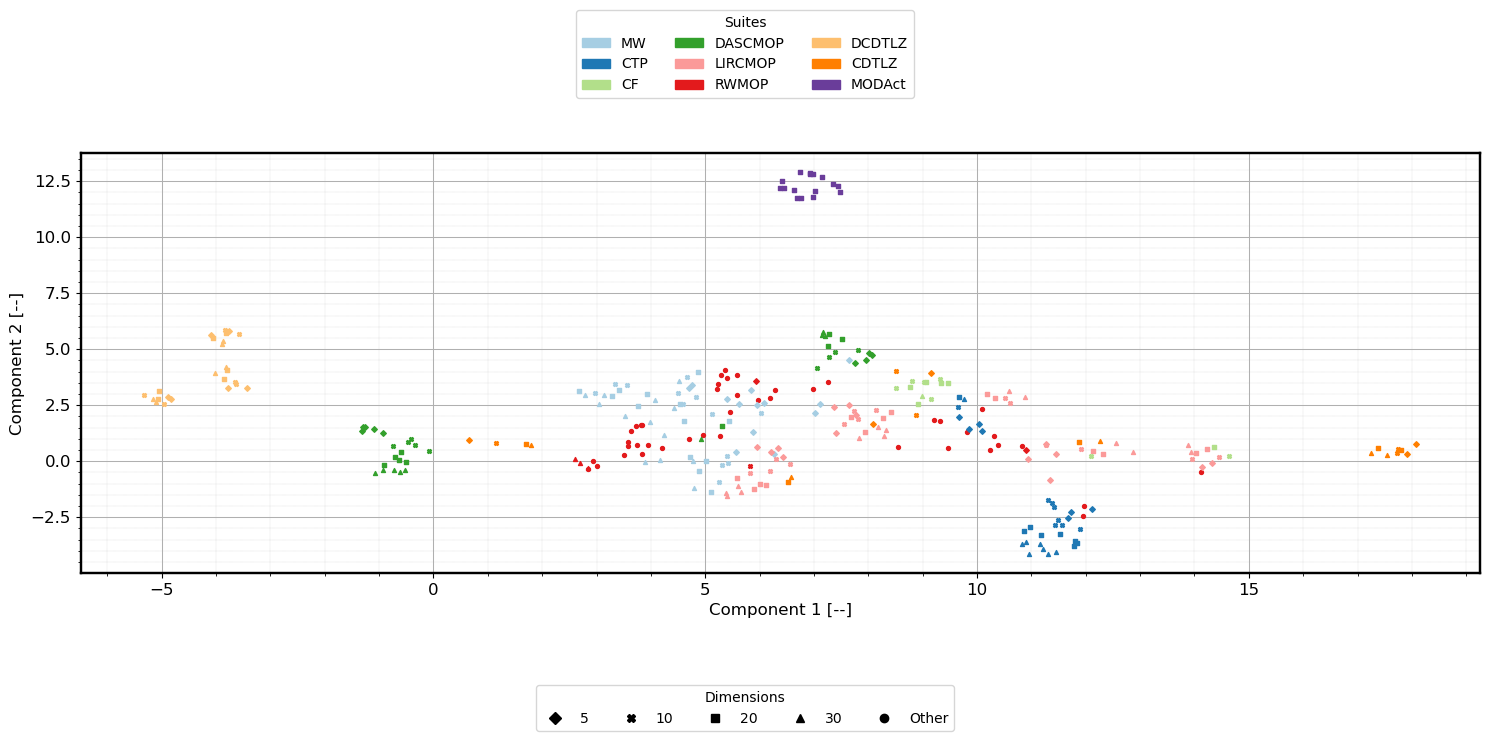

Aerofoils are being ignored for analysis type: all.
Dropped instances:
['MW13_d5', 'CTP2_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20', 'RWMOP20_d4']
Initial length of the dataframe: 305
Total number of dropped instances: 7
This dataframe contains 92 features.


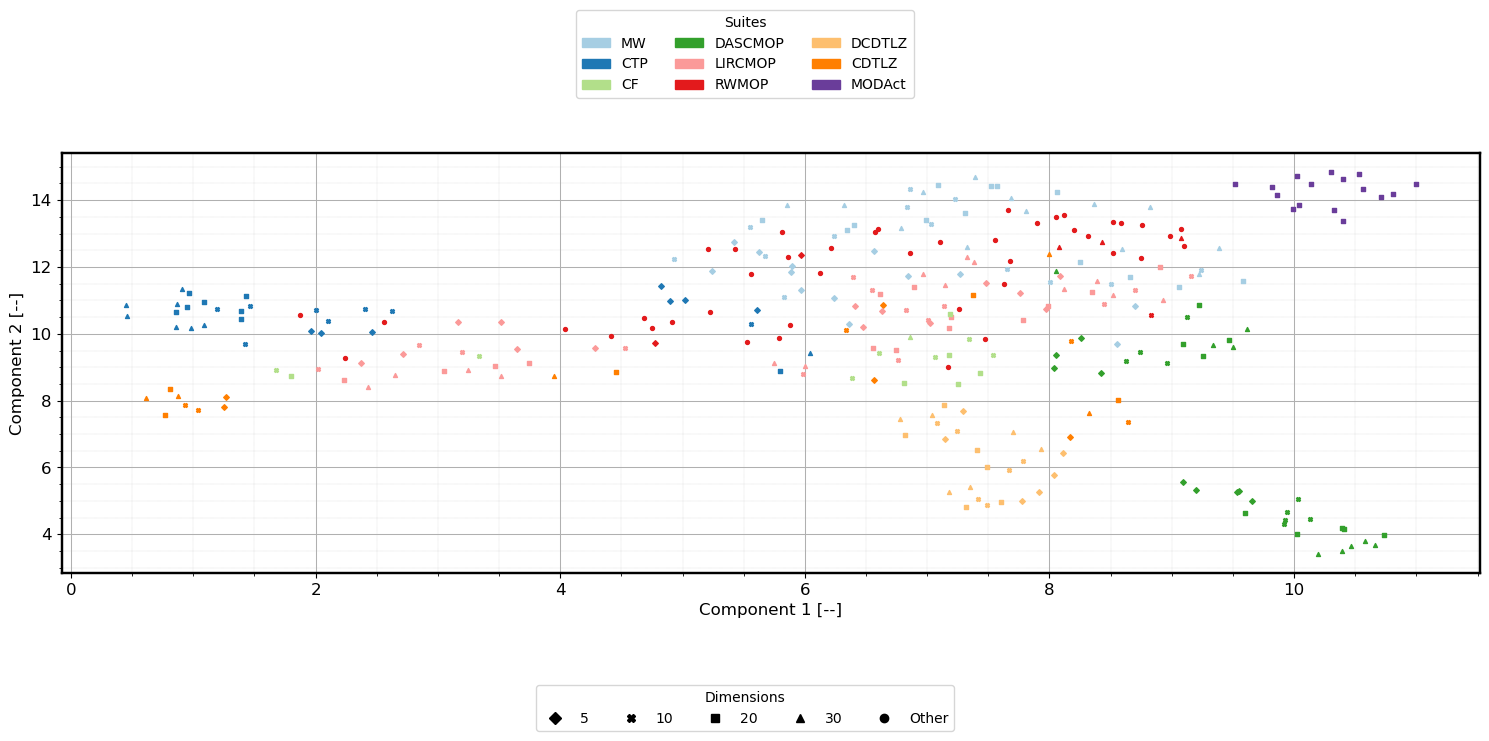

In [81]:
noise_levels = [0.5, 1]
for n in noise_levels:
    dashboard.plot_UMAP(
        n_neighbors=[10],
        filepath=f"Results/UMAPOverall_Noise={n}",
        random_state=45,
        run_sensitivity_analysis=True,
        noise_scale_factor=n,
    )
# Figure 44 in report.

Aerofoils are being considered for this global only feature set.
Dropped instances:
['MW13_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20']
Initial length of the dataframe: 326
Total number of dropped instances: 5
This dataframe contains 15 features.


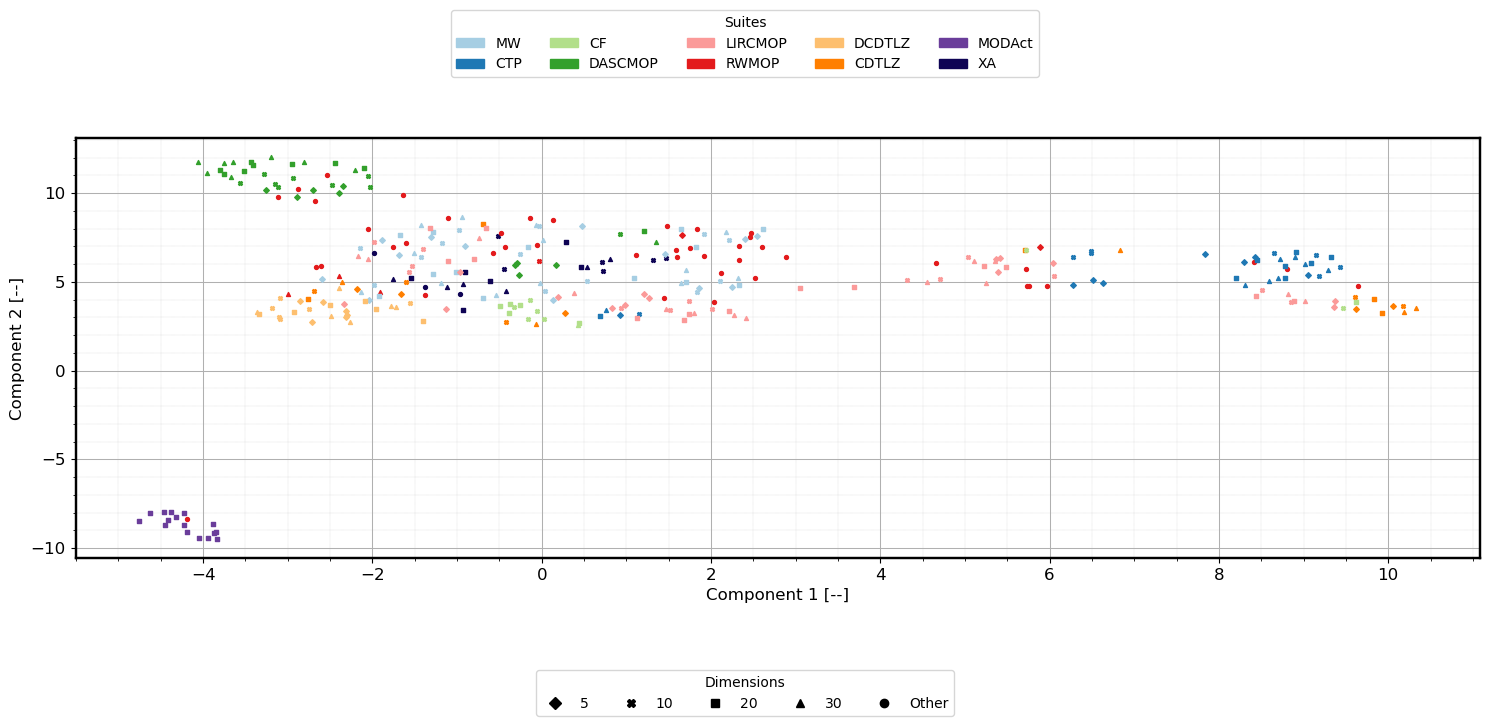

Aerofoils are being considered for this global only feature set.
Dropped instances:
['MW13_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20']
Initial length of the dataframe: 326
Total number of dropped instances: 5
This dataframe contains 15 features.


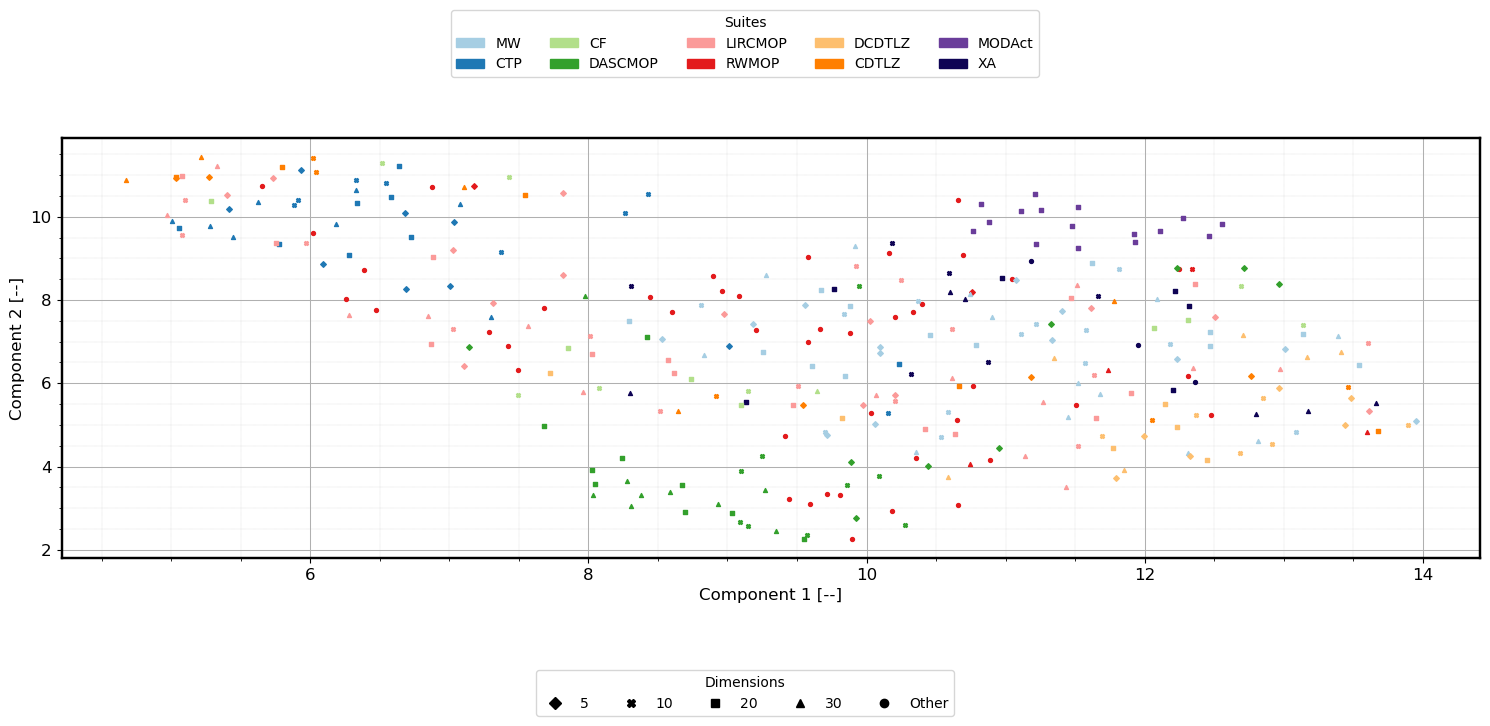

In [82]:
noise_levels = [0.5, 1]

for n in noise_levels:
    glob_reduced_dash.plot_UMAP(
        n_neighbors=[10],
        filepath=f"Results/UMAPGlobalReduced_Noise={n}",
        random_state=45,
        run_sensitivity_analysis=True,
        ignore_aerofoils=False,
        train_with_aerofoils=True,
        noise_scale_factor=n,
    )

# Figure 45 in report.

## Feature rank deviation as a function of noise


## Overall (top half of table 6)


In [83]:
feature_ranks_sens = dashboard.rank_each_feature()

Completed coverage calculation.
Completed RF training.


In [84]:
feature_ranks_sens

Type  Coverage        RF  CoverageMean    RFMean  \
rk_uc_mdl_r2_glob        Global  0.805541  0.956943      0.805541  0.956943   
uhv_ss_r1_rw                 RW  1.000000  0.626991      1.000000  0.626991   
corr_obj_uc_rk_max_glob  Global  0.593640  1.000000      0.593640  1.000000   
nuhv_r1_rw                   RW  0.954873  0.526328      0.954873  0.526328   
corr_obj_min_glob        Global  0.595568  0.881345      0.595568  0.881345   
...                         ...       ...       ...           ...       ...   
lnd_avg_aw                   AW  0.191323  0.047745      0.191323  0.047745   
min_cv_glob              Global  0.198613  0.038333      0.198613  0.038333   
po_n_glob                Global  0.047115  0.138883      0.047115  0.138883   
corr_obj_uc_rk_min_glob  Global  0.113018  0.000880      0.113018  0.000880   
cv_range_coeff_glob      Global  0.000000  0.000000      0.000000  0.000000   

                         MeanScore  OverallRank  
rk_uc_mdl_r2_glob         0.881242          1.0  
uhv_ss_r1_rw              0.813495          2.0  
corr_obj_uc_rk_max_glob   0.796820          3.0  
nuhv_r1_rw                0.740600          4.0  
corr_obj_min_glob         0.738456          5.0  
...                            ...          ...  
lnd_avg_aw                0.119534         88.0  
min_cv_glob               0.118473         89.0  
po_n_glob                 0.092999         90.0  
corr_obj_uc_rk_min_glob   0.056949         91.0  
cv_range_coeff_glob       0.000000         92.0  

[92 rows x 7 columns]

In [85]:
# Run sensitivity analysis for overall features.

# Values for full experiment.
noise_levels = [0.05, 0.1, 0.2, 0.5]
num_seeds_sens = 3

# Run simpler case for debugging.
# noise_levels = [0, 0.05]
# num_seeds_sens = 1


sens_reduced = dashboard.run_feature_selection_sensitivity_analysis(
    non_noisy_feature_scores=feature_ranks_sens,
    run_pca=False,
    num_samples=num_seeds_sens,
    noise_levels=noise_levels,
)

In [86]:
sens_reduced

Noise 0.05  \
             Average Deviation (%) for SD = 0.05   
Coverage                                2.122159   
RF                                     14.638032   
CoverageMean                            2.122159   
RFMean                                 14.638032   
MeanScore                               7.718637   
OverallRank                             3.702899   

                                      Noise 0.1  \
             Average Deviation (%) for SD = 0.1   
Coverage                               3.993780   
RF                                    19.160065   
CoverageMean                           3.993780   
RFMean                                19.160065   
MeanScore                             10.413739   
OverallRank                            4.927536   

                                      Noise 0.2  \
             Average Deviation (%) for SD = 0.2   
Coverage                               6.977152   
RF                                    25.686846   
CoverageMean                           6.977152   
RFMean                                25.686846   
MeanScore                             13.954506   
OverallRank                            6.855072   

                                      Noise 0.5  
             Average Deviation (%) for SD = 0.5  
Coverage                              12.279234  
RF                                    32.510538  
CoverageMean                          12.279234  
RFMean                                32.510538  
MeanScore                             19.262386  
OverallRank                            9.492754

In [87]:
sens_cleaned = sens_reduced.rename(
    index={
        "MeanScore": "Overall Score (\%)",
        "OverallRank": "Overall Rank (out of 92)",
        "RF": "RF (\%)",
        "Coverage": "Coverage (\%)",
    }
)
sens_cleaned = sens_cleaned.loc[
    ["Coverage (\%)", "RF (\%)", "Overall Score (\%)", "Overall Rank (out of 92)"]
]
sens_cleaned

Noise 0.05  \
                         Average Deviation (%) for SD = 0.05   
Coverage (\%)                                       2.122159   
RF (\%)                                            14.638032   
Overall Score (\%)                                  7.718637   
Overall Rank (out of 92)                            3.702899   

                                                  Noise 0.1  \
                         Average Deviation (%) for SD = 0.1   
Coverage (\%)                                      3.993780   
RF (\%)                                           19.160065   
Overall Score (\%)                                10.413739   
Overall Rank (out of 92)                           4.927536   

                                                  Noise 0.2  \
                         Average Deviation (%) for SD = 0.2   
Coverage (\%)                                      6.977152   
RF (\%)                                           25.686846   
Overall Score (\%)                                13.954506   
Overall Rank (out of 92)                           6.855072   

                                                  Noise 0.5  
                         Average Deviation (%) for SD = 0.5  
Coverage (\%)                                     12.279234  
RF (\%)                                           32.510538  
Overall Score (\%)                                19.262386  
Overall Rank (out of 92)                           9.492754

In [91]:
# Top half of Table 6 in report.
dashboard.convert_to_latex(
    df=sens_cleaned,
    filename="OverallFeatureScores_Sens",
    custom_format_index=False,
    significant_figures=1,
)

LaTeX table has been successfully written to ../../rrut_thesis_report/Tables/OverallFeatureScores_Sens.txt


## Global (bottom half of table 6)


In [92]:
global_feature_ranks_sens = global_dashboard.rank_each_feature()

Completed coverage calculation.
Completed RF training.


In [93]:
# Run sensitivity analysis for global only.

# Values for full experiment.
noise_levels = [0.05, 0.1, 0.2, 0.5]
num_seeds_sens = 3

# Run simpler case for debugging.
# noise_levels = [0, 0.05]
# num_seeds_sens = 1

sens_glob = global_dashboard.run_feature_selection_sensitivity_analysis(
    non_noisy_feature_scores=global_feature_ranks_sens,
    run_pca=False,
    num_samples=num_seeds_sens,
    noise_levels=noise_levels,
)

In [94]:
sens_glob

Noise 0.05  \
             Average Deviation (%) for SD = 0.05   
Coverage                                3.926693   
RF                                     17.635142   
CoverageMean                            3.926693   
RFMean                                 17.635142   
MeanScore                              11.205122   
OverallRank                             2.488889   

                                      Noise 0.1  \
             Average Deviation (%) for SD = 0.1   
Coverage                               6.135685   
RF                                    22.764097   
CoverageMean                           6.135685   
RFMean                                22.764097   
MeanScore                             14.024563   
OverallRank                            3.392593   

                                      Noise 0.2  \
             Average Deviation (%) for SD = 0.2   
Coverage                              10.026813   
RF                                    28.755738   
CoverageMean                          10.026813   
RFMean                                28.755738   
MeanScore                             18.262533   
OverallRank                            4.029630   

                                      Noise 0.5  
             Average Deviation (%) for SD = 0.5  
Coverage                              14.926287  
RF                                    38.010880  
CoverageMean                          14.926287  
RFMean                                38.010880  
MeanScore                             24.405479  
OverallRank                            5.185185

In [95]:
sens_cleaned = sens_glob.rename(
    index={
        "MeanScore": "Overall Score (\%)",
        "OverallRank": "Overall Rank (out of 45)",
        "RF": "RF (\%)",
        "Coverage": "Coverage (\%)",
    }
)
sens_cleaned = sens_cleaned.loc[
    ["Coverage (\%)", "RF (\%)", "Overall Score (\%)", "Overall Rank (out of 45)"]
]
sens_cleaned

Noise 0.05  \
                         Average Deviation (%) for SD = 0.05   
Coverage (\%)                                       3.926693   
RF (\%)                                            17.635142   
Overall Score (\%)                                 11.205122   
Overall Rank (out of 45)                            2.488889   

                                                  Noise 0.1  \
                         Average Deviation (%) for SD = 0.1   
Coverage (\%)                                      6.135685   
RF (\%)                                           22.764097   
Overall Score (\%)                                14.024563   
Overall Rank (out of 45)                           3.392593   

                                                  Noise 0.2  \
                         Average Deviation (%) for SD = 0.2   
Coverage (\%)                                     10.026813   
RF (\%)                                           28.755738   
Overall Score (\%)                                18.262533   
Overall Rank (out of 45)                           4.029630   

                                                  Noise 0.5  
                         Average Deviation (%) for SD = 0.5  
Coverage (\%)                                     14.926287  
RF (\%)                                           38.010880  
Overall Score (\%)                                24.405479  
Overall Rank (out of 45)                           5.185185

In [96]:
# Bottom half of Table 6 in report.
dashboard.convert_to_latex(
    sens_cleaned,
    filename="GlobalFeatureScores_Sens",
    custom_format_index=False,
    significant_figures=1,
)

LaTeX table has been successfully written to ../../rrut_thesis_report/Tables/GlobalFeatureScores_Sens.txt


# Literature Comparison (section 4.7 of report)

The following papers ranked their features relative to an algorithm performance predictive model:

- Vodopija2022
- Alsouly2022
- Liefooghe2021

Will see how well these features describe the dataset I have.


In [97]:
def rank_literature_features(features, orig_dash):
    dash = copy.deepcopy(orig_dash)
    dash.use_these_features_only(
        features_to_keep=features, use_pre_ignored=False
    )
    dash.ignore_ps_pf_features()
    
    # Look at how these ranked in our study.
    ranks = feature_ranks.loc[
        [f for f in features if f in feature_ranks.index]
    ]
    return dash, ranks

### Alsouly2022

Looked at their top 13 features that they considered for ISA (ignoring ps_dist_iqr which we do not evaluate).


In [98]:
alsouly_features = [
    "corr_cv_ranks_glob",  # corr_cf
    "rk_uc_mdl_r2_glob",  # f_mdl_r2
    "dist_c_corr_glob",
    "min_cv_glob",
    "bhv_avg_rw",
    "skew_rnge_glob",
    "piz_ob_min_glob",
    "dist_c_dist_x_avg_rw",
    "cpo_upo_n_glob",
    "cv_range_coeff_glob",
    "corr_obj_min_glob",  # corr obj
    "dist_f_dist_x_avg_rw",
    "cv_mdl_r2_glob",
]
alsouly_dash, alsouly_ranks = rank_literature_features(features=alsouly_features, orig_dash=dashboard)

All specified features have been considered


Aerofoils are being ignored for analysis type: all.
Dropped instances:
['CTP2_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'RWMOP20_d4']
Initial length of the dataframe: 305
Total number of dropped instances: 5
This dataframe contains 13 features.


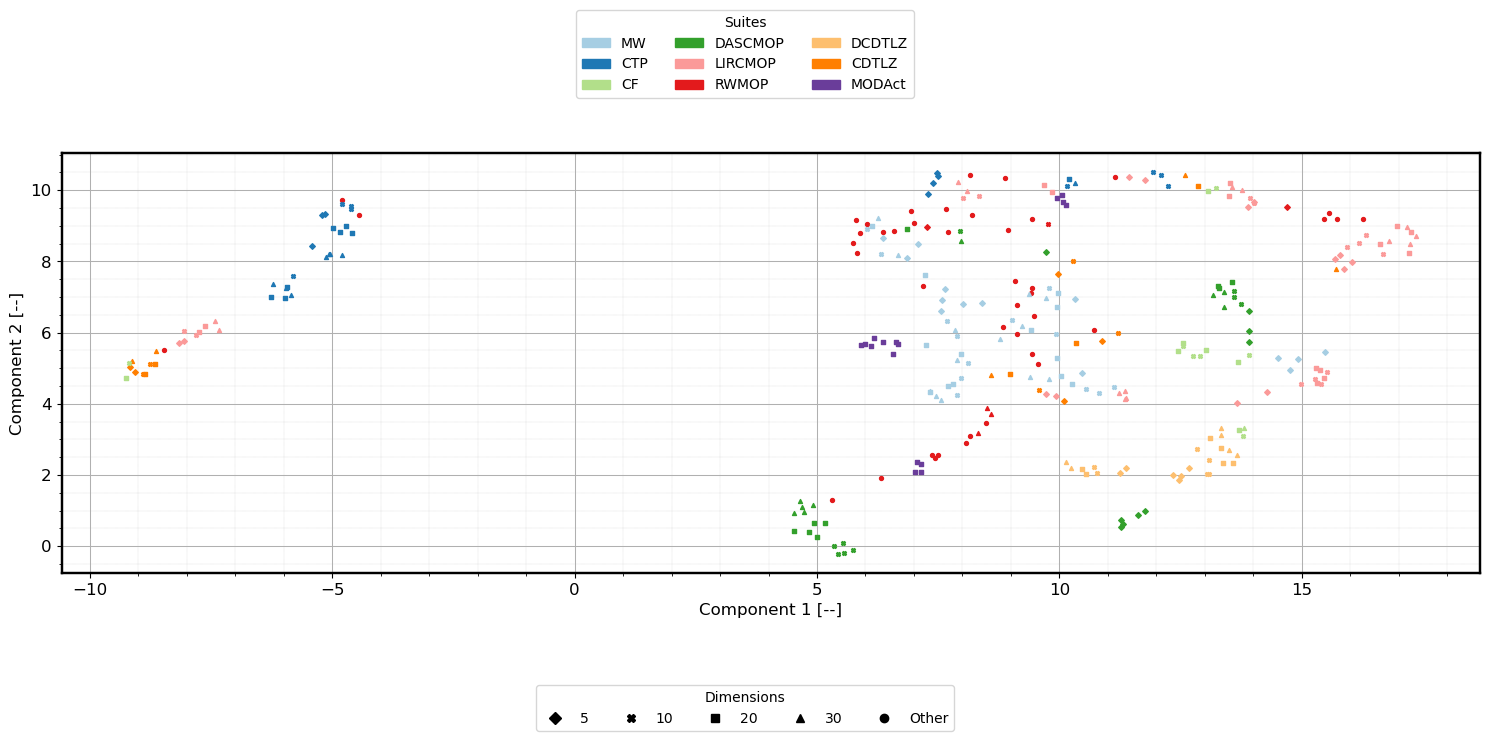

In [99]:
# Figure 37 in report
alsouly_dash.plot_UMAP(filepath="Results/UMAP_Alsouly")

### Vodopija2022

Looked at all features that we replicated. Note that some features requiring clustering from the Vodopija paper were not implemented.


In [100]:
# Will consider all Vodopija features that we replicated.
vodopija_features = [
    "m0_glob",
    "eps_s_glob",
    "H_max_glob",
    "m0_rw",  # technically Vodopija only did for global
    "eps_s_rw",  # technically Vodopija only did for global
    "H_max_rw",  # technically Vodopija only did for global
    "fsr_glob",
    "corr_obj_min_glob",
    "corr_obj_max_glob",
    "length_avg_aw",  # proxy for size of basins
    "nrfbx_rw",  # mean ratio of feasible boundary crossings
]
vodopija_dash, vodopija_ranks = rank_literature_features(features=vodopija_features, orig_dash=dashboard)

All specified features have been considered


Aerofoils are being ignored for analysis type: all.
Dropped instances:
[]
Initial length of the dataframe: 305
Total number of dropped instances: 0
This dataframe contains 11 features.


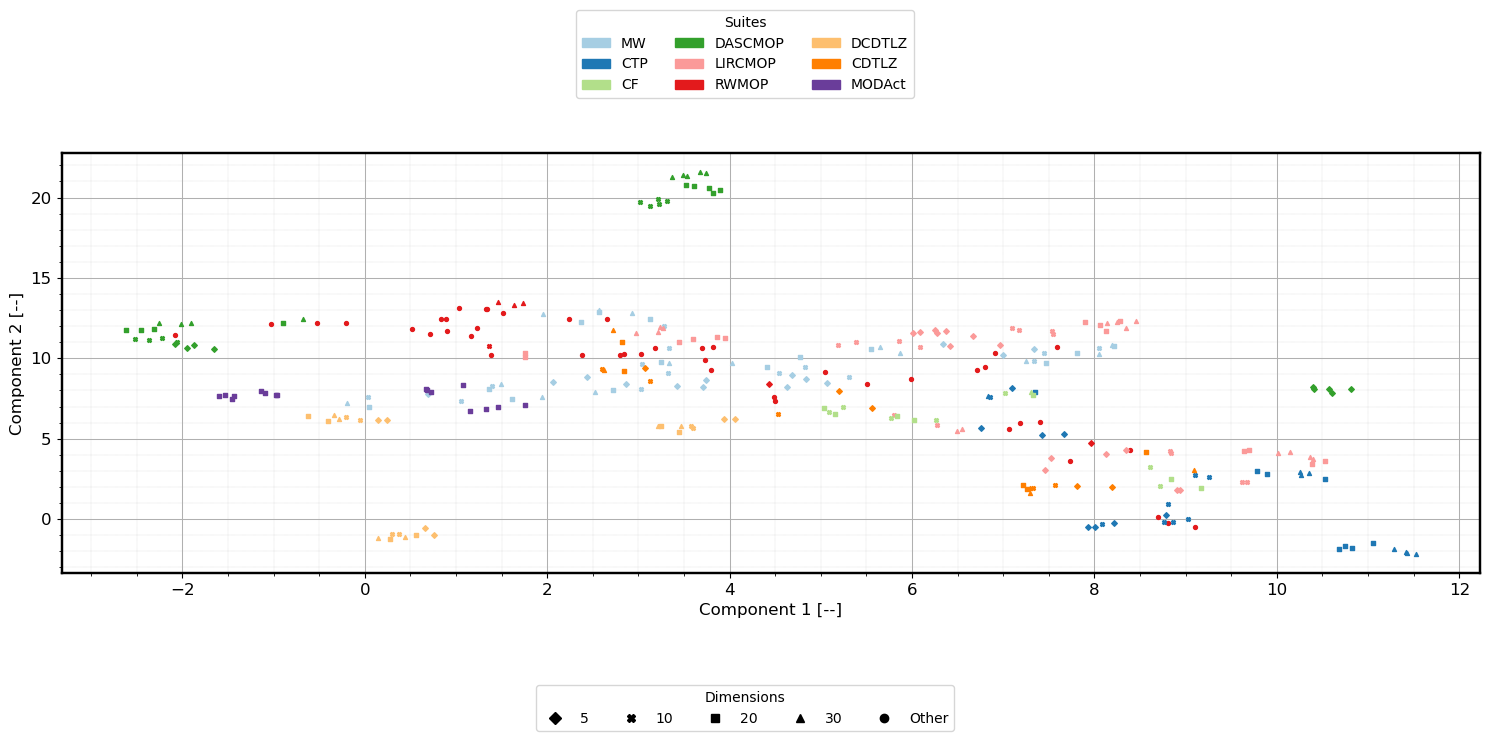

In [101]:
# Figure 38 in report.
vodopija_dash.plot_UMAP(filepath="Results/UMAP_Vodopija")

### Lifeooghe2021

Looked at their top most important features for the three algorithm selection models. They considered unconstrained MOPs only, so we expect their features to not be as useful for distinguishing between CMOPs.


In [102]:
liefooghe_features = [
    "dist_f_avg_rw",  # they call this dist_f_avg_neig
    "dist_f_dist_x_avg_rw",  # they call this dist_f_dist_x_avg_neig
    "uhv_ss_avg_rw",  # they call this hv_avg_neig
    "hvd_r1_rw",  # called hv_corr
    "nhv_avg_rw",
    "nhv_r1_rw",
    "hv_est_glob",  # called hv
    "hv_ss_r1_rw",  # called hv_cor_neig
    "length_avg_aw",  # called eval_aws
    "sup_r1_rw",  # called sup_corr_neig
    "inc_avg_rw",
]
liefooghe_dash, liefooghe_ranks = rank_literature_features(features=liefooghe_features, orig_dash=dashboard)

All specified features have been considered


Aerofoils are being ignored for analysis type: all.
Dropped instances:
[]
Initial length of the dataframe: 305
Total number of dropped instances: 0
This dataframe contains 11 features.


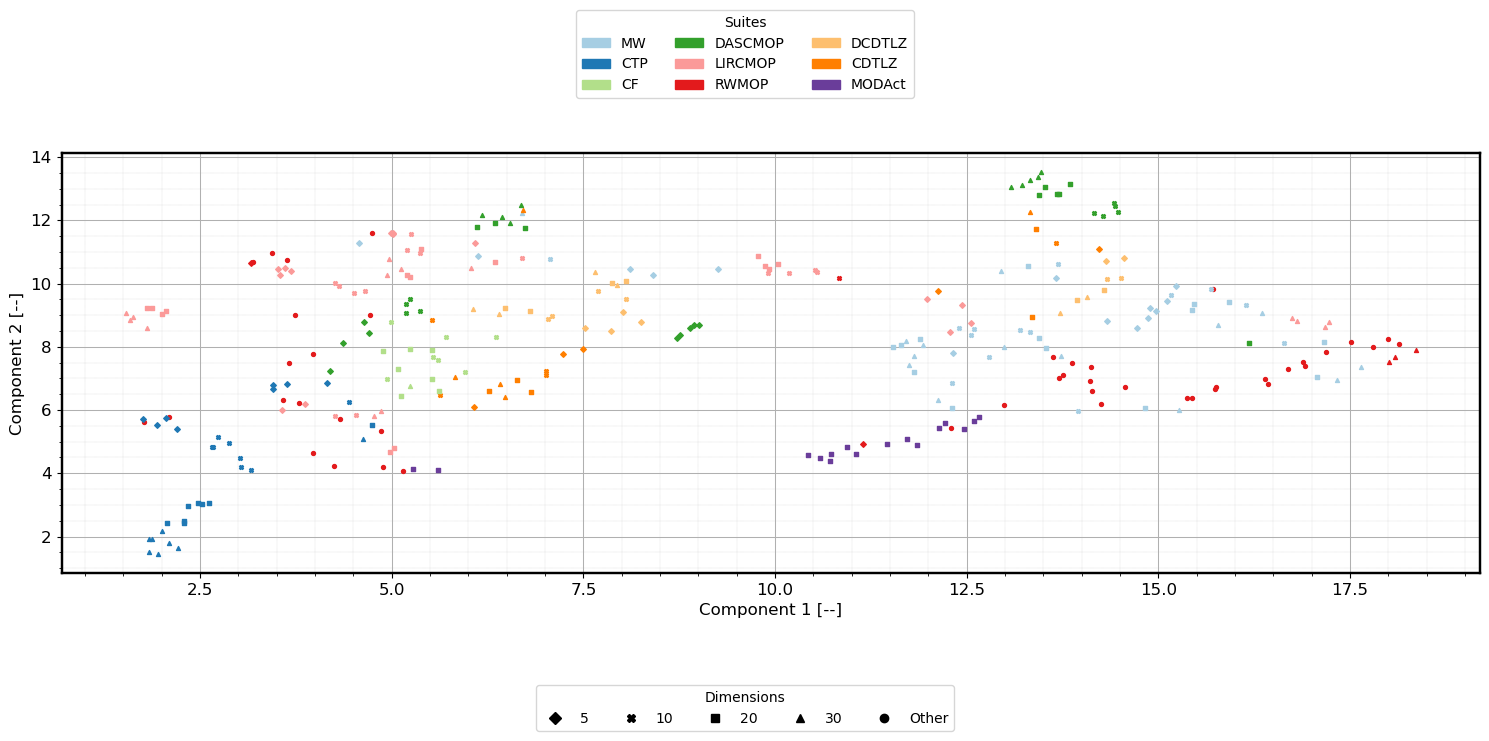

In [103]:
liefooghe_dash.plot_UMAP(filepath="Results/UMAP_Liefooghe")

### Novel feature set

We will compare the literature results to the results from our novel process.

In [104]:
# Recompute best features on the reduced set of problems. The same problems are automatically removed from the previous 
dash_less_probs = copy.deepcopy(dashboard)
overall_feat_ranks_less_probs = dash_less_probs.rank_each_feature(
    drop_these_probs=drop_these_probs
)

Completed coverage calculation.
Completed RF training.


In [105]:
overall_feat_ranks_less_probs

Type  Coverage        RF  CoverageMean    RFMean  \
rk_uc_mdl_r2_glob        Global  0.805541  0.956943      0.805541  0.956943   
uhv_ss_r1_rw                 RW  1.000000  0.626991      1.000000  0.626991   
corr_obj_uc_rk_max_glob  Global  0.593640  1.000000      0.593640  1.000000   
nuhv_r1_rw                   RW  0.954873  0.526328      0.954873  0.526328   
corr_obj_min_glob        Global  0.595568  0.881345      0.595568  0.881345   
...                         ...       ...       ...           ...       ...   
lnd_avg_aw                   AW  0.191323  0.047745      0.191323  0.047745   
min_cv_glob              Global  0.198613  0.038333      0.198613  0.038333   
po_n_glob                Global  0.047115  0.138883      0.047115  0.138883   
corr_obj_uc_rk_min_glob  Global  0.113018  0.000880      0.113018  0.000880   
cv_range_coeff_glob      Global  0.000000  0.000000      0.000000  0.000000   

                         MeanScore  OverallRank  
rk_uc_mdl_r2_glob         0.881242          1.0  
uhv_ss_r1_rw              0.813495          2.0  
corr_obj_uc_rk_max_glob   0.796820          3.0  
nuhv_r1_rw                0.740600          4.0  
corr_obj_min_glob         0.738456          5.0  
...                            ...          ...  
lnd_avg_aw                0.119534         88.0  
min_cv_glob               0.118473         89.0  
po_n_glob                 0.092999         90.0  
corr_obj_uc_rk_min_glob   0.056949         91.0  
cv_range_coeff_glob       0.000000         92.0  

[92 rows x 7 columns]

In [106]:
global_full_features_df, cols = (
    global_dashboard.get_filtered_df_for_dimension_reduced_plot(
        ignore_features=False, ignore_scr=True
    )
)
filtered_glob_df = FeaturesDashboard.get_numerical_data_from_df(global_full_features_df)
global_dash_less_probs = copy.deepcopy(global_dashboard)
global_dash_less_probs.use_these_features_only(
    [f.replace("_mean", "") for f in cols], use_pre_ignored=False
)
global_dash_less_probs.ignore_ps_pf_features()
global_feat_ranks_less_probs = global_dash_less_probs.rank_each_feature(
    drop_these_probs=drop_these_probs
)

This dataframe contains 56 features.
All specified features have been considered
Completed coverage calculation.
Completed RF training.


In [107]:
walk_dashboard_full_features_df, cols = (
    walk_dashboard.get_filtered_df_for_dimension_reduced_plot(
        ignore_features=False, ignore_scr=True
    )
)
filtered_rw_df = FeaturesDashboard.get_numerical_data_from_df(walk_dashboard_full_features_df)
rw_dash_less_probs = copy.deepcopy(walk_dashboard)
rw_dash_less_probs.use_these_features_only(
    [f.replace("_mean", "") for f in cols], use_pre_ignored=False
)
rw_feat_ranks_less_probs = rw_dash_less_probs.rank_each_feature(
    drop_these_probs=drop_these_probs
)

This dataframe contains 48 features.
All specified features have been considered
Completed coverage calculation.
Completed RF training.


In [108]:
rw_feat_ranks_less_probs

Type  Coverage        RF  CoverageMean    RFMean  \
uhv_ss_r1_rw             RW  1.000000  1.000000      1.000000  1.000000   
nuhv_r1_rw               RW  0.951421  0.817507      0.951421  0.817507   
uhvd_avg_rw              RW  0.640519  0.883208      0.640519  0.883208   
dist_f_r1_rw             RW  0.679891  0.836533      0.679891  0.836533   
m0_rw                    RW  0.662068  0.821804      0.662068  0.821804   
dist_f_dist_x_r1_rw      RW  0.667979  0.772953      0.667979  0.772953   
H_max_rw                 RW  0.612499  0.652737      0.612499  0.652737   
uhv_ss_avg_rw            RW  0.400002  0.768026      0.400002  0.768026   
nuhv_avg_rw              RW  0.424948  0.730054      0.424948  0.730054   
eps05_rw                 RW  0.390906  0.712798      0.390906  0.712798   
nhv_r1_rw                RW  0.420994  0.617814      0.420994  0.617814   
bhv_r1_rw                RW  0.420994  0.615236      0.420994  0.615236   
hvd_r1_rw                RW  0.271001  0.726462      0.271001  0.726462   
nncv_avg_rw              RW  0.487453  0.494887      0.487453  0.494887   
ncv_avg_rw               RW  0.487448  0.492865      0.487448  0.492865   
dist_f_avg_rw            RW  0.318339  0.657721      0.318339  0.657721   
nfronts_avg_rw           RW  0.619167  0.351115      0.619167  0.351115   
hv_ss_r1_rw              RW  0.400620  0.541936      0.400620  0.541936   
dist_c_avg_rw            RW  0.218359  0.695478      0.218359  0.695478   
dist_f_c_avg_rw          RW  0.225791  0.640997      0.225791  0.640997   
sup_avg_rw               RW  0.328393  0.536306      0.328393  0.536306   
bncv_avg_rw              RW  0.421655  0.421377      0.421655  0.421377   
sup_r1_rw                RW  0.264832  0.570123      0.264832  0.570123   
nncv_r1_rw               RW  0.479742  0.318178      0.479742  0.318178   
hv_ss_avg_rw             RW  0.351185  0.441412      0.351185  0.441412   
hvd_avg_rw               RW  0.218862  0.569731      0.218862  0.569731   
uhvd_r1_rw               RW  0.403228  0.378720      0.403228  0.378720   
nfronts_r1_rw            RW  0.358305  0.408742      0.358305  0.408742   
eps_s_rw                 RW  0.263577  0.502964      0.263577  0.502964   
nhv_avg_rw               RW  0.360285  0.402477      0.360285  0.402477   
bhv_avg_rw               RW  0.360285  0.401405      0.360285  0.401405   
dist_f_c_r1_rw           RW  0.348680  0.370040      0.348680  0.370040   
bncv_r1_rw               RW  0.427023  0.284454      0.427023  0.284454   
dist_f_c_dist_x_r1_rw    RW  0.355623  0.349759      0.355623  0.349759   
ncv_r1_rw                RW  0.428958  0.268432      0.428958  0.268432   
inf_r1_rw                RW  0.201486  0.460268      0.201486  0.460268   
dist_c_dist_x_r1_rw      RW  0.348669  0.162624      0.348669  0.162624   
dist_c_r1_rw             RW  0.345373  0.156412      0.345373  0.156412   
dist_c_dist_x_avg_rw     RW  0.072281  0.408282      0.072281  0.408282   
inc_r1_rw                RW  0.199160  0.172809      0.199160  0.172809   
nrfbx_rw                 RW  0.130185  0.219732      0.130185  0.219732   
dist_f_dist_x_avg_rw     RW  0.141354  0.206819      0.141354  0.206819   
dist_f_c_dist_x_avg_rw   RW  0.079388  0.267026      0.079388  0.267026   
inf_avg_rw               RW  0.000000  0.270492      0.000000  0.270492   
dist_x_avg_rw            RW  0.124346  0.078287      0.124346  0.078287   
inc_avg_rw               RW  0.088573  0.109338      0.088573  0.109338   
dist_x_r1_rw             RW  0.162217  0.014934      0.162217  0.014934   
lnd_avg_rw               RW  0.129471  0.000000      0.129471  0.000000   

                        MeanScore  OverallRank  
uhv_ss_r1_rw             1.000000          1.0  
nuhv_r1_rw               0.884464          2.0  
uhvd_avg_rw              0.761864          3.0  
dist_f_r1_rw             0.758212          4.0  
m0_rw                    0.741936          5.0  
dist_f_dist_x_r1_rw      0.720466          6.0  
H_ma

### Bringing all of the sets together.
We now evaluate the trustworthiness of each set of feature values, relative to the original high-dimensional dataset.

In [109]:
# Determine full feature set.
full_features_df, cols = dashboard.get_filtered_df_for_dimension_reduced_plot(
    ignore_features=False,
)
full_features_df = full_features_df[~full_features_df["Name"].isin(drop_these_probs)]
full_features_df = full_features_df[
    [f for f in full_features_df.columns if not f.startswith(("PS", "PF"))]
]
cols = [c for c in cols if not c.startswith(("PS", "PF"))]
full_features_df[cols].dropna().shape

This dataframe contains 116 features.


(298, 108)

In [110]:
trust_lit_orig_data = trust_orig_data

In [111]:
# Trustworthiness analysis.
trust_list_lit = []
dashboards = [
    dash_less_probs,
    global_dash_less_probs,
    dash_less_probs,
    global_dash_less_probs,
    dashboard,
    dashboard,
    dashboard,
    rw_dash_less_probs,
]
names = [
    "Overall Best",
    "Global Best",
    "Overall Worst",
    "Global Worst",
    "Alsouly et al.",
    "Vodopija et al.",
    "Liefooghe et al.",
    "RW Best",
]
num_seeds = 5

# Use less seeds for debugging.
# num_seeds = 1
n_features = 15

for ctr, d in enumerate(dashboards):
    
    print(f"Running UMAP for {names[ctr]} case.")

    # Assuming we alternate between overall and global only.
    if ctr in [0, 2]:
        feat_ranks = overall_feat_ranks_less_probs
    elif ctr in [1, 3]:
        feat_ranks = global_feat_ranks_less_probs
    elif ctr == 4:
        feat_ranks = alsouly_features
        other_dash = alsouly_dash
    elif ctr == 5:
        feat_ranks = vodopija_features
        other_dash = vodopija_dash
    elif ctr == 6:
        feat_ranks = liefooghe_features
        other_dash = liefooghe_dash
    elif ctr == 7:
        feat_ranks = rw_feat_ranks_less_probs
    results = []

    scores = []
    if ctr in [0, 1, 7]:
        # Use best features
        topfeatures = feat_ranks.head(n_features)
    elif ctr in [2, 3]:
        # Use worst features
        topfeatures = feat_ranks.tail(n_features)
    else:
        topfeatures = feat_ranks

    if not isinstance(topfeatures, list):
        top_features_list = topfeatures.index.to_list()
    else:
        top_features_list = topfeatures

    if ctr > 3:
        use_pre_ignored = False
    else:
        use_pre_ignored = True

    for random_state in range(num_seeds):
        dash_copy = copy.deepcopy(d)
        dash_copy.use_these_features_only(
            top_features_list, use_pre_ignored=use_pre_ignored, show_output=False
        )
        dash_copy.ignore_ps_pf_features()  # bane of my existence
        emb, labels = dash_copy.plot_UMAP(
            return_embedding=True,
            random_state=random_state,
            run_plotting=False,
            drop_these_probs=drop_these_probs,
            show_output=False
        )

        score = dash_copy.get_trustworthiness_score(
            embedding_results=emb, original_data=trust_orig_data
        )
        scores.append(score)

    res_dict = {
        "Feature Set": names[ctr],
        "Mean Trustworthiness Score": np.mean(scores),
        "SD": np.std(scores),
    }

    results.append(res_dict)
    trust_list_lit.append(pd.DataFrame(results))

Running UMAP for Overall Best case.
Running UMAP for Global Best case.
Running UMAP for Overall Worst case.
Running UMAP for Global Worst case.
Running UMAP for Alsouly et al. case.
Running UMAP for Vodopija et al. case.
Running UMAP for Liefooghe et al. case.
Running UMAP for RW Best case.


In [112]:
trust_df_lit = pd.concat(trust_list_lit)
trust_df_lit

Feature Set  Mean Trustworthiness Score        SD
0      Overall Best                    0.906936  0.003852
0       Global Best                    0.924453  0.001403
0     Overall Worst                    0.756191  0.003223
0      Global Worst                    0.797237  0.005145
0    Alsouly et al.                    0.915098  0.003784
0   Vodopija et al.                    0.911732  0.006476
0  Liefooghe et al.                    0.888536  0.006529
0           RW Best                    0.936506  0.002337

In [113]:
def reorder_dataframe_by_feature_type(df, order_list, column_name="Feature Set"):
    """
    Reorders the rows of a dataframe based on a specific column and a given order.

    Args:
        df (pd.DataFrame): The dataframe to reorder.
        order_list (list): The list defining the desired order of values in the specified column.
        column_name (str): The column name to reorder by. Default is "Feature Type".

    Returns:
        pd.DataFrame: A reordered dataframe based on the specified column and order list.
    """
    # Ensure the specified column is treated as a categorical type with the given order
    df[column_name] = pd.Categorical(
        df[column_name], categories=order_list, ordered=True
    )

    # Sort the dataframe by the specified column
    df = df.sort_values(by=column_name)

    return df


order_list = [
    "Overall Best",
    "Global Best",
    "RW Best",
    "Overall Worst",
    "Global Worst",
    "Alsouly et al.",
    "Vodopija et al.",
    "Liefooghe et al.",
]

trust_df_lit = reorder_dataframe_by_feature_type(trust_df_lit, order_list)
trust_df_lit

Feature Set  Mean Trustworthiness Score        SD
0      Overall Best                    0.906936  0.003852
0       Global Best                    0.924453  0.001403
0           RW Best                    0.936506  0.002337
0     Overall Worst                    0.756191  0.003223
0      Global Worst                    0.797237  0.005145
0    Alsouly et al.                    0.915098  0.003784
0   Vodopija et al.                    0.911732  0.006476
0  Liefooghe et al.                    0.888536  0.006529

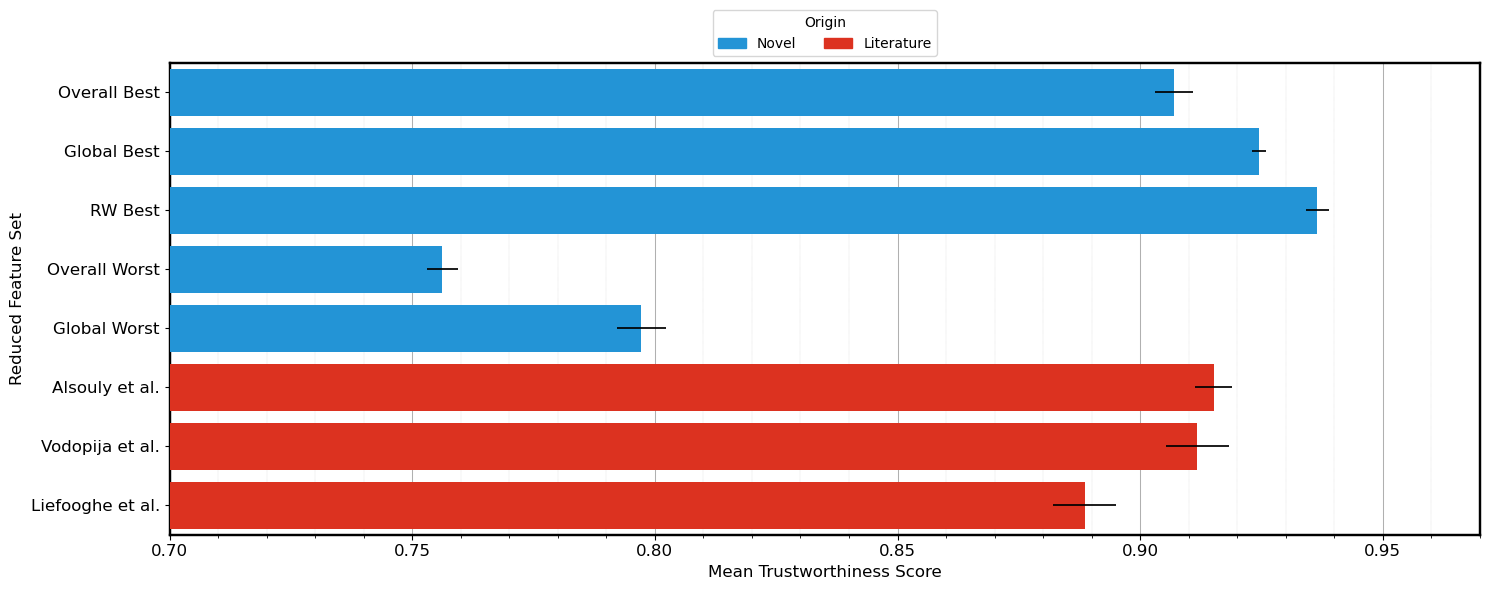

In [114]:
filepath = "Results/LiteratureComparison_Trustworthiness"
dashboard.plot_trustworthiness_comparison_of_feature_sets(trust_df = trust_df_lit, filepath=filepath)

Generating tables of feature scores for literature features.

In [115]:
def get_ranking_table(ranks_df, authorname):
    # Sort the dataframe by 'OverallRank'
    ranks_df = ranks_df.sort_values(by="OverallRank")

    # Create a new dataframe with the sorted indices and ranks_df
    table = pd.DataFrame(index=ranks_df.index)
    table["Type"] = ranks_df["Type"]
    table["RF"] = ranks_df["RF"]
    table["Coverage"] = ranks_df["Coverage"]
    table["Overall Score"] = ranks_df["Overall Score"]
    table["Rank"] = ranks_df["OverallRank"].round().astype(int)

    dashboard.convert_to_latex(
        df=table,
        filename=f"{authorname}Rankings",
        significant_figures=3,
    )

In [116]:
# Tables 18-20
get_ranking_table(alsouly_ranks, "Alsouly")
get_ranking_table(vodopija_ranks, "Vodopija")
get_ranking_table(liefooghe_ranks, "Liefooghe")

LaTeX table has been successfully written to ../../rrut_thesis_report/Tables/AlsoulyRankings.txt
LaTeX table has been successfully written to ../../rrut_thesis_report/Tables/VodopijaRankings.txt
LaTeX table has been successfully written to ../../rrut_thesis_report/Tables/LiefoogheRankings.txt


# Detailed Aerofoils Analysis (section 4.8 of report)


Aerofoils are being considered for this global only feature set.
Dropped instances:
['MW13_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20']
Initial length of the dataframe: 326
Total number of dropped instances: 5
This dataframe contains 15 features.


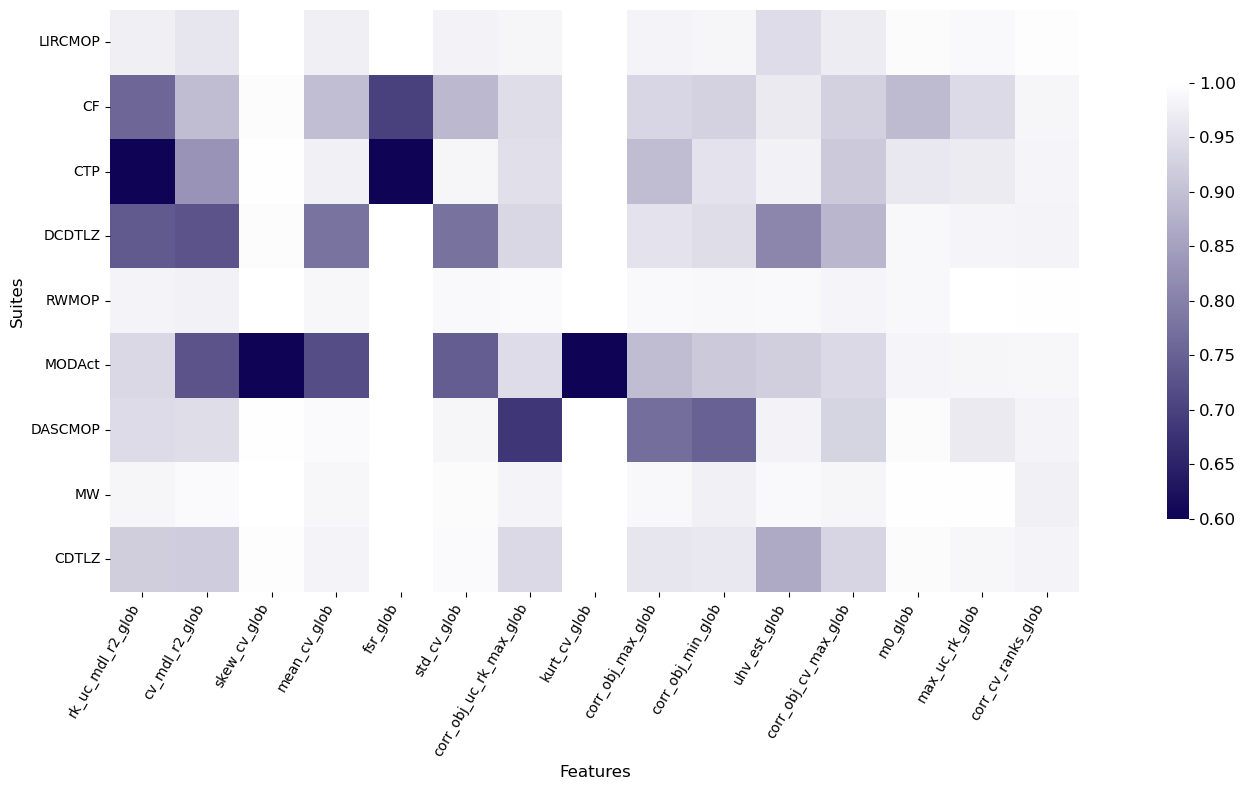

In [117]:
# Figure 28 in report. Coverage is measured relative to aerofoils here.
glob_reduced_dash.plot_coverage_heatmap(
    target_suite="XA",
    top_features=15,
    filepath="Results/AerofoilCoverage",
    ignore_aerofoils=False,
)

In [118]:
glob_cov = global_dashboard.get_feature_coverage(
    target_suite="XA", run_sensitivity_analysis=False, ignore_aerofoils=False
)
glob_cov = dashboard.get_top_coverage_features(coverage_values=glob_cov, aslist=False)
dashboard.convert_to_latex(
    glob_cov,
    filename="GlobalCoverage_XA",
    include_columns=False,
    significant_figures=3,
)  # Table 17 in report

Aerofoils are being considered for this global only feature set.
Dropped instances:
['MW13_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20', 'RWMOP20_d4']
Initial length of the dataframe: 326
Total number of dropped instances: 6
This dataframe contains 45 features.
LaTeX table has been successfully written to ../../rrut_thesis_report/Tables/GlobalCoverage_XA.txt


Aerofoils are being considered for this global only feature set.
Dropped instances:
['MW13_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20']
Initial length of the dataframe: 326
Total number of dropped instances: 5
This dataframe contains 15 features.


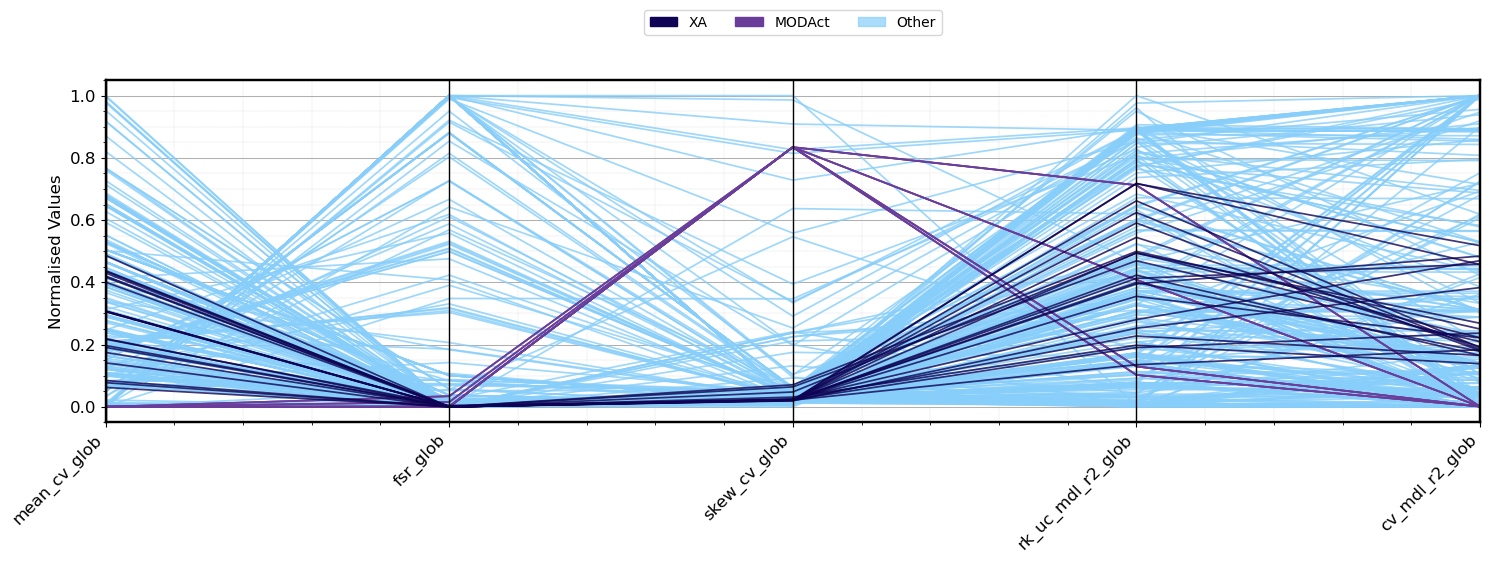

In [119]:
special_suites = ["XA"]
glob_reduced_dash.generate_suite_colors()

for s in special_suites:
    cov = glob_reduced_dash.get_feature_coverage(target_suite=s, ignore_aerofoils=False)
    worst_feat = glob_reduced_dash.get_top_coverage_features(
        cov, aslist=True, top_features=5
    )

    glob_reduced_dash.plot_parallel_coordinates(
        features=worst_feat,
        separate_rw_analytical=False,
        suites_in_focus=["XA", "MODAct"],
        ignore_aerofoils=False,
        filepath=f"Results/ParallelCoords_{s}",
    )

# Figure 29 in report.

Aerofoils are being considered for this global only feature set.
This dataframe contains 2 features.


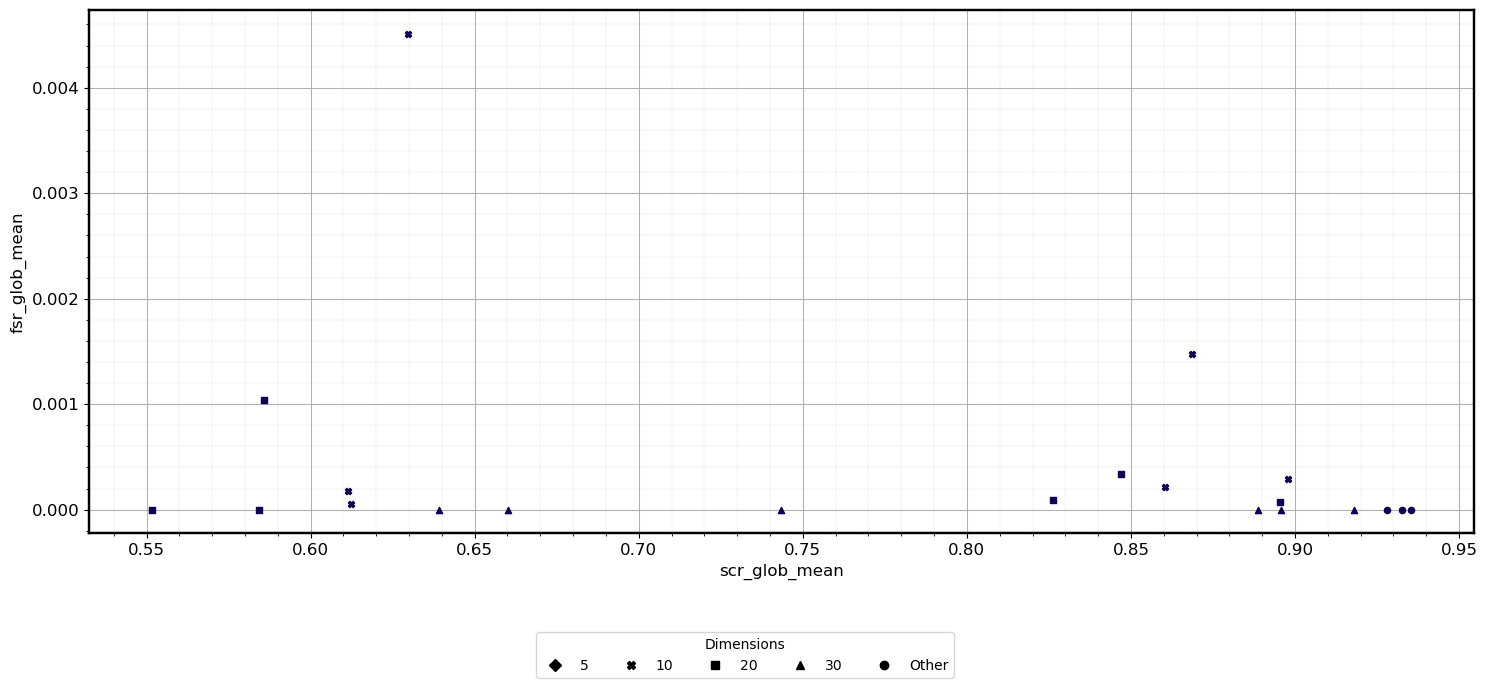

In [120]:
glob_reduced_dash.plot_features_comparison(
    feature_x="scr_glob",
    feature_y="fsr_glob",
    suite_names=["XA"],
    ignore_aerofoils=False,
    filepath="Results/SCR_versus_FSR",
)

# Did not make it into report.

# PCA (Archived)

This was not included in the final report as it did not affect feature rankings much. See the plot of the feature importances to see why.


Dropped instances:
['XA2_d15', 'XA3_d10', 'XA4_d10', 'XA5_d10', 'XA6_d10', 'XA7_d10', 'XA8_d10', 'XA3_d20', 'XA4_d20', 'XA5_d20', 'XA7_d20', 'XA8_d20', 'XA3_d30', 'XA4_d30', 'XA5_d30', 'XA6_d30', 'XA7_d30', 'XA8_d30', 'XA6_d20', 'XA2_d25', 'XA2_d35', 'MW13_d5', 'CTP2_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20', 'RWMOP20_d4']
Initial length of the dataframe: 326
Total number of dropped instances: 28


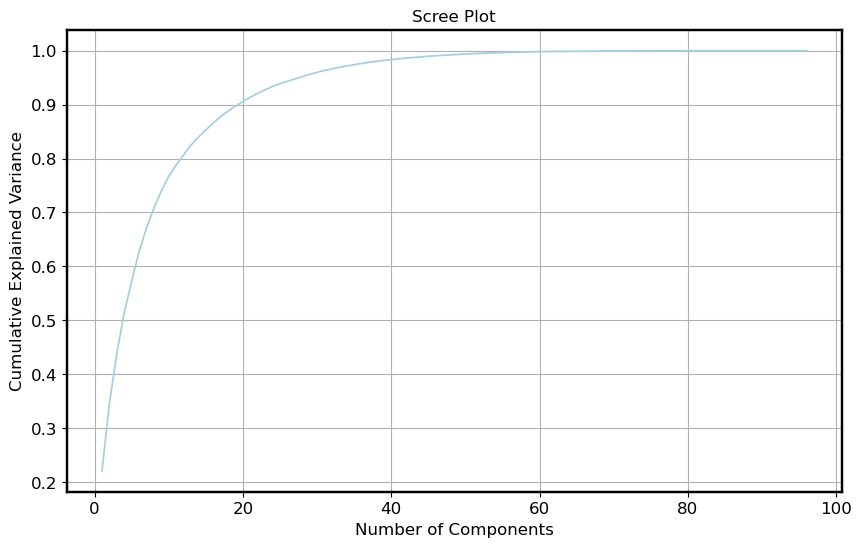

In [121]:
pca = dashboard.run_pca()
dashboard.plot_scree_plot(pca)

Note that as most of the features have very similar loadings, adding PCA as a third feature scoring method did not change the feature ranks very much.


Dropped instances:
['XA2_d15', 'XA3_d10', 'XA4_d10', 'XA5_d10', 'XA6_d10', 'XA7_d10', 'XA8_d10', 'XA3_d20', 'XA4_d20', 'XA5_d20', 'XA7_d20', 'XA8_d20', 'XA3_d30', 'XA4_d30', 'XA5_d30', 'XA6_d30', 'XA7_d30', 'XA8_d30', 'XA6_d20', 'XA2_d25', 'XA2_d35', 'MW13_d5', 'CTP2_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20', 'RWMOP20_d4']
Initial length of the dataframe: 326
Total number of dropped instances: 28
Using 11 components explains 78.81% of the variance.
There are 96 features that have been kept in the PCA.
Dropped instances:
['XA2_d15', 'XA3_d10', 'XA4_d10', 'XA5_d10', 'XA6_d10', 'XA7_d10', 'XA8_d10', 'XA3_d20', 'XA4_d20', 'XA5_d20', 'XA7_d20', 'XA8_d20', 'XA3_d30', 'XA4_d30', 'XA5_d30', 'XA6_d30', 'XA7_d30', 'XA8_d30', 'XA6_d20', 'XA2_d25', 'XA2_d35', 'MW13_d5', 'CTP2_d5', 'MW13_d10', 'MW13_d20', 'MW13_d30', 'CF2_d20', 'RWMOP20_d4']
Initial length of the dataframe: 326
Total number of dropped instances: 28
Using 11 components explains 78.81% of the variance.
There are 96 features 

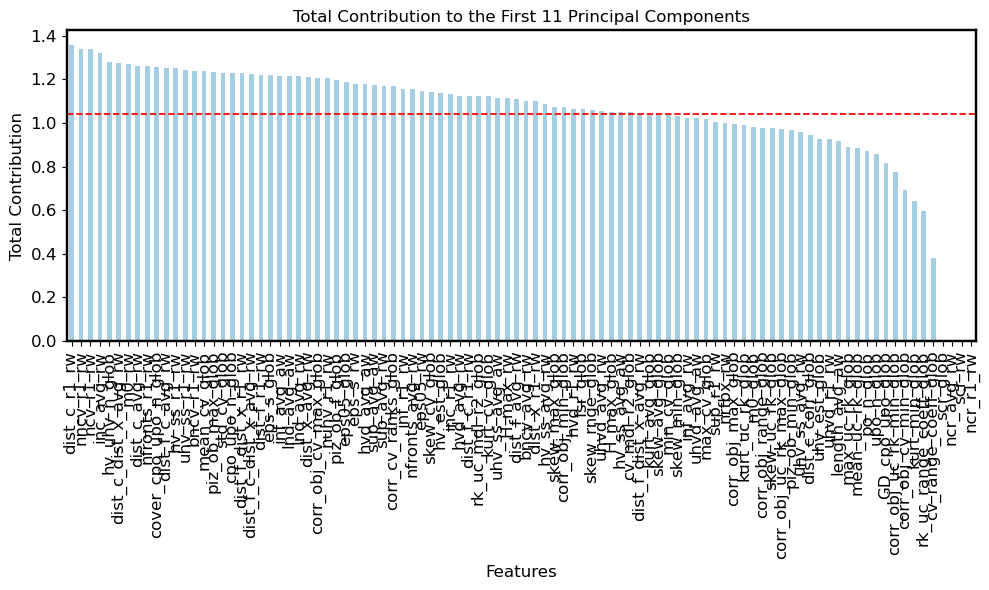

In [122]:
dashboard.plot_total_contribution(
    pca=pca, n_components=11, top_features=None, analysis_type=None
)

# Illustrative report figures
These are more illustrative figures required for Intro, lit review and methodology

## Walks


c:\Users\richa\anaconda3\envs\cosc2002_env\Lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


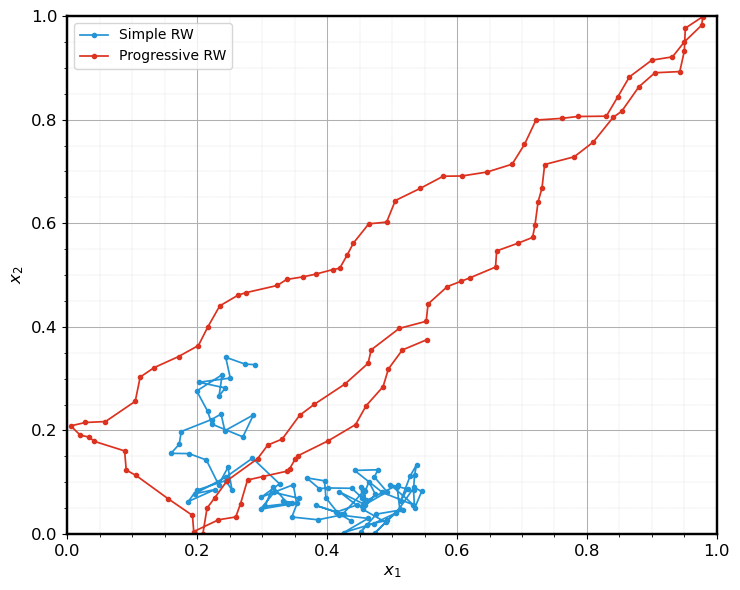

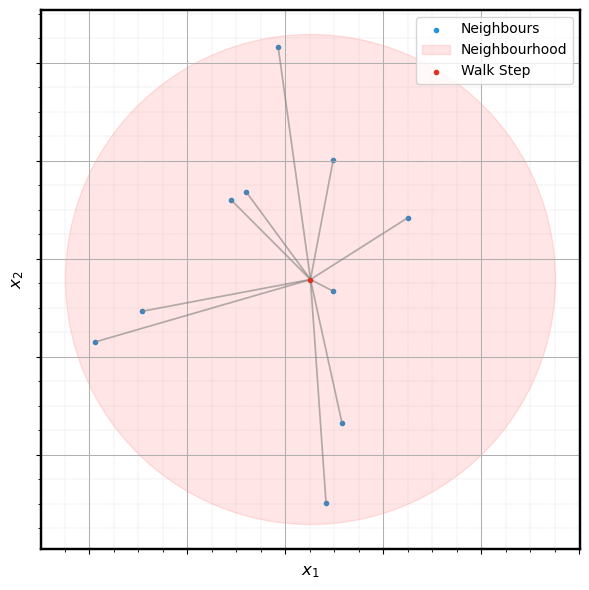

c:\Users\richa\anaconda3\envs\cosc2002_env\Lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


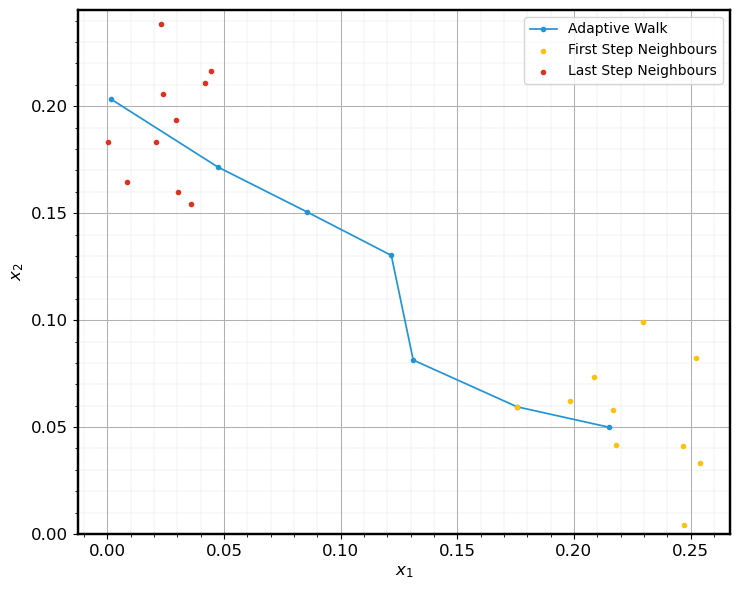

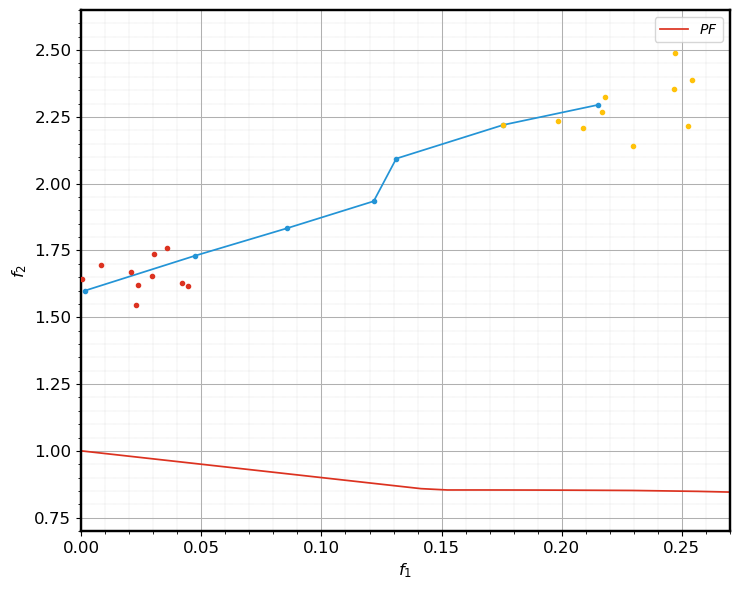

In [123]:
dashboard.define_plot_sizes()
dashboard.apply_custom_colors(palette="Dries")
dashboard.plot_walk_for_report(walk_type="random_walks", filepath="Theory/RandomWalks")
dashboard.plot_walk_for_report(walk_type="neigs", filepath="Theory/WalkNeighbourhood")
dashboard.plot_walk_for_report(
    walk_type="adaptive_walk_dec", filepath="Theory/AdaptiveWalkSearchSpace"
)
dashboard.plot_walk_for_report(
    walk_type="adaptive_walk_obj", filepath="Theory/AdaptiveWalkObjectiveSpace"
)

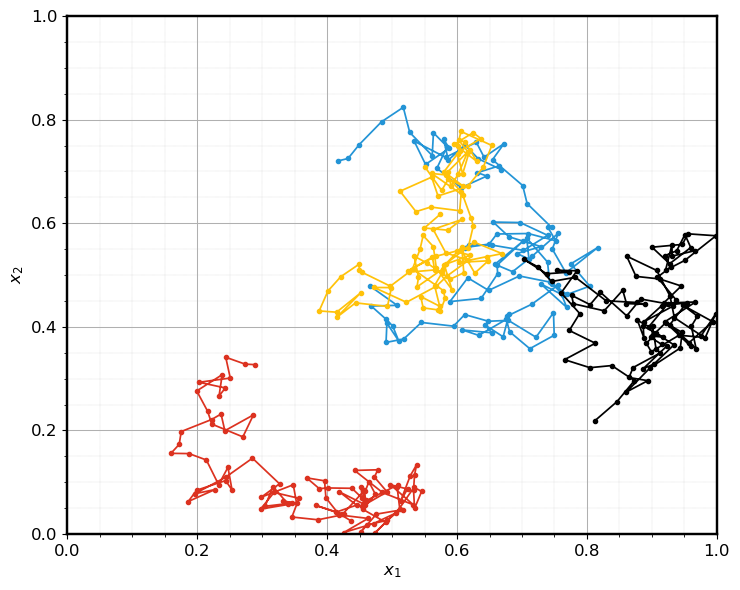

In [124]:
dashboard.plot_multiple_random_walks_for_report(
    walk_type="simple", filepath="Theory/FourSimpleWalks"
)

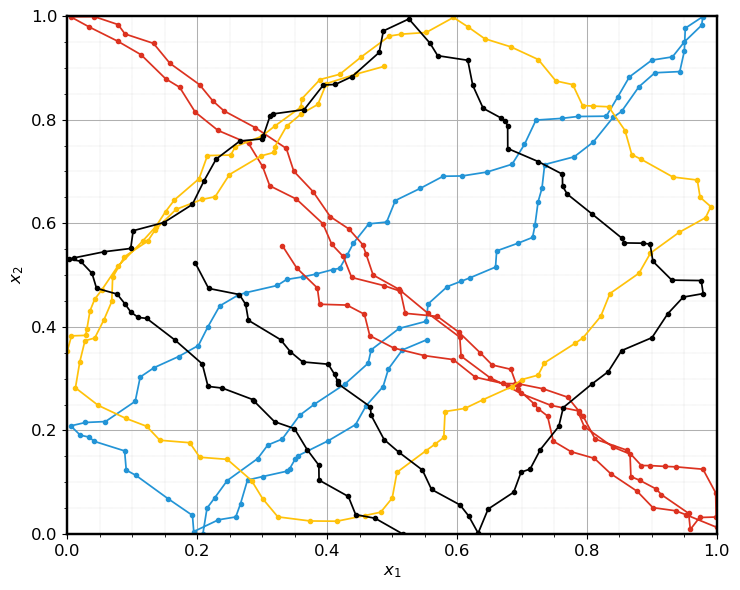

In [125]:
dashboard.plot_multiple_random_walks_for_report(
    walk_type="prog", filepath="Theory/FourProgWalks"
)

## Generating some landscape plots for the report


c:\Users\richa\Documents\Thesis\rrut_thesis_code\ISA-CMOP_Python\FeaturesDashboard.py:4068: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


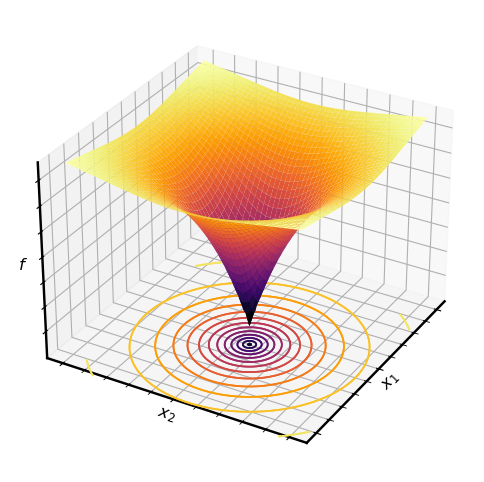

In [126]:
# Recalculate z values with the new range
def z_evolvable(x, y):
    return -200 * np.exp(-0.2 * np.sqrt(x**2 + y**2))


dashboard.plot_landscape_for_report(
    z_evolvable, filepath="Theory/SampleLandscape_Evolvable"
)

c:\Users\richa\Documents\Thesis\rrut_thesis_code\ISA-CMOP_Python\FeaturesDashboard.py:4068: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


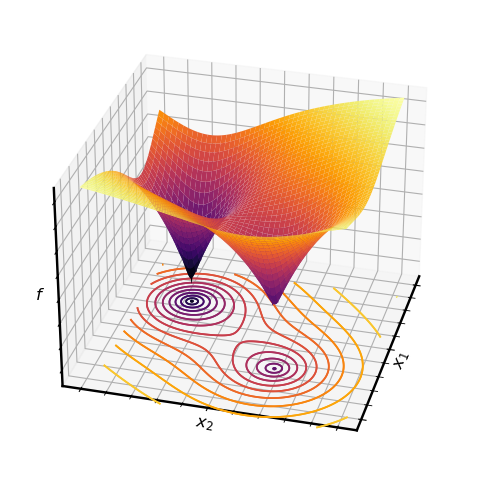

In [127]:
# Recalculate z values with the new range
def z_not_evolvable(
    x,
    y,
):
    return -150 * np.exp(-0.2 * np.sqrt((x - 3) ** 2 + (y - 3) ** 2)) - 200 * np.exp(
        -0.2 * np.sqrt((x + 5) ** 2 + (y + 6) ** 2)
    )


dashboard.plot_landscape_for_report(
    z_not_evolvable, elev_azi=(30, 15), filepath="Theory/SampleLandscape_Deceptive"
)

c:\Users\richa\Documents\Thesis\rrut_thesis_code\ISA-CMOP_Python\FeaturesDashboard.py:4068: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


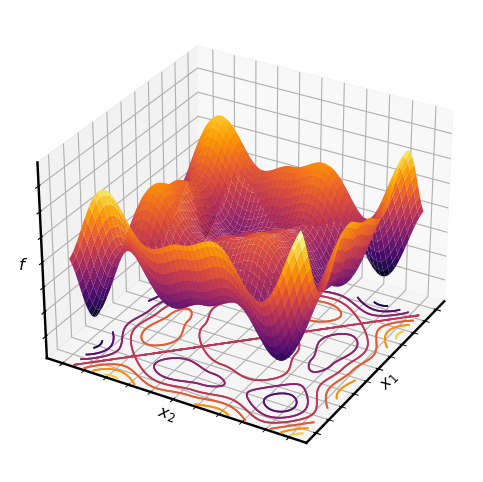

In [128]:
def z_rugged(x, y):
    return x * np.sin(0.75 * np.abs(x)) + y * np.sin(0.75 * np.abs(y))


dashboard.plot_landscape_for_report(
    z_rugged,
    contour_offset=3,
    num_contours=8,
    filepath="Theory/SampleLandscape_Rugged",
)

c:\Users\richa\Documents\Thesis\rrut_thesis_code\ISA-CMOP_Python\FeaturesDashboard.py:4068: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


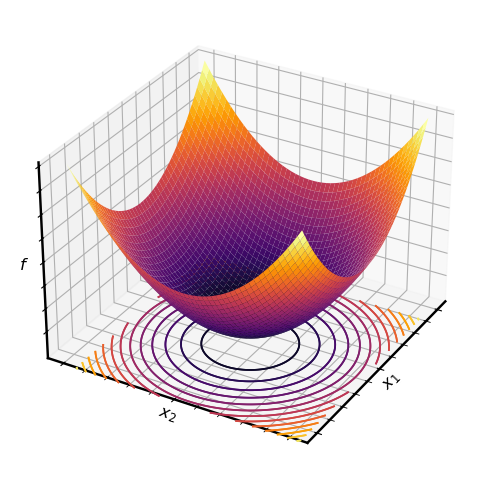

In [129]:
# def z_smooth(x, y):
#     return 4 * x**2 - 2.1 * x**4 + 1 / 3 * x**6 + x * y - 4 * y**2 + 4 * y**4


def z_smooth(x, y):

    return x**2 + y**2


dashboard.plot_landscape_for_report(z_smooth, filepath="Theory/SampleLandscape_Smooth")
# dashboard.plot_landscape_for_report(z_smooth, xlim=(-2, 2), ylim=(-1, 1))

c:\Users\richa\Documents\Thesis\rrut_thesis_code\ISA-CMOP_Python\FeaturesDashboard.py:4068: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


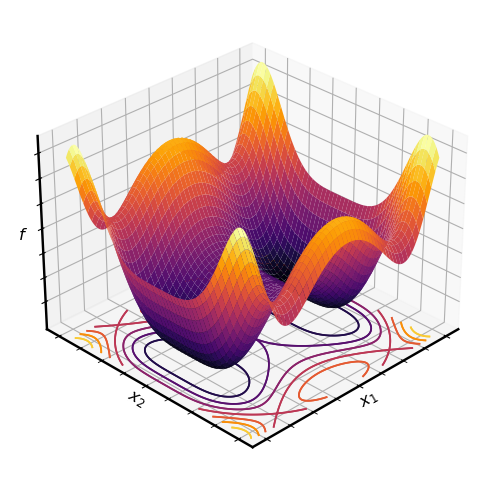

c:\Users\richa\Documents\Thesis\rrut_thesis_code\ISA-CMOP_Python\FeaturesDashboard.py:4068: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


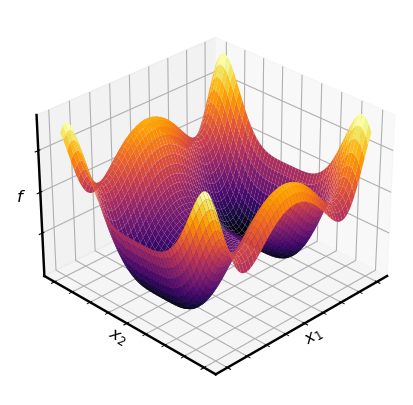

In [130]:
def z_netural(x, y):
    return -(np.sin(x**2) + np.cos(y**2))


preso_plot_params = {
    "z_exp": z_netural,  # Assuming z_netural is defined somewhere in your code
    "contour_offset": 0.25,
    "num_contours": 8,
    "xlim": (-2, 2),
    "ylim": (-2, 2),
    "elev_azi": (30, 45),
}
# Basic landscape plot 3D
dashboard.plot_landscape_for_report(
    **preso_plot_params,
    filepath="Theory/SampleLandscape_Neutral",
    show_2d=False,
    show_contour=True
)
dashboard.plot_landscape_for_report(
    **preso_plot_params,
    extension=".png",
    filepath="Theory/SampleLandscape_Simple3D",
    show_2d=False,
    show_contour=False
)

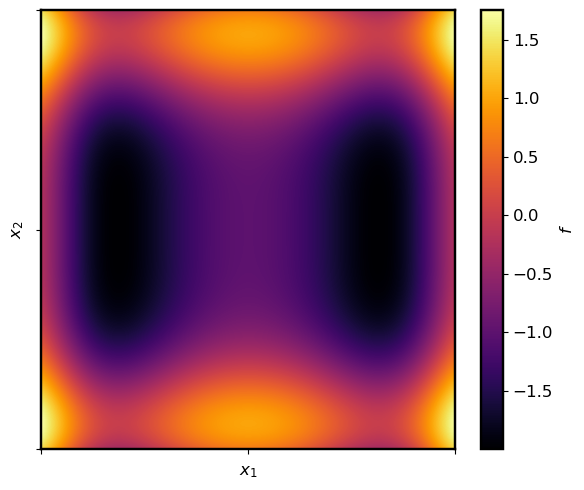

In [131]:
dashboard.plot_landscape_for_report(
    **preso_plot_params,
    filepath="Theory/SampleLandscape_Simple2D",
    show_2d=True,
    extension=".png",
    show_contour=False
)

In [132]:
np.random.seed(1)
max_radius = 0.3
circle_params = [([x, x], max_radius) for x in np.linspace(-1.5, 1.5, 5)]
circle_params += [([-x, x], max_radius) for x in np.linspace(-1.5, 1.5, 5)]


preso_plot_params = {
    "z_exp": z_netural,  # Assuming z_netural is defined somewhere in your code
    "contour_offset": 0.25,
    "num_contours": 8,
    "xlim": (-2, 2),
    "ylim": (-2, 2),
    "elev_azi": (30, 45),
    "circle_params": circle_params,  # Assuming circle_params is defined somewhere
    "show_contour": False,
}

c:\Users\richa\Documents\Thesis\rrut_thesis_code\ISA-CMOP_Python\FeaturesDashboard.py:4068: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


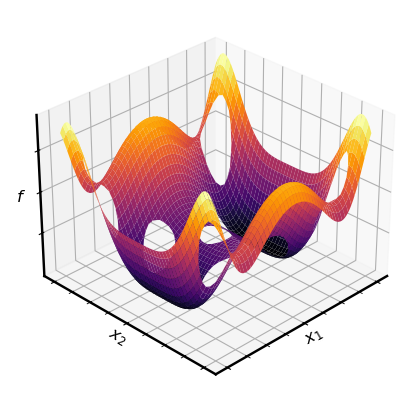

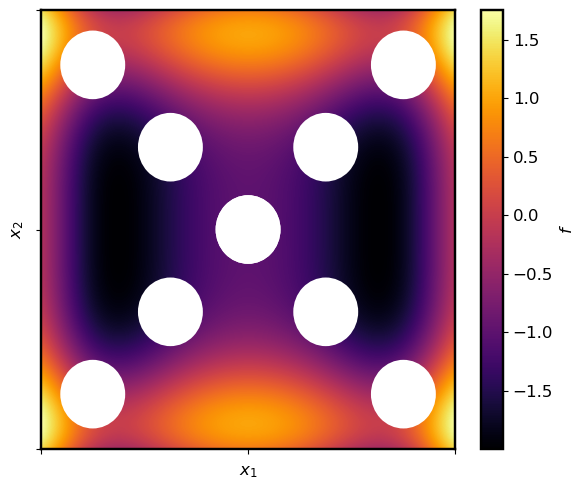

In [133]:
# Solver crashes 3D
dashboard.plot_landscape_for_report(
    **preso_plot_params,
    filepath="Theory/SampleLandscape_SolverCrashes3D",
    extension=".png",
    remove_circles=True,
    show_2d=False
)
# Solver crashes 2D
dashboard.plot_landscape_for_report(
    **preso_plot_params,
    filepath="Theory/SampleLandscape_SolverCrashes2D",
    extension=".png",
    remove_circles=True,
    show_2d=True
)

c:\Users\richa\Documents\Thesis\rrut_thesis_code\ISA-CMOP_Python\FeaturesDashboard.py:4068: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


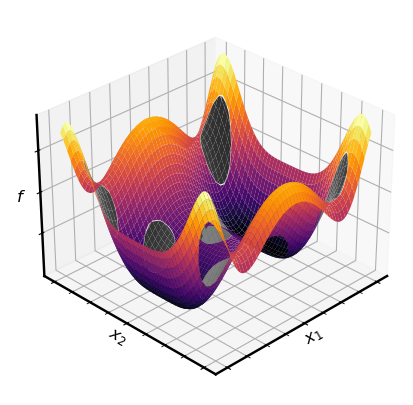

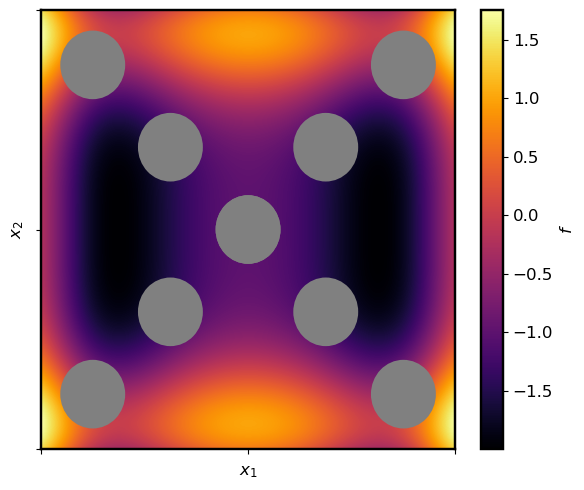

In [134]:
# Solver crashes 3D
dashboard.plot_landscape_for_report(
    **preso_plot_params,
    filepath="Theory/SampleLandscape_Infeasible3D",
    extension=".png",
    remove_circles=False,
    show_2d=False
)
# Solver crashes 2D
dashboard.plot_landscape_for_report(
    **preso_plot_params,
    filepath="Theory/SampleLandscape_Infeasible2D",
    remove_circles=False,
    extension=".png",
    show_2d=True
)

c:\Users\richa\Documents\Thesis\rrut_thesis_code\ISA-CMOP_Python\FeaturesDashboard.py:4068: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


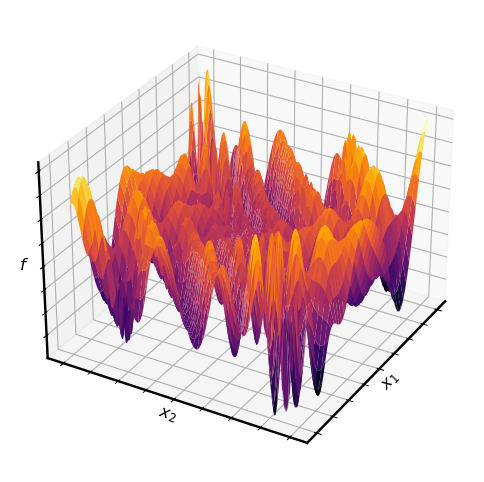

In [135]:
def z_eggholder(x, y):
    return -(y + 47) * np.sin(np.sqrt(np.abs(y + x / 2 + 47))) - x * np.sin(
        np.sqrt(np.abs(x - (y + 47)))
    )


dashboard.plot_landscape_for_report(
    z_eggholder,
    xlim=(-512, 512),
    ylim=(-512, 512),
    filepath="Theory/SampleLandscape_SuperHard3D",
    extension=".pdf",
    show_contour=False,
    elev_azi=(30, 30),
)

# dashboard.plot_landscape_for_report(
#     z_eggholder,
#     xlim=(-512, 512),
#     ylim=(-512, 512),
#     filepath="Theory/SampleLandscape_SuperHard2D",
#     extension=".pdf",
#     show_contour=False,
#     show_2d=True,
# )

c:\Users\richa\Documents\Thesis\rrut_thesis_code\ISA-CMOP_Python\FeaturesDashboard.py:4068: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


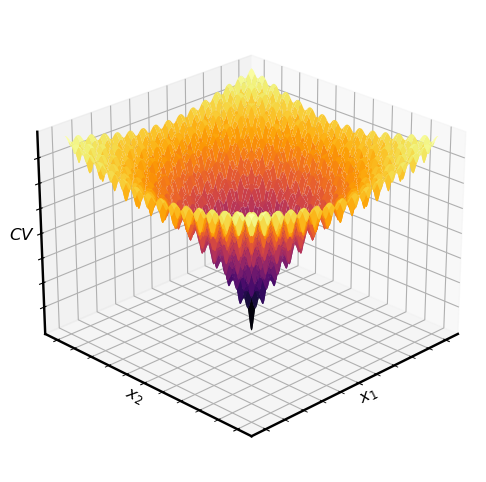

In [136]:
# def z_holder_table(x, y):
#     return -np.abs(
#         np.sin(x) * np.cos(y) * np.exp(np.abs(1 - 1 / np.pi * np.sqrt(x**2 + y**2)))
#     )


def z_ackley(x, y):
    a = 20
    b = 0.2
    c = 1.5 * np.pi

    return (
        -a * np.exp(-b * np.sqrt(1 / 2 * (x**2 + y**2)))
        - np.exp(1 / 2 * (np.cos(c * x) + np.cos(c * y)))
        + a
        + np.exp(1)
    )


dashboard.plot_landscape_for_report(
    z_ackley,
    xlim=(-10, 10),
    ylim=(-10, 10),
    filepath="Theory/SampleLandscape_AnotherHard3D",
    extension=".pdf",
    show_contour=False,
    contour_offset=1,
    elev_azi=(25, 45),
    zlabel=r"$CV$",
)

PDF saved at ../../rrut_thesis_report/Figures/Theory\DominationRelationship.pdf


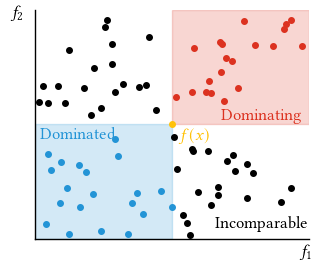

In [141]:
# Plot domination relationships. 

# Custom setup.
dashboard.apply_custom_colors(palette="Dries")
dashboard.apply_custom_matplotlib_style(linewidth=1, axiswidth=1)
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]


# Generate random points
np.random.seed(41)
n_points = 20


# Central point
center_point = np.array([[2, 2]])


# Dominating region points (bottom-left)
dominating_points = np.random.rand(n_points, 2) * 2


# Dominated region points (top-right)
dominated_points = np.random.rand(n_points, 2) * 2 + 2


# Other points (top-left and bottom-right)
other_points_top_left = np.random.rand(n_points, 2) * 2 + [0, 2]
np.random.seed(48)
other_points_bottom_right = np.random.rand(n_points, 2) * 2 + [2, 0]


# Plotting
fig, ax = plt.subplots(figsize=(dashboard.plot_width_half, 2.8))

# Remove top and right spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.scatter(
    center_point[:, 0], center_point[:, 1], color=colors[2], label=r"$f(x)$", zorder=6
)
ax.text(2.3, 1.8, r"$f(x)$", color=colors[2], fontsize=12, ha="center", va="center")

# Dominating points and region
ax.scatter(
    dominating_points[:, 0],
    dominating_points[:, 1],
    color=colors[0],
    label="Dominated",
)
ax.add_patch(plt.Rectangle((0, 0), 2, 2, color=colors[0], alpha=0.2))
ax.text(0.625, 1.8, "Dominated", color=colors[0], fontsize=12, ha="center", va="center")


# Dominated points and region
ax.scatter(
    dominated_points[:, 0], dominated_points[:, 1], color=colors[1], label="Dominating"
)
ax.add_patch(plt.Rectangle((2, 2), 2, 2, color=colors[1], alpha=0.2))
ax.text(3.3, 2.15, "Dominating", color=colors[1], fontsize=12, ha="center", va="center")


# Incomparable points
ax.scatter(
    other_points_top_left[:, 0],
    other_points_top_left[:, 1],
    color=colors[3],
    label="Incomparable",
)
ax.scatter(
    other_points_bottom_right[:, 0], other_points_bottom_right[:, 1], color=colors[3]
)
ax.text(
    3.3, 0.25, "Incomparable", color=colors[3], fontsize=12, ha="center", va="center"
)


# Labels and title
ax.set_xlabel(r"$f_1$", loc="right")
ax.set_ylabel(r"$f_2$", loc="top", rotation=0, labelpad=5)

# Move y-axis label down slightly
ax.yaxis.set_label_coords(-0.05, 0.95)  # Adjust the y-coordinate as needed


plt.xlim(0, 4)


plt.ylim(0, 4)


# Remove ticks
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("none")
ax.set_xticks([])
ax.set_yticks([])


# Show plot
plt.tight_layout()
if dashboard.report_mode:
    dashboard.save_figure(filepath="Theory/DominationRelationship")
plt.show()